In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date
import os
import random
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_absolute_error,mean_squared_error
from prophet import Prophet
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
from folium.plugins import MarkerCluster
from statsmodels.tsa.seasonal import seasonal_decompose
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import shap
import pickle
from flask import Flask,request,jsonify
import joblib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import shap
# import libpysal as ps
# from esda.moran import Moran

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
df1 = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df1.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


In [5]:
df1.shape

(982638, 28)

In [6]:
df1.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.826380e+05,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982624.000000,326167.000000,982627.000000,68875.000000,2311.000000,64.00000,982638.000000,982638.000000
mean,2.197437e+08,1338.945426,10.700277,1116.459887,1.404253,500.823555,29.079817,306.133008,363.840882,500.578668,958.167085,984.204673,991.21875,33.995725,-118.082225
std,1.294954e+07,651.537830,6.107808,610.893787,0.490747,206.211940,21.970094,219.053795,123.684663,206.010361,110.232109,51.485644,27.06985,1.636729,5.672940
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106089e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208146e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.309153e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  float64
 17  Weapon Des

In [8]:
df1.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           145262
Vict Age               0
Vict Sex          138445
Vict Descent      138456
Premis Cd             14
Premis Desc          585
Weapon Used Cd    656471
Weapon Desc       656471
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          913763
Crm Cd 3          980327
Crm Cd 4          982574
LOCATION               0
Cross Street      830789
LAT                    0
LON                    0
dtype: int64

In [9]:
df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'],errors= 'coerce',format='%m/%d/%Y %I:%M:%S %p')
df1['Date Rptd'] = pd.to_datetime(df1['Date Rptd'],errors='coerce',format='%m/%d/%Y %I:%M:%S %p')

In [10]:
df1.drop(columns=['Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street'],inplace=True)


In [11]:
df1.shape

(982638, 24)

In [12]:
dict1 = {}
for col in df1.columns:
    dtype_str = df1[col].dtype
    null_values = df1[col].isna().sum()
    
    dict1[col] = (dtype_str,null_values)
    
for col,(dtype_str,null_values) in dict1.items():
    print(f"Column : {col} | Dtype : {dtype_str} | Null Values : {null_values}")

Column : DR_NO | Dtype : int64 | Null Values : 0
Column : Date Rptd | Dtype : datetime64[ns] | Null Values : 0
Column : DATE OCC | Dtype : datetime64[ns] | Null Values : 0
Column : TIME OCC | Dtype : int64 | Null Values : 0
Column : AREA | Dtype : int64 | Null Values : 0
Column : AREA NAME | Dtype : object | Null Values : 0
Column : Rpt Dist No | Dtype : int64 | Null Values : 0
Column : Part 1-2 | Dtype : int64 | Null Values : 0
Column : Crm Cd | Dtype : int64 | Null Values : 0
Column : Crm Cd Desc | Dtype : object | Null Values : 0
Column : Mocodes | Dtype : object | Null Values : 145262
Column : Vict Age | Dtype : int64 | Null Values : 0
Column : Vict Sex | Dtype : object | Null Values : 138445
Column : Vict Descent | Dtype : object | Null Values : 138456
Column : Premis Cd | Dtype : float64 | Null Values : 14
Column : Premis Desc | Dtype : object | Null Values : 585
Column : Weapon Used Cd | Dtype : float64 | Null Values : 656471
Column : Weapon Desc | Dtype : object | Null Values :

In [13]:
obj1 = df1.select_dtypes(include='object')
categorical_columns = [item for item in obj1]
print(categorical_columns)

['AREA NAME', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION']


In [14]:
num1 = df1.select_dtypes(include=['float','int'])
numerical_columns = [item for item in num1]
print(numerical_columns)

['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'LAT', 'LON']


In [15]:
encoded_columns = ['Vict Sex','Crm Cd Desc','AREA NAME','Status']

In [16]:
def categorical_impute(df,categorical_columns:list):
    cat_impute = SimpleImputer(strategy='constant',fill_value='Unknown')
    df[categorical_columns] = cat_impute.fit_transform(df[categorical_columns])
    return df

def numerical_impute(df,numerical_columns:list):
    num_impute = SimpleImputer(strategy='median')
    df[numerical_columns] = num_impute.fit_transform(df[numerical_columns])
    return df

In [17]:
def categorical_encoder(df, encoded_columns):
    df = pd.get_dummies(df,columns=encoded_columns,drop_first=True)
    return df

In [18]:
df1 = categorical_impute(df1,categorical_columns)

In [19]:
df1 = numerical_impute(df1,numerical_columns)

In [20]:
df1.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
LOCATION          0
LAT               0
LON               0
dtype: int64

Data is Cleaned Proceed Ahead

In [21]:
df2 = df1.copy()

In [22]:
df1 = categorical_encoder(df1,encoded_columns)

In [23]:
df1.shape

(982638, 190)

In [24]:
df1['Year'] = df1['DATE OCC'].dt.year
df1['Month'] = df1['DATE OCC'].dt.month

In [25]:
df1.shape

(982638, 192)

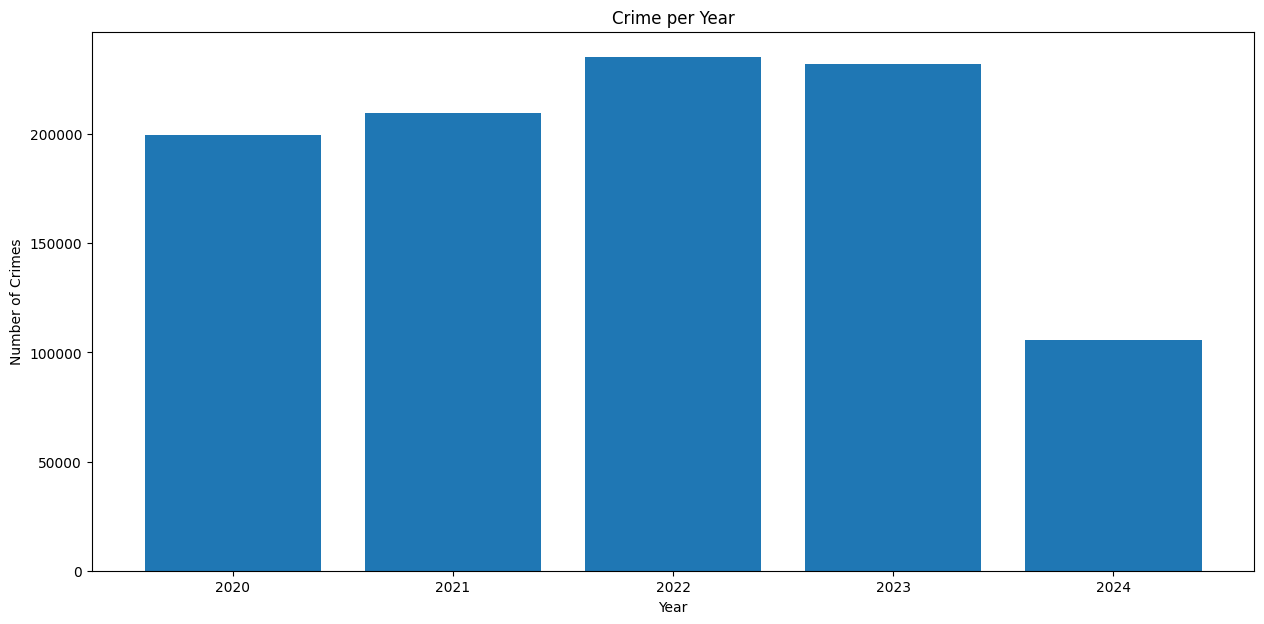

In [26]:
crime_per_year = df1.groupby('Year').size()
plt.figure(figsize=(15,7))
plt.bar(crime_per_year.index,crime_per_year)
plt.title('Crimes Per Year')
plt.title('Crime per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

In [27]:
area_columns = [col for col in df1.columns if 'AREA NAME_' in col]
print(area_columns)

area_columns_size = df1[area_columns].sum().sort_values(ascending=False)

['AREA NAME_Central', 'AREA NAME_Devonshire', 'AREA NAME_Foothill', 'AREA NAME_Harbor', 'AREA NAME_Hollenbeck', 'AREA NAME_Hollywood', 'AREA NAME_Mission', 'AREA NAME_N Hollywood', 'AREA NAME_Newton', 'AREA NAME_Northeast', 'AREA NAME_Olympic', 'AREA NAME_Pacific', 'AREA NAME_Rampart', 'AREA NAME_Southeast', 'AREA NAME_Southwest', 'AREA NAME_Topanga', 'AREA NAME_Van Nuys', 'AREA NAME_West LA', 'AREA NAME_West Valley', 'AREA NAME_Wilshire']


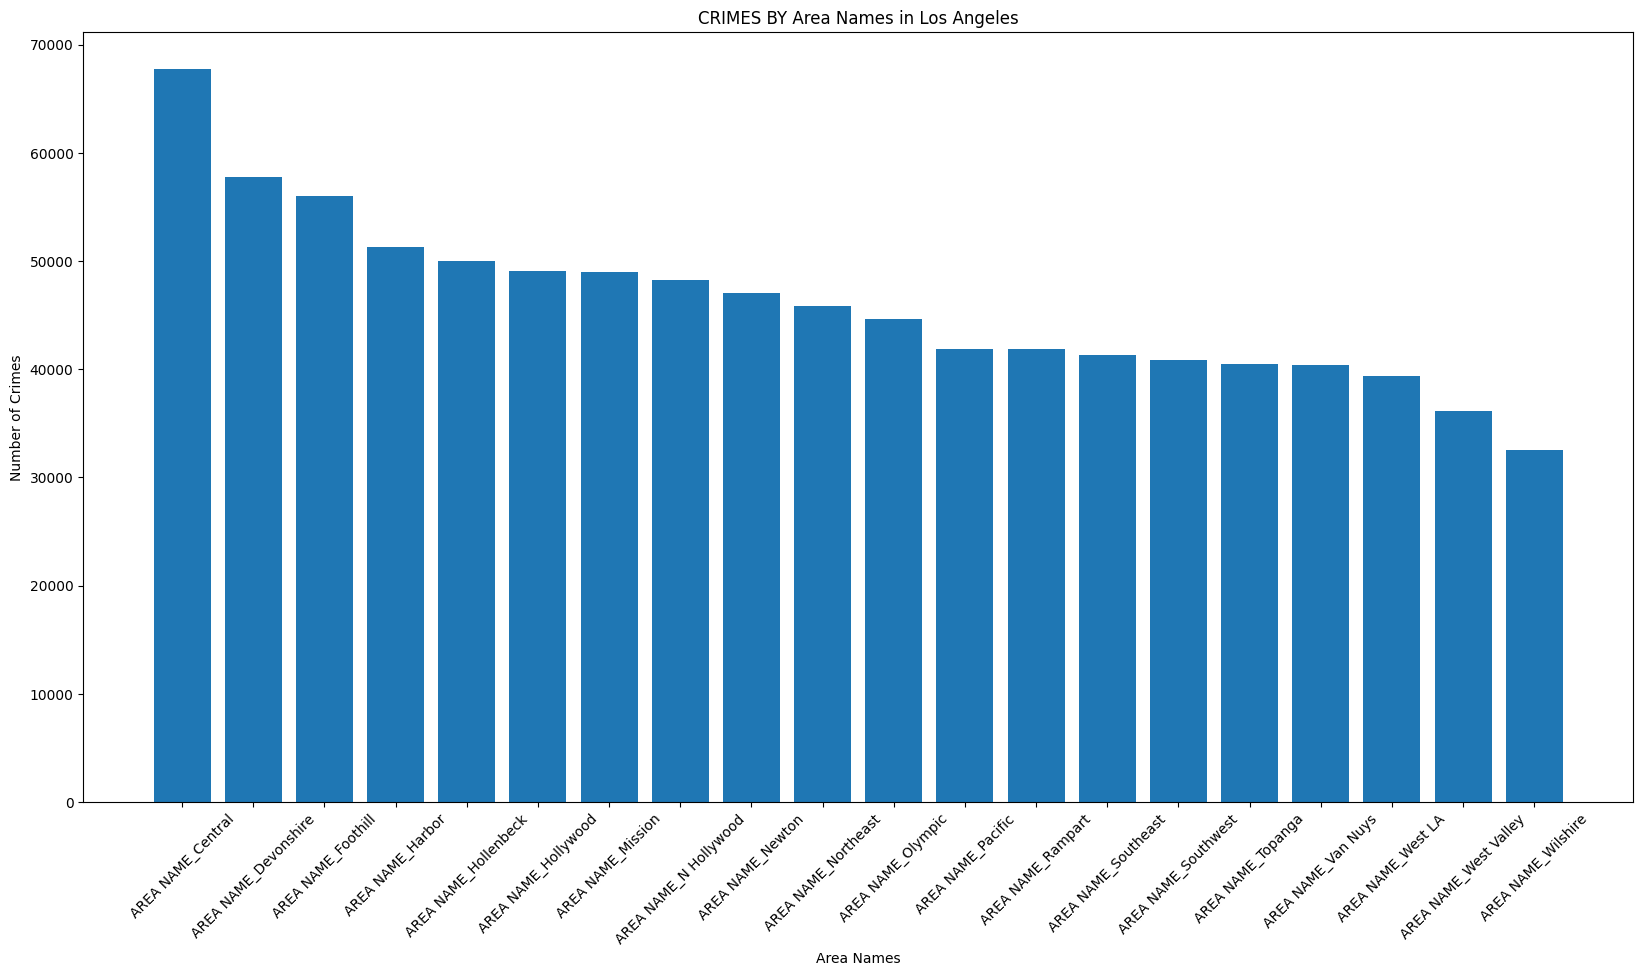

In [28]:
plt.figure(figsize=(20,10))
plt.bar(area_columns,area_columns_size)
plt.title('CRIMES BY Area Names in Los Angeles')
plt.xlabel('Area Names')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

In [29]:
victim_columns = [col for col in df1.columns if 'Vict Sex' in col]
print(victim_columns)
victim_columns_size = df1[victim_columns].sum().sort_values(ascending=False)

['Vict Sex_F', 'Vict Sex_H', 'Vict Sex_M', 'Vict Sex_Unknown', 'Vict Sex_X']


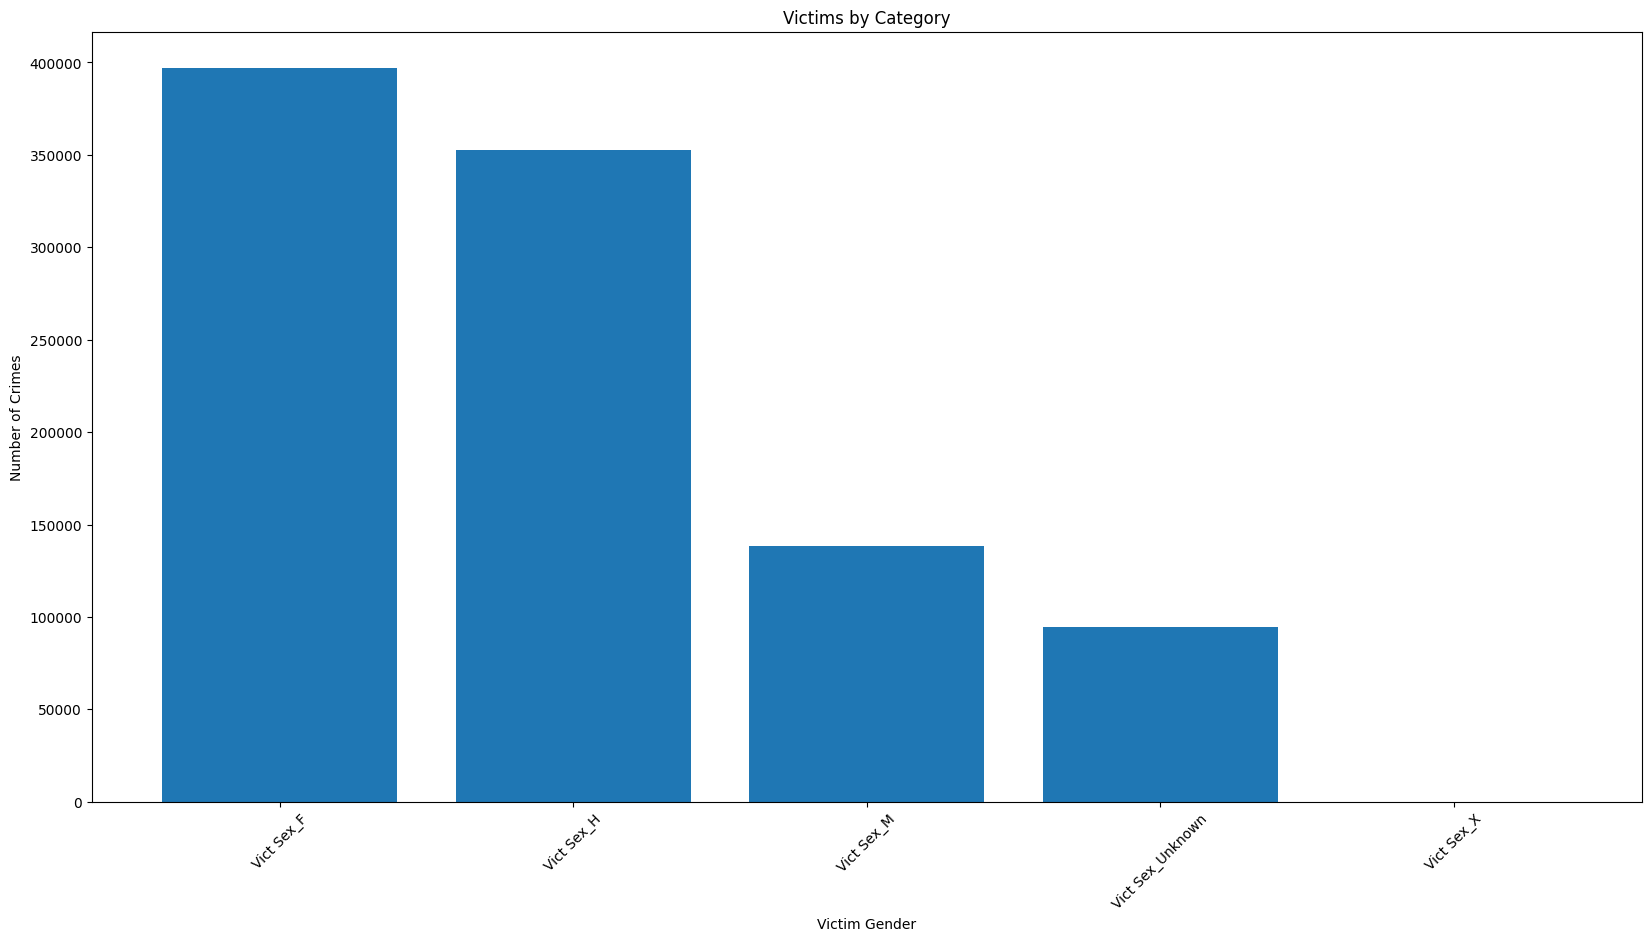

In [30]:
plt.figure(figsize=(20,10))
plt.bar(victim_columns,victim_columns_size)
plt.title('Victims by Category')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

In [31]:
status_coded = [col for col in df1.columns if 'Status_' in col]
print(status_coded)
status_coded_size  = df1[status_coded].sum().sort_values(ascending=False)

['Status_AO', 'Status_CC', 'Status_IC', 'Status_JA', 'Status_JO', 'Status_Unknown']


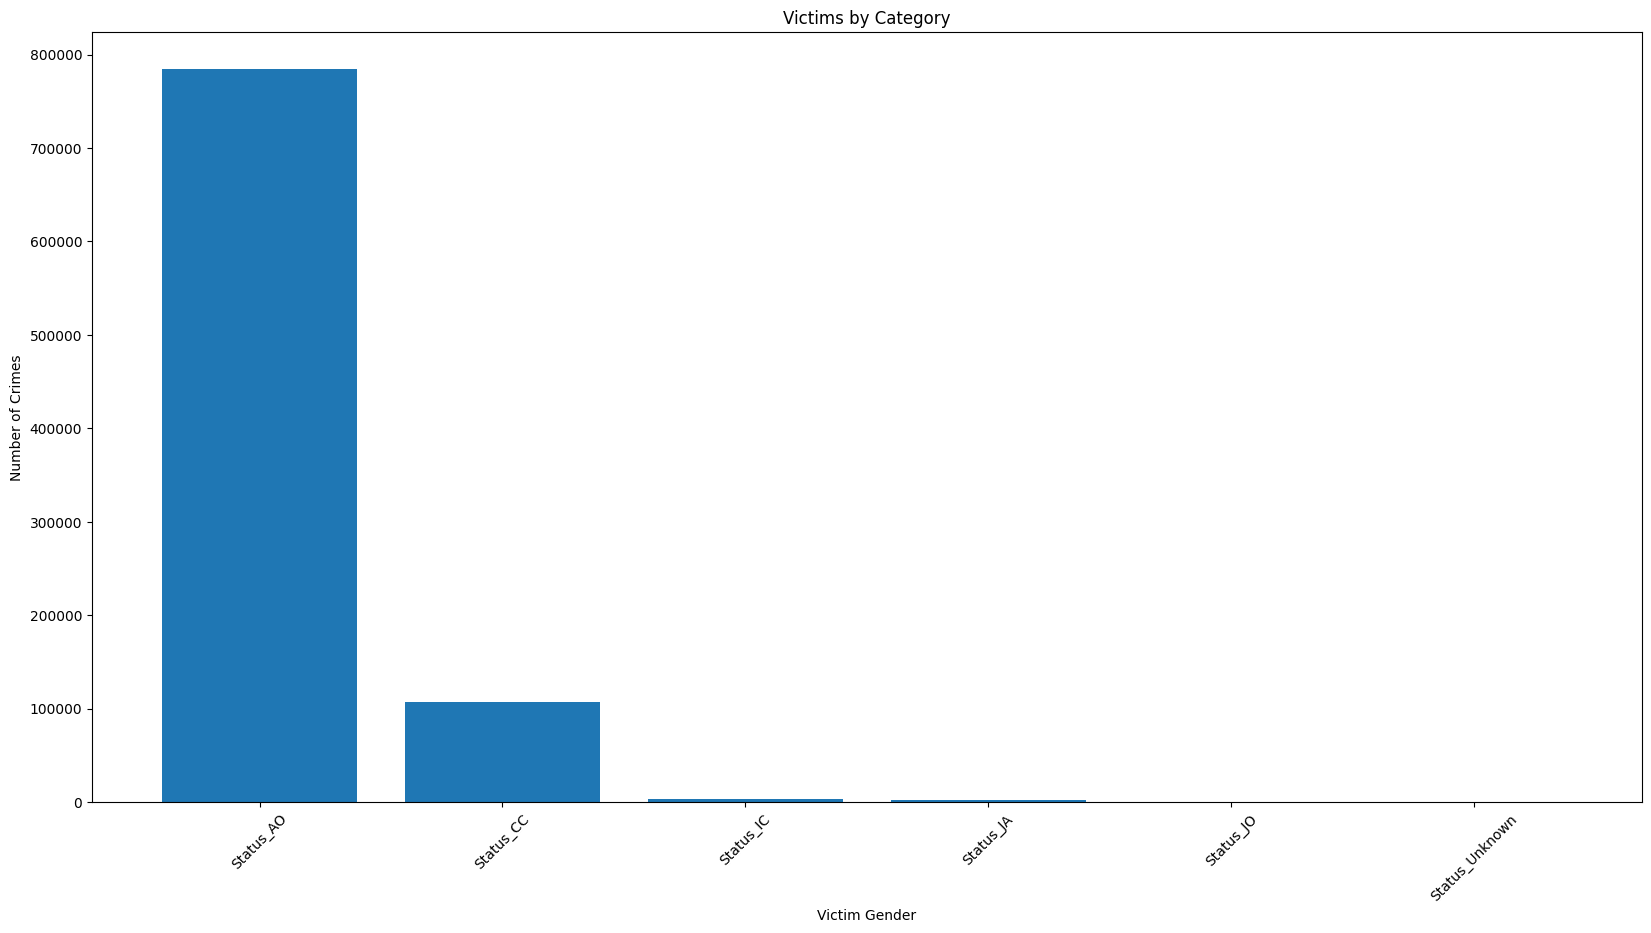

In [32]:
plt.figure(figsize=(20,10))
plt.bar(status_coded,status_coded_size)
plt.title('Victims by Category')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

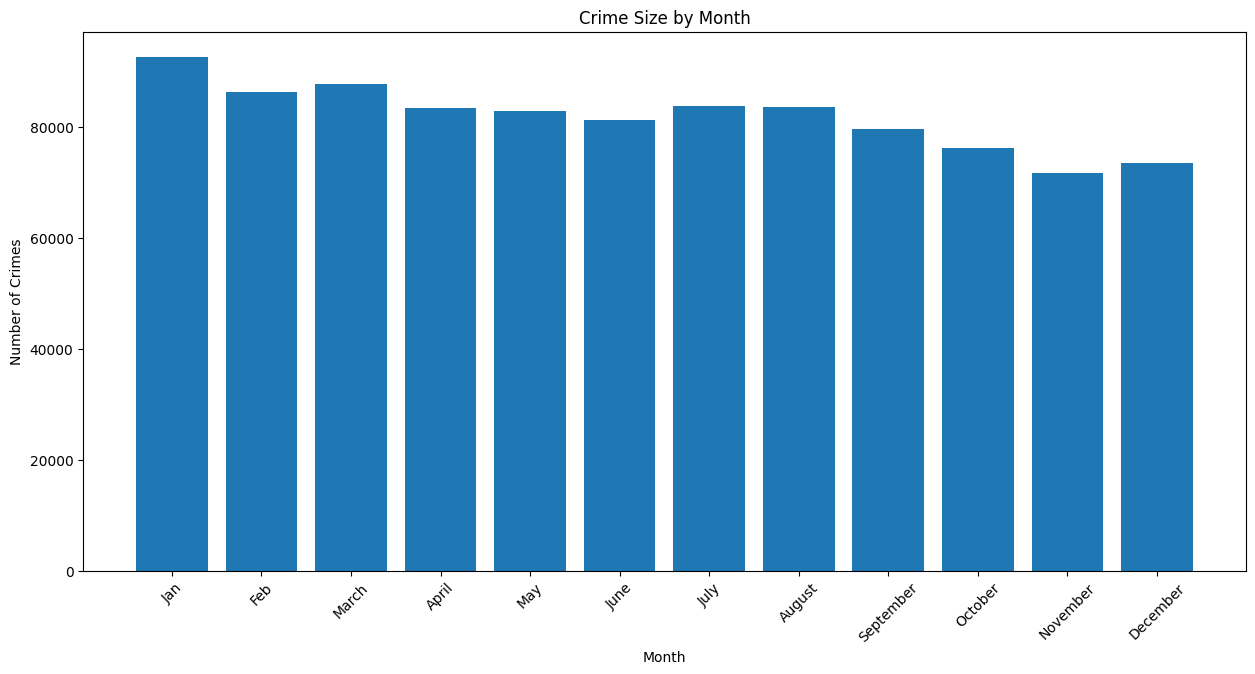

In [33]:
labels = ['Jan','Feb','March','April','May','June','July','August','September','October','November','December']
monthly_rate = df1.groupby('Month').size()
plt.figure(figsize=(15,7))
plt.bar(monthly_rate.index,monthly_rate)
plt.xticks(ticks=monthly_rate.index,labels=labels,rotation=45)
plt.title('Crime Size by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

In [34]:
print(monthly_rate.min()),print(monthly_rate.max())

71754
92553


(None, None)

In [35]:
monthly_rate_sorted = monthly_rate.sort_values(ascending=False)

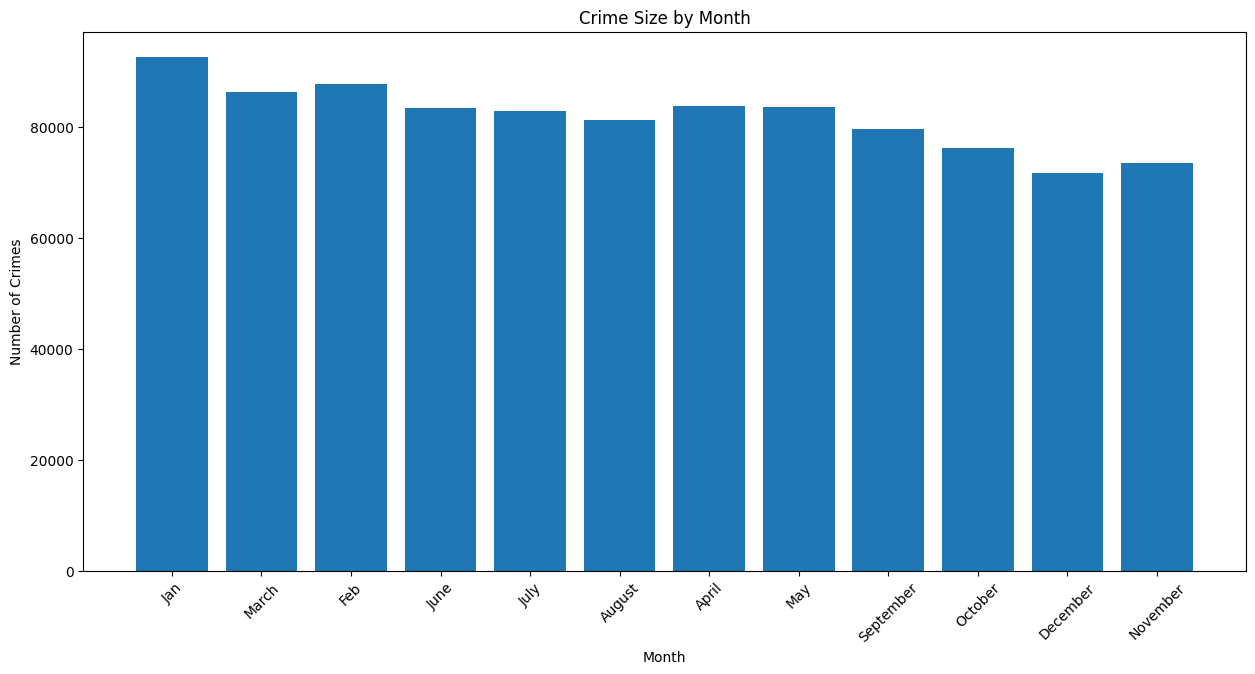

In [36]:
plt.figure(figsize=(15,7))
plt.bar(monthly_rate_sorted.index,monthly_rate_sorted.values)
plt.xticks(ticks=monthly_rate_sorted.index,labels=labels,rotation=45)
plt.title('Crime Size by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

check and compare with the janpy5 file for some values of the Type of arrests that the police have made in the crime dataset

In [37]:
print(df1.shape)
df1 = df1[(df1['LAT'] >= 33.7) & (df1['LAT'] <= 34.3) & (df1['LON'] >= -118.87) & (df1['LON'] <= -118.1)]
print(f"Filtered shape of the df:{df1.shape}")

(982638, 192)
Filtered shape of the df:(971214, 192)


In [38]:
random_lon = random.choice(df1['LON'])
print(random_lon)

-118.2827


In [39]:
random_lat = random.choice(df1['LAT'])
print(random_lat)

34.1758


In [40]:
m = folium.Map(location=(random_lon,random_lat),zoom_start=10,tiles='cartodb positron')
folium.Marker(location=[random_lat,random_lon],popup = 'Random position').add_to(m)
m

Perplexity Steps

In [41]:
geometry1 = [Point(xy) for xy in zip(df1['LON'],df1['LAT'])]
gdf = gpd.GeoDataFrame(df1,geometry=geometry1,crs='EPSG:4269')

In [42]:
def create_map(gdf):
    m = folium.Map(location=[34.0522, -118.2437],zoom_start=12)
    
    for i,row in gdf.iterrows():
        folium.CircleMarker(location=[row['LAT'],row['LON']],radius=2,color='red',fill=True,fillColor='red').add_to(m)
        
    return m


crime_map = create_map(gdf)
crime_map.save('NewBeg.html')
print(f"A html filed has been save din the directory as per your request")

A html filed has been save din the directory as per your request


In [43]:
heat_data1 = [[row['LAT'],row['LON']] for _,row in gdf.iterrows()]
heat_map = folium.Map(location=[34.0522,-118.2437],zoom_start=10)
HeatMap(heat_data1,radius=10).add_to(heat_map)
heat_map.save('heat_map1.html')

In [44]:
coords = gdf[['LAT','LON']].to_numpy()
coords_rad = np.radians(coords)

kms_per_radians = 6371
epsilon = 0.5/ kms_per_radians

db= DBSCAN(eps=epsilon,min_samples=5,algorithm='ball_tree',metric='haversine')
db.fit(coords_rad)

gdf['Cluster1'] = db.labels_

print(f"Cluster Labels: ",gdf['Cluster1'].unique())


Cluster Labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 23 12 13 -1 14 15 16 25 17 20 18 19
 21 22 24 26 27 28 29 30 31 32]


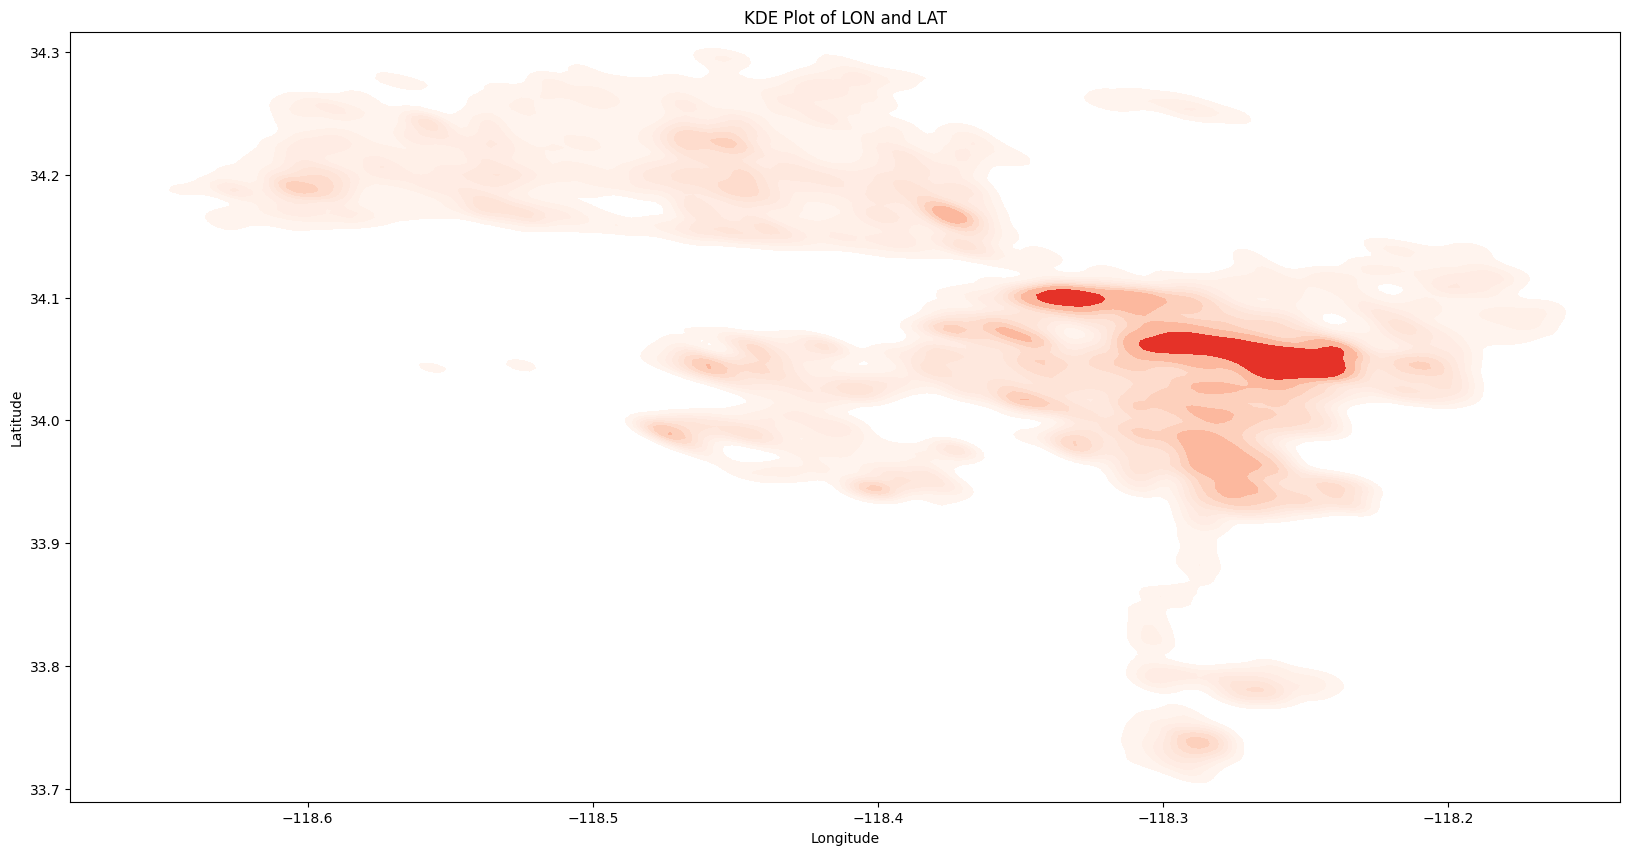

In [45]:
plt.figure(figsize=(20,10))
sns.kdeplot(x=gdf['LON'],y=gdf['LAT'],cmap='Reds',fill=True,bw_adjust=0.5)
plt.title('KDE Plot of LON and LAT')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Hotspot Analysis using DBSCAN

In [46]:
print(gdf.crs)

EPSG:4269


In [47]:
neighbourhoods = gpd.read_file('tl_2020_06_tract_LACounty.shp')
gpd_joined = gpd.sjoin(gdf,neighbourhoods,how='left',predicate='within')
crime_counts = gpd_joined.groupby('NAME').size().reset_index(name='crime_count')
neighbourhoods = neighbourhoods.merge(crime_counts,on='NAME',how='left')
neighbourhoods['crime_count'] = neighbourhoods['crime_count'].fillna(0)

print(neighbourhoods[['NAME', 'crime_count']])

         NAME  crime_count
0     2626.01        171.0
1        3001          0.0
2     3005.01          0.0
3     3107.01          0.0
4        3002          0.0
...       ...          ...
2493     1945       2689.0
2494     1951        752.0
2495     1953        904.0
2496  1375.01       1981.0
2497     7029        156.0

[2498 rows x 2 columns]


In [48]:
ngb = gpd.read_file('tl_2020_06_tract_LACounty.shp')
print(ngb.head())
print(ngb.columns)

  STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  MTFCC  \
0      06      037  262601  06037262601  2626.01  Census Tract 2626.01  G5020   
1      06      037  300100  06037300100     3001     Census Tract 3001  G5020   
2      06      037  300501  06037300501  3005.01  Census Tract 3005.01  G5020   
3      06      037  310701  06037310701  3107.01  Census Tract 3107.01  G5020   
4      06      037  300200  06037300200     3002     Census Tract 3002  G5020   

  FUNCSTAT      ALAND   AWATER     INTPTLAT      INTPTLON  Shape_Leng  \
0        S  3620351.0      0.0  +34.0738344  -118.5557893    0.108596   
1        S  4591342.0  18657.0  +34.2442558  -118.2325716    0.094693   
2        S  1260255.0      0.0  +34.2206887  -118.2400494    0.061435   
3        S   515339.0      0.0  +34.1853923  -118.3128440    0.036201   
4        S  1943986.0  10136.0  +34.2283768  -118.2386852    0.067506   

   Shape_Area                                           geometry  
0    0.

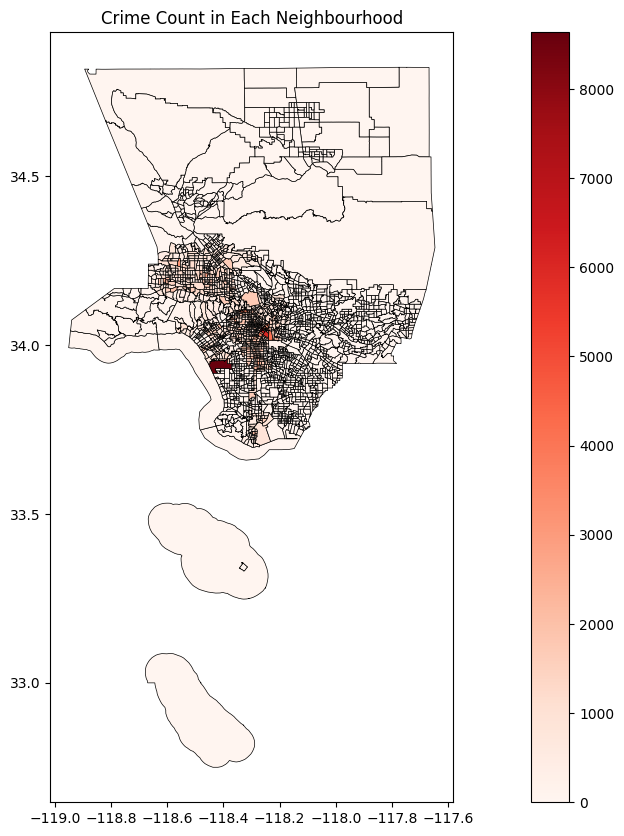

In [49]:
fig,ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(column='crime_count',cmap='Reds',linewidth=0.5,edgecolor='black',legend=True,ax=ax)
plt.title('Crime Count in Each Neighbourhood')
plt.show()

In [50]:
neighbourhoods['crime_count'].value_counts()

crime_count
0.0       1270
1.0         13
3.0          9
2.0          9
12.0         6
          ... 
1337.0       1
455.0        1
954.0        1
362.0        1
156.0        1
Name: count, Length: 837, dtype: int64

In [51]:
tca = neighbourhoods.sort_values(by='crime_count',ascending=False).head(10)
print(tca[['NAME','crime_count']])

         NAME  crime_count
2125  2077.11       8636.0
2012  9800.28       8596.0
1047  2079.02       5987.0
589   2260.02       5968.0
1018  2077.12       4379.0
1480  2060.51       4118.0
1632  1907.01       4064.0
598   2071.02       4056.0
1816  2240.20       3610.0
1633  1901.01       3557.0


In [52]:
h1 = neighbourhoods[neighbourhoods['crime_count'] > 500]
print(h1)

     STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  \
25        06      037  237900  06037237900     2379     Census Tract 2379   
27        06      037  228600  06037228600     2286     Census Tract 2286   
28        06      037  222600  06037222600     2226     Census Tract 2226   
31        06      037  208904  06037208904  2089.04  Census Tract 2089.04   
37        06      037  122410  06037122410  1224.10  Census Tract 1224.10   
...      ...      ...     ...          ...      ...                   ...   
2492      06      037  192700  06037192700     1927     Census Tract 1927   
2493      06      037  194500  06037194500     1945     Census Tract 1945   
2494      06      037  195100  06037195100     1951     Census Tract 1951   
2495      06      037  195300  06037195300     1953     Census Tract 1953   
2496      06      037  137501  06037137501  1375.01  Census Tract 1375.01   

      MTFCC FUNCSTAT      ALAND    AWATER     INTPTLAT      INTPTLON  \
25 

In [53]:
h1[['geometry','crime_count']]

,geometry,crime_count
25,"POLYGON ((-118.31775 33.96819, -118.31775 33.9...",1079.0
27,"POLYGON ((-118.26524 34.0066, -118.26086 34.00...",1353.0
28,"POLYGON ((-118.30026 34.0246, -118.30021 34.02...",1662.0
31,"POLYGON ((-118.27185 34.05934, -118.2713 34.06...",536.0
37,"POLYGON ((-118.39652 34.20847, -118.39433 34.2...",967.0
...,...,...
2492,"POLYGON ((-118.29171 34.08359, -118.29051 34.0...",686.0
2493,"POLYGON ((-118.3788 34.07639, -118.37865 34.07...",2689.0
2494,"POLYGON ((-118.27691 34.09583, -118.2768 34.09...",752.0
2495,"POLYGON ((-118.29177 34.10178, -118.28959 34.1...",904.0


In [54]:
print(h1.crs)

EPSG:4269


In [55]:
h1 = h1.to_crs(epsg=3857)
print(h1)


     STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  \
25        06      037  237900  06037237900     2379     Census Tract 2379   
27        06      037  228600  06037228600     2286     Census Tract 2286   
28        06      037  222600  06037222600     2226     Census Tract 2226   
31        06      037  208904  06037208904  2089.04  Census Tract 2089.04   
37        06      037  122410  06037122410  1224.10  Census Tract 1224.10   
...      ...      ...     ...          ...      ...                   ...   
2492      06      037  192700  06037192700     1927     Census Tract 1927   
2493      06      037  194500  06037194500     1945     Census Tract 1945   
2494      06      037  195100  06037195100     1951     Census Tract 1951   
2495      06      037  195300  06037195300     1953     Census Tract 1953   
2496      06      037  137501  06037137501  1375.01  Census Tract 1375.01   

      MTFCC FUNCSTAT      ALAND    AWATER     INTPTLAT      INTPTLON  \
25 

In [56]:
print(h1.crs)

EPSG:3857


In [57]:
h1['centroid'] = h1.geometry.centroid


In [58]:
h1 = h1.to_crs(epsg=4326)
h1['centroid_lat'] = h1['centroid'].y
h1['centroid_lon'] = h1['centroid'].x

In [59]:
print(h1.crs)

EPSG:4326


In [60]:
print(h1[['centroid_lat','centroid_lon']].head())

    centroid_lat  centroid_lon
25  4.024899e+06 -1.317034e+07
27  4.029298e+06 -1.316474e+07
28  4.031735e+06 -1.316864e+07
31  4.036803e+06 -1.316577e+07
37  4.056292e+06 -1.317933e+07


In [61]:
print(h1[['centroid_lat','centroid_lon']].dtypes)

centroid_lat    float64
centroid_lon    float64
dtype: object


In [62]:
gdf[['LAT','LON']]

,LAT,LON
0,34.0375,-118.3506
1,34.0444,-118.2628
2,34.0210,-118.3002
3,34.1576,-118.4387
4,34.0944,-118.3277
...,...,...
982633,34.0617,-118.3066
982634,34.0362,-118.3284
982635,34.0685,-118.2460
982636,34.0215,-118.2868


In [63]:
testmap1 = folium.Map(location=[34.1576,-118.4387],zoom_start=12)
folium.Marker(location=[34.05, -118.25], popup="Los Angeles").add_to(testmap1)
testmap1.save('testphirse.html')

In [64]:
ngb.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,06,037,262601,06037262601,2626.01,Census Tract 2626.01,G5020,S,3620351.0,0.0,+34.0738344,-118.5557893,0.108596,0.000354,"POLYGON ((-118.57556 34.08019, -118.57497 34.0..."
1,06,037,300100,06037300100,3001,Census Tract 3001,G5020,S,4591342.0,18657.0,+34.2442558,-118.2325716,0.094693,0.000451,"POLYGON ((-118.2486 34.23881, -118.24858 34.23..."
2,06,037,300501,06037300501,3005.01,Census Tract 3005.01,G5020,S,1260255.0,0.0,+34.2206887,-118.2400494,0.061435,0.000123,"POLYGON ((-118.24875 34.22249, -118.24875 34.2..."
3,06,037,310701,06037310701,3107.01,Census Tract 3107.01,G5020,S,515339.0,0.0,+34.1853923,-118.3128440,0.036201,0.000050,"POLYGON ((-118.31952 34.18495, -118.31915 34.1..."
4,06,037,300200,06037300200,3002,Census Tract 3002,G5020,S,1943986.0,10136.0,+34.2283768,-118.2386852,0.067506,0.000191,"POLYGON ((-118.24864 34.23324, -118.24863 34.2..."


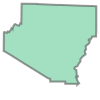

In [65]:
ngb['geometry'].iloc[1]

In [66]:
print(h1.crs)

EPSG:4326


In [67]:
h1 = h1.to_crs(epsg=3857)
h1['centroid1'] = h1.geometry.centroid

In [68]:
h1 = h1.to_crs(epsg=4326)
h1['cenlat1'] = h1['centroid1'].y
h1['cenlon1'] = h1['centroid1'].x

In [69]:
print(h1[['cenlat1','cenlon1']].head(10))

         cenlat1       cenlon1
25  4.024899e+06 -1.317034e+07
27  4.029298e+06 -1.316474e+07
28  4.031735e+06 -1.316864e+07
31  4.036803e+06 -1.316577e+07
37  4.056292e+06 -1.317933e+07
38  4.057662e+06 -1.319392e+07
39  4.059197e+06 -1.319692e+07
40  4.064028e+06 -1.318923e+07
45  4.034661e+06 -1.315853e+07
47  4.018888e+06 -1.316756e+07


In [70]:
print(h1[['cenlat1','cenlon1']].describe())

            cenlat1       cenlon1
count  8.180000e+02  8.180000e+02
mean   4.039412e+06 -1.317588e+07
std    1.503666e+04  1.178373e+04
min    3.990718e+06 -1.320801e+07
25%    4.031298e+06 -1.318457e+07
50%    4.037335e+06 -1.317263e+07
75%    4.052179e+06 -1.316682e+07
max    4.068827e+06 -1.315403e+07


In [71]:
print(h1.crs)

EPSG:4326


In [72]:
h1 = h1.to_crs(epsg=2229)
print(h1.crs)

EPSG:2229


In [73]:
h1['centroid2'] = h1.geometry.centroid


In [74]:
h1 = h1.to_crs(epsg=4326)
print(h1.crs)

EPSG:4326


In [75]:
h1['centlat1_new'] = h1['centroid2'].y
h1['centlon2_new'] = h1['centroid2'].x

In [76]:
print(h1[['centlat1_new','centlon2_new']].describe())

       centlat1_new  centlon2_new
count  8.180000e+02  8.180000e+02
mean   1.851310e+06  6.452402e+06
std    4.080470e+04  3.194947e+04
min    1.719119e+06  6.365236e+06
25%    1.829276e+06  6.428613e+06
50%    1.845643e+06  6.461159e+06
75%    1.885936e+06  6.476918e+06
max    1.930973e+06  6.511811e+06


Debugg the Mistakes

In [77]:
print(h1.crs)
print(h1.geometry.iloc[0])


EPSG:4326
POLYGON ((-118.31775100020842 33.96818600018384, -118.31775000016233 33.969088000410906, -118.31774900011622 33.96998899969264, -118.31774700002399 33.97080799968949, -118.31774700002399 33.97092299959678, -118.3177459999779 33.97187500033107, -118.31774499993179 33.97277699965883, -118.31774399988564 33.97367799983989, -118.31774299983955 33.97458500029756, -118.31683700032727 33.97458300020536, -118.31587600007732 33.974581000113155, -118.3155490002861 33.97458000006703, -118.31335799997167 33.974573999790316, -118.31116799970337 33.974568999559715, -118.3089669998271 33.97456300018235, -118.30784500024653 33.97456500027458, -118.30678900011226 33.97456700036684, -118.30572499960903 33.97456800041295, -118.30461999991303 33.97456999960587, -118.30462400009746 33.972761999866464, -118.30462900032808 33.97091800026554, -118.30463299961322 33.969072999719245, -118.30463599975157 33.96728800014114, -118.30574200039294 33.96728900018724, -118.30681799965093 33.96728900018726, -1

In [78]:
h1 = h1.to_crs(epsg=2229)
print(h1.crs)

EPSG:2229


In [79]:
h1['centroid3'] = h1.geometry.centroid

In [80]:
h1 = h1.to_crs(epsg=4326)
print(h1.crs)

EPSG:4326


In [81]:
h1['cen_lat1'] = h1['centroid'].y
h1['cen_lon1'] = h1['centroid'].x

In [82]:
print(h1[['cen_lat1','cen_lon1']].describe())

           cen_lat1      cen_lon1
count  8.180000e+02  8.180000e+02
mean   4.039412e+06 -1.317588e+07
std    1.503666e+04  1.178373e+04
min    3.990718e+06 -1.320801e+07
25%    4.031298e+06 -1.318457e+07
50%    4.037335e+06 -1.317263e+07
75%    4.052179e+06 -1.316682e+07
max    4.068827e+06 -1.315403e+07


In [83]:
print(h1.crs)

EPSG:4326


In [84]:
h1 = h1.to_crs(epsg=2229)
print(h1.crs)

EPSG:2229


In [85]:
h1['centroid5'] = h1.geometry.centroid


In [86]:
h1 = h1.to_crs(epsg=4326)
print(h1.crs)

EPSG:4326


In [87]:
h1['cent5lat'] = h1['centroid5'].y
h1['cent5lon'] = h1['centroid5'].x

In [88]:
print(h1[['cent5lat','cent5lon']].describe())

           cent5lat      cent5lon
count  8.180000e+02  8.180000e+02
mean   1.851310e+06  6.452402e+06
std    4.080470e+04  3.194947e+04
min    1.719119e+06  6.365236e+06
25%    1.829276e+06  6.428613e+06
50%    1.845643e+06  6.461159e+06
75%    1.885936e+06  6.476918e+06
max    1.930973e+06  6.511811e+06


Debug 2


In [89]:
print(h1.crs)
print(h1['geometry'].iloc[0])

EPSG:4326
POLYGON ((-118.31775100020842 33.96818600018384, -118.31775000016233 33.969088000410906, -118.31774900011622 33.96998899969264, -118.31774700002399 33.97080799968949, -118.31774700002399 33.97092299959678, -118.3177459999779 33.97187500033107, -118.31774499993179 33.97277699965883, -118.31774399988564 33.97367799983989, -118.31774299983955 33.97458500029756, -118.31683700032727 33.97458300020532, -118.31587600007732 33.97458100011316, -118.3155490002861 33.97458000006703, -118.31335799997167 33.97457399979028, -118.31116799970337 33.974568999559715, -118.3089669998271 33.97456300018235, -118.30784500024653 33.97456500027458, -118.30678900011226 33.97456700036684, -118.30572499960903 33.97456800041295, -118.30461999991303 33.97456999960587, -118.30462400009746 33.972761999866464, -118.30462900032808 33.97091800026554, -118.30463299961322 33.969072999719245, -118.30463599975157 33.96728800014114, -118.30574200039294 33.96728900018724, -118.30681799965093 33.96728900018726, -118

In [90]:
h1 = h1.to_crs(epsg=3857)
print(h1.crs)

EPSG:3857


In [91]:
h1['centroid6'] = h1.geometry.centroid


In [92]:
h1['centroid6'].head(10)

25      POINT (-13170341.7 4024899.217)
27     POINT (-13164739.39 4029297.995)
28    POINT (-13168636.121 4031735.321)
31    POINT (-13165766.517 4036803.376)
37    POINT (-13179334.253 4056292.301)
38    POINT (-13193915.922 4057662.209)
39    POINT (-13196920.088 4059197.346)
40    POINT (-13189232.137 4064027.874)
45    POINT (-13158528.845 4034660.569)
47     POINT (-13167563.75 4018887.813)
Name: centroid6, dtype: geometry

In [93]:
h1 = h1.to_crs(epsg=4326)
print(h1.crs)

EPSG:4326


In [94]:
h1['centroid6'].head(10)

25      POINT (-13170341.7 4024899.217)
27     POINT (-13164739.39 4029297.995)
28    POINT (-13168636.121 4031735.321)
31    POINT (-13165766.517 4036803.376)
37    POINT (-13179334.253 4056292.301)
38    POINT (-13193915.922 4057662.209)
39    POINT (-13196920.088 4059197.346)
40    POINT (-13189232.137 4064027.874)
45    POINT (-13158528.845 4034660.569)
47     POINT (-13167563.75 4018887.813)
Name: centroid6, dtype: geometry

In [95]:
h1['finalelat'] = h1['centroid6'].y
h1['finalelon'] = h1['centroid6'].x

In [96]:
print(h1[['finalelat','finalelon']].head(10))

       finalelat     finalelon
25  4.024899e+06 -1.317034e+07
27  4.029298e+06 -1.316474e+07
28  4.031735e+06 -1.316864e+07
31  4.036803e+06 -1.316577e+07
37  4.056292e+06 -1.317933e+07
38  4.057662e+06 -1.319392e+07
39  4.059197e+06 -1.319692e+07
40  4.064028e+06 -1.318923e+07
45  4.034661e+06 -1.315853e+07
47  4.018888e+06 -1.316756e+07


In [97]:
print(h1.crs)

EPSG:4326


In [98]:
print("Original CRS:", h1.crs)
hotspotsmain = h1.to_crs(epsg=4326)
print("Converted CRS:", h1.crs)
print(h1.geometry.iloc[0])


Original CRS: EPSG:4326
Converted CRS: EPSG:4326
POLYGON ((-118.31775100020842 33.96818600018384, -118.31775000016233 33.969088000410906, -118.31774900011622 33.96998899969264, -118.31774700002399 33.97080799968949, -118.31774700002399 33.97092299959678, -118.3177459999779 33.97187500033106, -118.31774499993179 33.97277699965881, -118.31774399988564 33.97367799983989, -118.31774299983955 33.97458500029756, -118.31683700032727 33.974583000205314, -118.31587600007732 33.97458100011316, -118.3155490002861 33.97458000006703, -118.31335799997167 33.97457399979028, -118.31116799970337 33.974568999559715, -118.3089669998271 33.97456300018235, -118.30784500024653 33.97456500027458, -118.30678900011226 33.97456700036684, -118.30572499960903 33.97456800041294, -118.30461999991303 33.974569999605876, -118.30462400009746 33.972761999866464, -118.30462900032808 33.97091800026554, -118.30463299961322 33.96907299971925, -118.30463599975157 33.96728800014114, -118.30574200039294 33.96728900018725, -11

In [99]:
print(h1.crs)

EPSG:4326


In [100]:
h1 = h1.to_crs(epsg=3857)
print(h1.crs)

EPSG:3857


In [101]:
h1['centroid7'] = h1.geometry.centroid

In [102]:
h1['centroid7']

25        POINT (-13170341.7 4024899.217)
27       POINT (-13164739.39 4029297.995)
28      POINT (-13168636.121 4031735.321)
31      POINT (-13165766.517 4036803.376)
37      POINT (-13179334.253 4056292.301)
                      ...                
2492    POINT (-13167771.765 4039550.948)
2493    POINT (-13176843.131 4039303.887)
2494    POINT (-13165402.133 4042348.433)
2495    POINT (-13167280.072 4042136.755)
2496    POINT (-13199909.338 4050970.276)
Name: centroid7, Length: 818, dtype: geometry

In [103]:
h1 = h1.set_geometry('centroid7')

In [104]:
h1 = h1.to_crs(epsg=4326) 
print(h1.crs)

EPSG:4326


In [105]:
h1['latlast'] = h1['centroid7'].y
h1['lonlast'] = h1['centroid7'].x

In [106]:
print(h1[['latlast','lonlast']].head(10))

      latlast     lonlast
25  33.970929 -118.311192
27  34.003694 -118.260866
28  34.021843 -118.295871
31  34.059568 -118.270093
37  34.204483 -118.391974
38  34.214660 -118.522963
39  34.226063 -118.549950
40  34.261934 -118.480888
45  34.043620 -118.205076
47  33.926133 -118.286238


crime counts over 1000

In [107]:
h1['crime_count'].sort_values(ascending=False)

2125    8636.0
2012    8596.0
1047    5987.0
589     5968.0
1018    4379.0
         ...  
1514     505.0
452      505.0
861      503.0
2283     502.0
1101     501.0
Name: crime_count, Length: 818, dtype: float64

In [109]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster


m1 = folium.Map(location=[34.05, -118.27], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m1)


for i, row in h1.iterrows():
    folium.CircleMarker(
        location=[row['latlast'], row['lonlast']],
        radius=5, 
        color="red", 
        fill=True,  
        fill_color="red",  
        fill_opacity=0.7,
        popup=f"Crime Count: {row['crime_count']}"
    ).add_to(marker_cluster)



m1.save("now.html")





Run till here only!!!

In [ ]:
print(magerita)

In [ ]:
print(h1[['latlast','lonlast']].describe())

          latlast     lonlast
count  818.000000  818.000000
mean    34.078906 -118.360913
std      0.111918    0.105855
min     33.715903 -118.649541
25%     34.018583 -118.439035
50%     34.063524 -118.331786
75%     34.173920 -118.279565
max     34.297555 -118.164655


Model Training to get best predictions

In [ ]:
df1.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Mocodes,Vict Age,...,AREA NAME_West Valley,AREA NAME_Wilshire,Status_AO,Status_CC,Status_IC,Status_JA,Status_JO,Status_Unknown,Year,Month
0,190326475.0,2020-03-01,2020-03-01,2130.0,7.0,784.0,1.0,510.0,Unknown,0.0,...,False,True,False,False,False,False,False,False,2020,3
1,200106753.0,2020-02-09,2020-02-08,1800.0,1.0,182.0,1.0,330.0,1822 1402 0344,47.0,...,False,False,False,False,True,False,False,False,2020,2


In [ ]:
df_time = df1.resample('ME',on='DATE OCC').size()

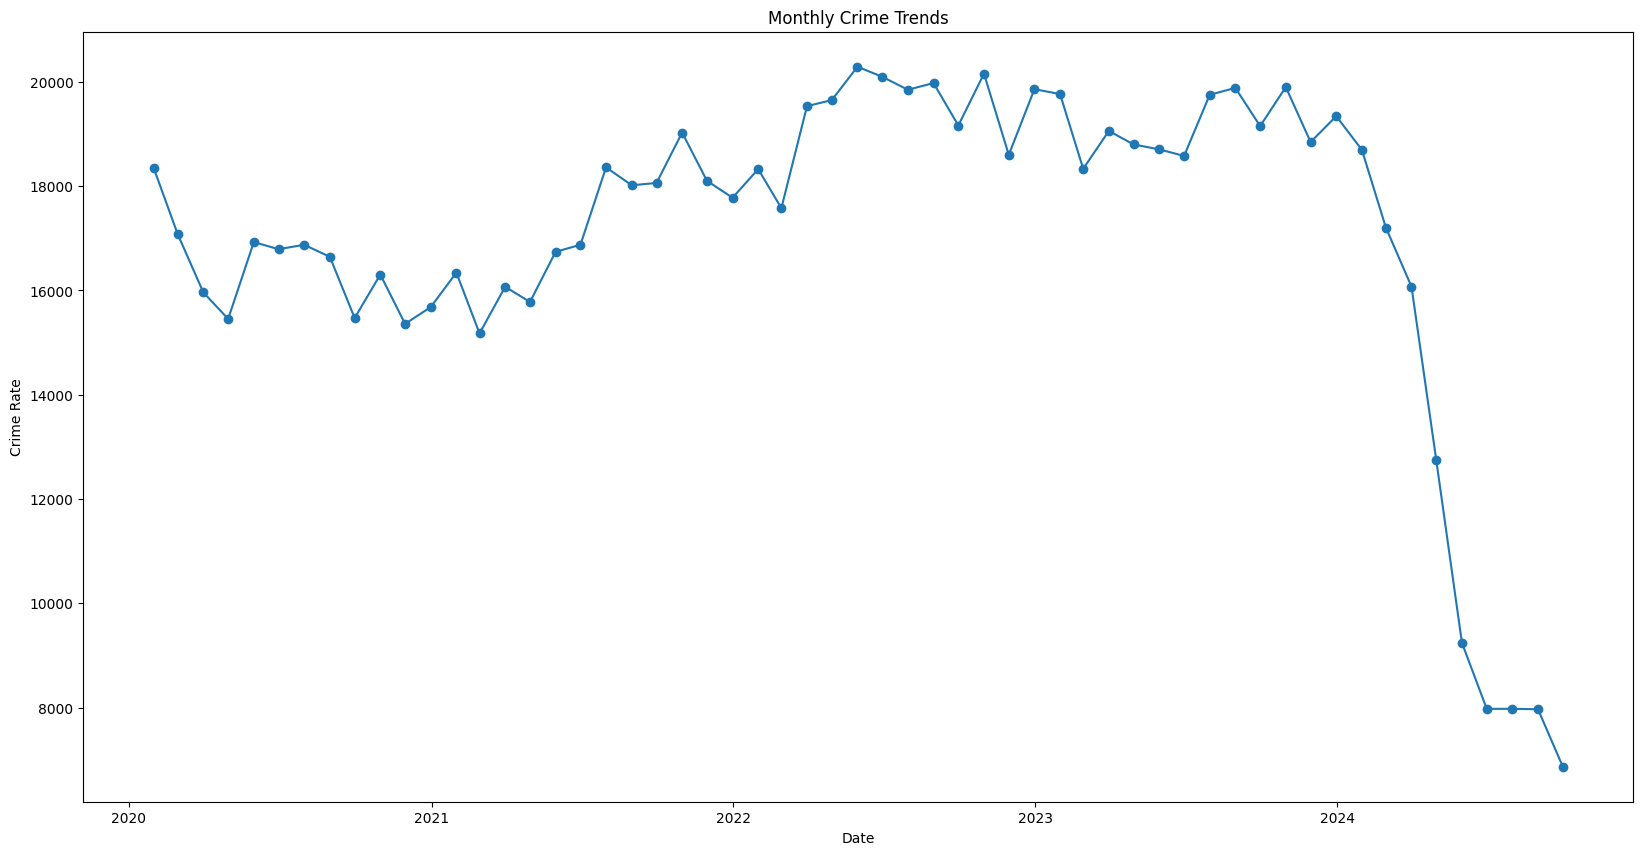

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_time,marker='o',linestyle='-')
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.show()


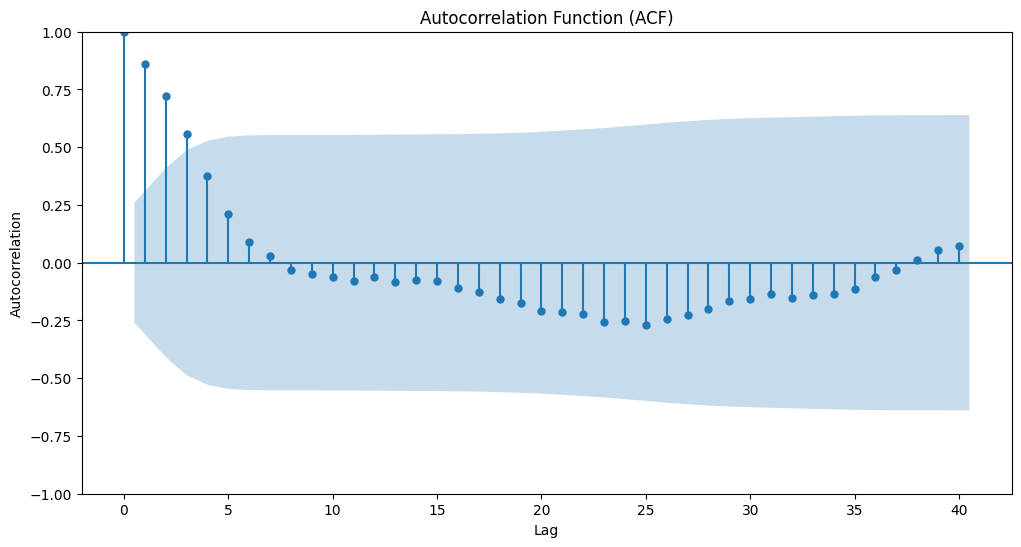

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df_time, ax=ax, lags=40)
plt.title("Autocorrelation Function (ACF)")
# plot_pacf(df_time,ax=ax)
# plt.title(" Partial Autocorrelation Function (PACF)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

<Figure size 1000x500 with 0 Axes>

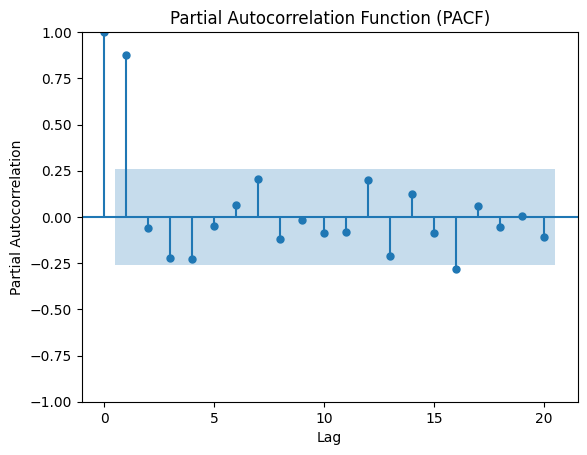

In [ ]:
plt.figure(figsize=(10,5))
plot_pacf(df_time, lags=20, method='yw') 
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [ ]:
result = adfuller(df_time)
print(f"ADF Statistic:{result[0]}")
print(f"p-value:{result[1]}")

if result[1] > 0.05:
    print(f"Data not Stationary")

ADF Statistic:-1.034411883757767
p-value:0.7405074149291696
Data not Stationary


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_time, order=(1,1,1))
model_fit = model.fit()
prediction = model_fit.forecast(steps=24)
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   57
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -469.699
Date:                Wed, 19 Feb 2025   AIC                            945.398
Time:                        11:39:05   BIC                            951.474
Sample:                    01-31-2020   HQIC                           947.754
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8942      0.513      1.742      0.081      -0.112       1.900
ma.L1         -0.8690      0.539     -1.613      0.107      -1.925       0.187
sigma2      1.116e+06   1.97e+05      5.679      0.0

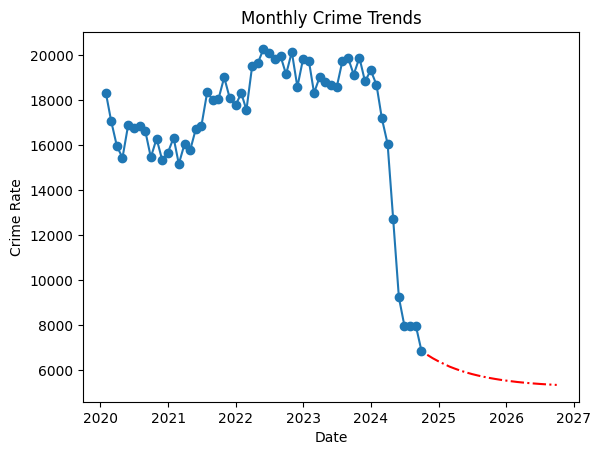

In [ ]:
plt.plot(df_time,marker='o',linestyle='-')
plt.plot(prediction.index,prediction,linestyle='-.',color='red')
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.show()


2nd Model

In [ ]:
model1 = ARIMA(df_time, order=(1,0,1))
model1_fit = model1.fit()
prediction1 = model1_fit.forecast(steps=24)
print(model1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   57
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -479.474
Date:                Wed, 19 Feb 2025   AIC                            966.947
Time:                        11:39:05   BIC                            975.119
Sample:                    01-31-2020   HQIC                           970.123
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.704e+04   7607.659      2.240      0.025    2128.103    3.19e+04
ar.L1          0.9756      0.044     22.134      0.000       0.889       1.062
ma.L1          0.1043      0.137      0.764      0.4

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


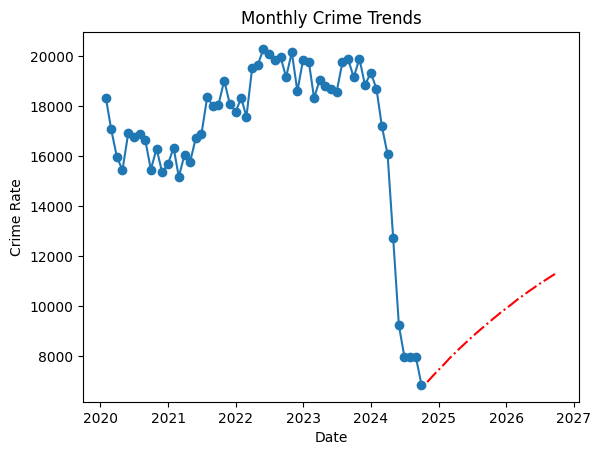

In [ ]:
plt.plot(df_time,marker='o',linestyle='-')
plt.plot(prediction1.index,prediction1,linestyle='-.',color='red')
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.show()

3rd Model

In [ ]:
model2 = ARIMA(df_time, order=(2,1,1))
model2_fit = model2.fit()
prediction2 = model2_fit.forecast(steps=24)
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   57
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -469.303
Date:                Wed, 19 Feb 2025   AIC                            946.606
Time:                        11:39:05   BIC                            954.707
Sample:                    01-31-2020   HQIC                           949.747
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6601      0.705      0.936      0.349      -0.722       2.042
ar.L2          0.0856      0.079      1.080      0.280      -0.070       0.241
ma.L1         -0.6948      0.708     -0.981      0.3

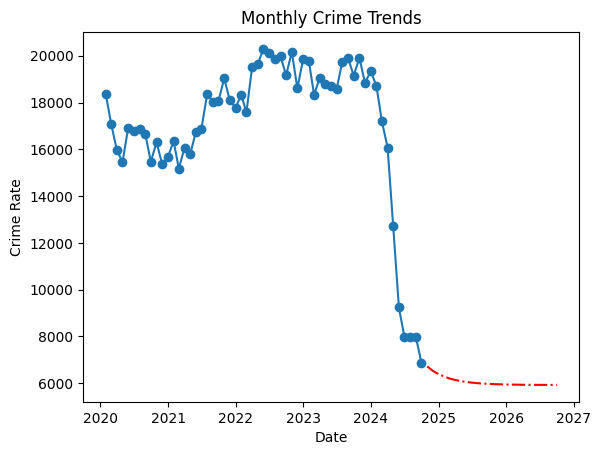

In [ ]:
plt.plot(df_time,marker='o',linestyle='-')
plt.plot(prediction2.index,prediction2,linestyle='-.',color='red')
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.show()

4th Model

In [ ]:
model3 = ARIMA(df_time, order=(1,1,2))
model3_fit = model3.fit()
prediction3 = model3_fit.forecast(steps=24)
print(model3_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   57
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -469.284
Date:                Wed, 19 Feb 2025   AIC                            946.567
Time:                        11:39:05   BIC                            954.669
Sample:                    01-31-2020   HQIC                           949.708
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7323      0.637      1.150      0.250      -0.516       1.980
ma.L1         -0.7733      0.637     -1.215      0.224      -2.021       0.474
ma.L2          0.0945      0.084      1.130      0.2

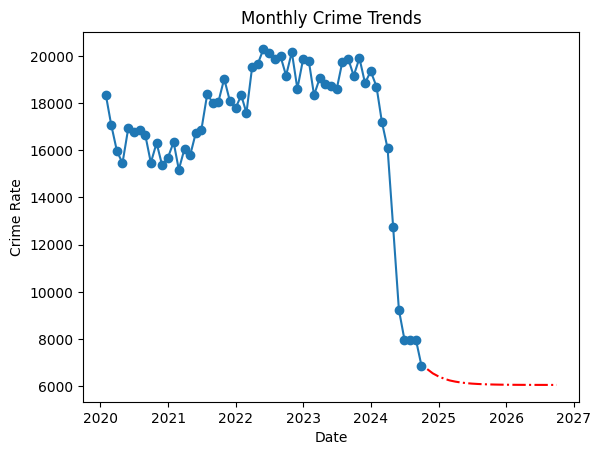

In [ ]:
plt.plot(df_time,marker='o',linestyle='-')
plt.plot(prediction3.index,prediction3,linestyle='-.',color='red')
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.show()

5th Model

In [ ]:
model4 = ARIMA(df_time, order=(2,0,1))
model4_fit = model4.fit()
prediction4 = model4_fit.forecast(steps=24)
print(model4_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   57
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -479.217
Date:                Wed, 19 Feb 2025   AIC                            968.433
Time:                        11:39:06   BIC                            978.649
Sample:                    01-31-2020   HQIC                           972.403
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.704e+04   9453.164      1.802      0.071   -1489.995    3.56e+04
ar.L1          0.0750      0.117      0.640      0.522      -0.155       0.304
ar.L2          0.8868      0.111      7.987      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


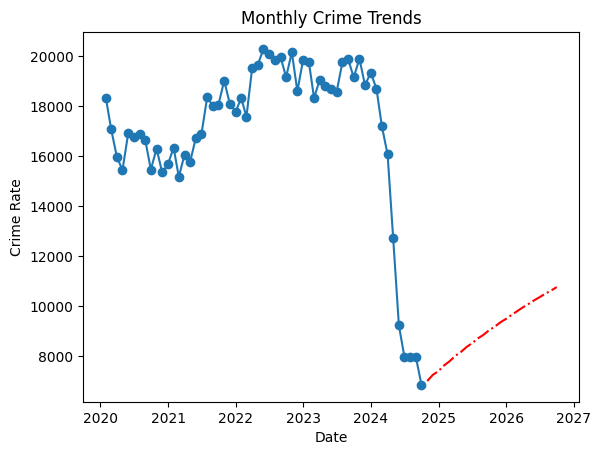

In [ ]:
plt.plot(df_time,marker='o',linestyle='-')
plt.plot(prediction4.index,prediction4,linestyle='-.',color='red')
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.show()

In [ ]:
neighbourhoods.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng',
       'Shape_Area', 'geometry', 'crime_count'],
      dtype='object')

In [ ]:
h1.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng',
       'Shape_Area', 'geometry', 'crime_count', 'centroid', 'centroid_lat',
       'centroid_lon', 'centroid1', 'cenlat1', 'cenlon1', 'centroid2',
       'centlat1_new', 'centlon2_new', 'centroid3', 'cen_lat1', 'cen_lon1',
       'centroid5', 'cent5lat', 'cent5lon', 'centroid6', 'finalelat',
       'finalelon', 'centroid7', 'latlast', 'lonlast'],
      dtype='object')

In [ ]:
df1.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Mocodes', 'Vict Age',
       ...
       'AREA NAME_West Valley', 'AREA NAME_Wilshire', 'Status_AO', 'Status_CC',
       'Status_IC', 'Status_JA', 'Status_JO', 'Status_Unknown', 'Year',
       'Month'],
      dtype='object', length=192)

In [ ]:
df_time

DATE OCC
2020-01-31    18348
2020-02-29    17079
2020-03-31    15962
2020-04-30    15454
2020-05-31    16928
2020-06-30    16792
2020-07-31    16876
2020-08-31    16645
2020-09-30    15471
2020-10-31    16306
2020-11-30    15359
2020-12-31    15682
2021-01-31    16342
2021-02-28    15176
2021-03-31    16071
2021-04-30    15779
2021-05-31    16742
2021-06-30    16876
2021-07-31    18362
2021-08-31    18018
2021-09-30    18062
2021-10-31    19029
2021-11-30    18103
2021-12-31    17779
2022-01-31    18328
2022-02-28    17579
2022-03-31    19536
2022-04-30    19652
2022-05-31    20292
2022-06-30    20099
2022-07-31    19850
2022-08-31    19979
2022-09-30    19164
2022-10-31    20159
2022-11-30    18601
2022-12-31    19861
2023-01-31    19768
2023-02-28    18334
2023-03-31    19060
2023-04-30    18801
2023-05-31    18706
2023-06-30    18581
2023-07-31    19753
2023-08-31    19886
2023-09-30    19153
2023-10-31    19902
2023-11-30    18847
2023-12-31    19343
2024-01-31    18698
2024-02-29 

Applying seasonal diffrence 

In [ ]:
result_new = adfuller(df_time)
print(f"ADF Statistic : {result_new[0]}")
print(f"p-value : {result_new[1]}")

if result_new[1] > 0.05:
    print("Series is not stationary.")

ADF Statistic : -1.034411883757767
p-value : 0.7405074149291696
Series is not stationary.


In [ ]:
seasonal_diff_dftime = df_time.diff().diff(12).dropna()

In [ ]:
result21 = adfuller(seasonal_diff_dftime)
print(f"ADF Statistic : {result21[0]}")
print(f"p-value : {result21[1]}")

if result21[1] > 0.05:
    print(f"Series is not Stationary")

ADF Statistic : -1.596931477998535
p-value : 0.4851347236707371
Series is not Stationary


In [ ]:
new_seasonaldiff = df_time.diff().diff().diff(12).dropna()

In [ ]:
result31 = adfuller(new_seasonaldiff)
print(f"ADF Statistic : {result31[0]}")
print(f"p-value : {result31[1]}")

if result31[1] > 0.05:
    print(f"Series is not Stationary")

ADF Statistic : -2.926351187098027
p-value : 0.04236840605848708


Lets check Result31 and new_seasonaldiff

In [ ]:
model5 = ARIMA(new_seasonaldiff,order=(1,0,1))
model5_fit = model5.fit()
predictions5 = model5_fit.forecast(steps=12)
print(model5_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   43
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -355.062
Date:                Wed, 19 Feb 2025   AIC                            718.124
Time:                        11:39:06   BIC                            725.169
Sample:                    03-31-2021   HQIC                           720.722
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.2251     14.618     -2.683      0.007     -67.875     -10.575
ar.L1          0.2510      0.164      1.527      0.127      -0.071       0.573
ma.L1         -0.9995      0.256     -3.904      0.0

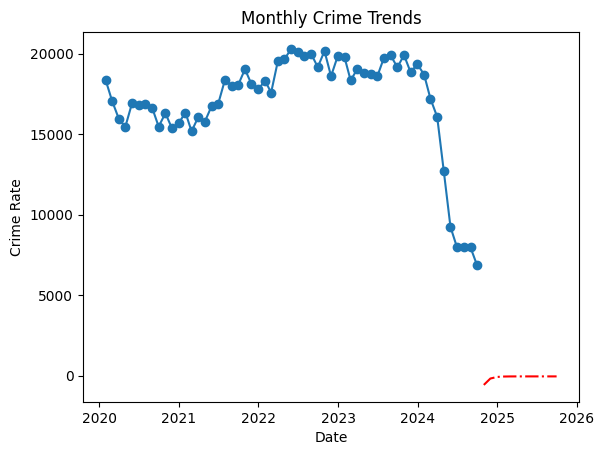

In [ ]:
plt.plot(df_time,marker='o',linestyle='-')
plt.plot(predictions5.index,predictions5,linestyle='-.',color='red')
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.show()

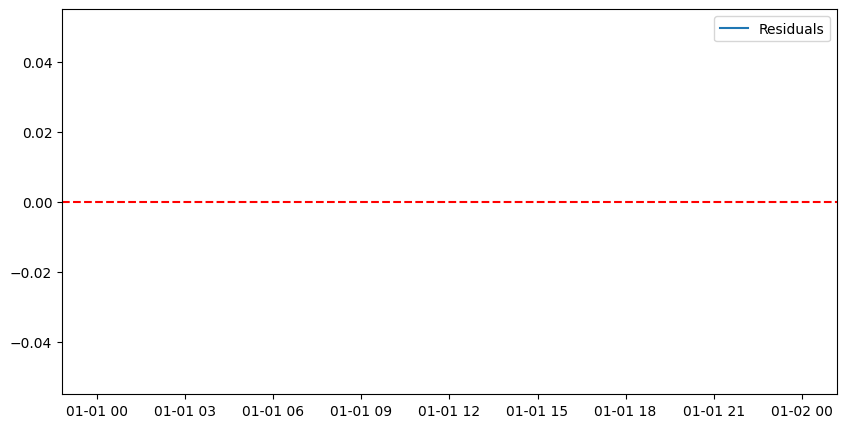

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate residuals
residuals = df_time - predictions5

# Plot residuals
plt.figure(figsize=(10, 5))
plt.plot(residuals, label="Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.legend()
plt.show()


Do it Again

In [ ]:
df_time.head(2)

DATE OCC
2020-01-31    18348
2020-02-29    17079
Freq: ME, dtype: int64

In [ ]:
resultoftime = adfuller(df_time)
print(f"ADF Statistic : {resultoftime[0]}")
print(f"p-value : {resultoftime[1]}")

if resultoftime[1] > 0.05:
    print(f"Series is not Stationary Bitch!")

ADF Statistic : -1.034411883757767
p-value : 0.7405074149291696
Series is not Stationary Bitch!


In [ ]:
sd1 = df_time.diff().diff().diff(12).dropna()


In [ ]:
resultrepeated = adfuller(sd1)
print(f"ADF Statistic : {resultrepeated[0]}")
print(f"p-value : {resultrepeated[1]}")

if resultrepeated[1] > 0.05:
    print(f"Series is not Stationary Bitch!")

ADF Statistic : -2.926351187098027
p-value : 0.04236840605848708


In [ ]:
auto_model = auto_arima(sd1,seasonal=True,m=12,trace=True,suppress_warnings=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=731.401, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=724.150, Time=0.01 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=729.405, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=724.726, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=726.147, Time=0.03 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=726.145, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=724.463, Time=0.01 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=727.742, Time=0.02 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=726.101, Time=0.01 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=717.563, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=720.69

In [ ]:
sarima_model = SARIMAX(sd1,order=(1,0,1),seasonal_order=(1,0,0,12))
sarima_result = sarima_model.fit()

forecast_steps=12
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=sd1.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')
forecast_values = forecast.predicted_mean

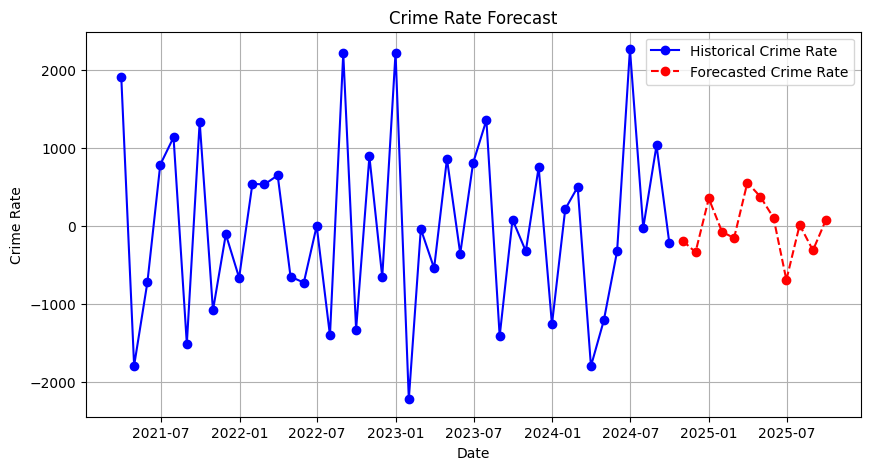

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(sd1, marker='o', label="Historical Crime Rate", color="blue")
plt.plot(forecast_index, forecast_values, marker='o', linestyle='dashed', label="Forecasted Crime Rate", color="red")
plt.title("Crime Rate Forecast")
plt.xlabel("Date")
plt.ylabel("Crime Rate")
plt.legend()
plt.grid(True)
plt.show()

Doing the above again with diffrent parameters


In [ ]:
sarimanew = SARIMAX(sd1,order=(1,1,1),seasonal_order=(1,0,1,12))
sarima_res = sarimanew.fit()

newstepcount = 24
forecast1 = sarima_res.forecast(steps=newstepcount)
forecast_index1 = pd.date_range(start=sd1.index[-1] + pd.DateOffset(months=1),periods=newstepcount,freq='ME')
forecast_values1 = forecast1

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


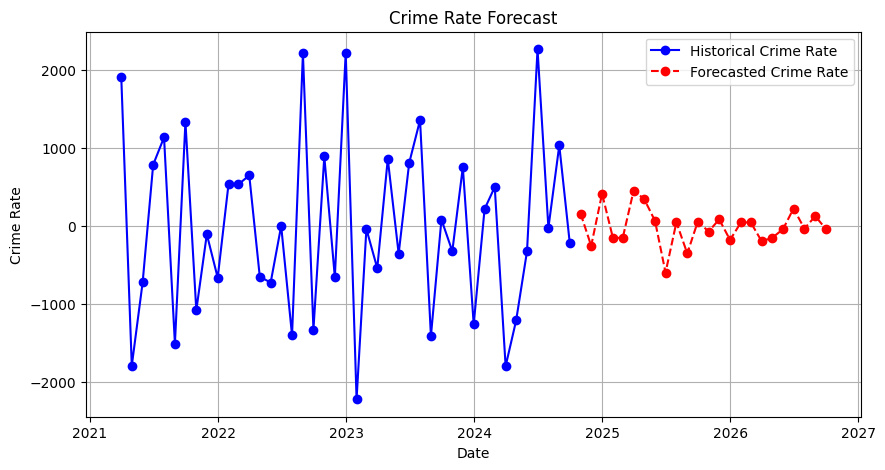

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(sd1, marker='o', label="Historical Crime Rate", color="blue")
plt.plot(forecast_index1, forecast_values1 , marker='o', linestyle='dashed', label="Forecasted Crime Rate", color="red")
plt.title("Crime Rate Forecast")
plt.xlabel("Date")
plt.ylabel("Crime Rate")
plt.legend()
plt.grid(True)
plt.show()

Check options in order to find model accuracies methods and visit traditional model building methods like RF,DT etc

In [ ]:
df1.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Mocodes', 'Vict Age',
       ...
       'AREA NAME_West Valley', 'AREA NAME_Wilshire', 'Status_AO', 'Status_CC',
       'Status_IC', 'Status_JA', 'Status_JO', 'Status_Unknown', 'Year',
       'Month'],
      dtype='object', length=192)

In [ ]:
special = [col for col in df1.columns if 'Crm Cd Desc_' in col]
special

['Crm Cd Desc_ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
 'Crm Cd Desc_ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'Crm Cd Desc_ATTEMPTED ROBBERY',
 'Crm Cd Desc_BATTERY - SIMPLE ASSAULT',
 'Crm Cd Desc_BATTERY ON A FIREFIGHTER',
 'Crm Cd Desc_BATTERY POLICE (SIMPLE)',
 'Crm Cd Desc_BATTERY WITH SEXUAL CONTACT',
 'Crm Cd Desc_BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
 'Crm Cd Desc_BIGAMY',
 'Crm Cd Desc_BIKE - ATTEMPTED STOLEN',
 'Crm Cd Desc_BIKE - STOLEN',
 'Crm Cd Desc_BLOCKING DOOR INDUCTION CENTER',
 'Crm Cd Desc_BOAT - STOLEN',
 'Crm Cd Desc_BOMB SCARE',
 'Crm Cd Desc_BRANDISH WEAPON',
 'Crm Cd Desc_BRIBERY',
 'Crm Cd Desc_BUNCO, ATTEMPT',
 'Crm Cd Desc_BUNCO, GRAND THEFT',
 'Crm Cd Desc_BUNCO, PETTY THEFT',
 'Crm Cd Desc_BURGLARY',
 'Crm Cd Desc_BURGLARY FROM VEHICLE',
 'Crm Cd Desc_BURGLARY FROM VEHICLE, ATTEMPTED',
 'Crm Cd Desc_BURGLARY, ATTEMPTED',
 'Crm Cd Desc_CHILD ABANDONMENT',
 'Crm Cd Desc_CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
 'Crm C

Using Prophet

In [ ]:
df_timecopy = df_time.reset_index()

In [ ]:
print(df_time.empty)

False


In [ ]:
df_time.reset_index().head(2)

,DATE OCC,0
0,2020-01-31,18348
1,2020-02-29,17079


In [ ]:
df_time

DATE OCC
2020-01-31    18348
2020-02-29    17079
2020-03-31    15962
2020-04-30    15454
2020-05-31    16928
2020-06-30    16792
2020-07-31    16876
2020-08-31    16645
2020-09-30    15471
2020-10-31    16306
2020-11-30    15359
2020-12-31    15682
2021-01-31    16342
2021-02-28    15176
2021-03-31    16071
2021-04-30    15779
2021-05-31    16742
2021-06-30    16876
2021-07-31    18362
2021-08-31    18018
2021-09-30    18062
2021-10-31    19029
2021-11-30    18103
2021-12-31    17779
2022-01-31    18328
2022-02-28    17579
2022-03-31    19536
2022-04-30    19652
2022-05-31    20292
2022-06-30    20099
2022-07-31    19850
2022-08-31    19979
2022-09-30    19164
2022-10-31    20159
2022-11-30    18601
2022-12-31    19861
2023-01-31    19768
2023-02-28    18334
2023-03-31    19060
2023-04-30    18801
2023-05-31    18706
2023-06-30    18581
2023-07-31    19753
2023-08-31    19886
2023-09-30    19153
2023-10-31    19902
2023-11-30    18847
2023-12-31    19343
2024-01-31    18698
2024-02-29 

In [ ]:
df_prophet = df_time.reset_index()
df_prophet.columns = ['ds','y']

In [ ]:
model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=24,freq='ME')
forecast = model.predict(future)

11:39:08 - cmdstanpy - INFO - Chain [1] start processing
11:39:08 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
print(df_time.reset_index().columns)

Index(['DATE OCC', 0], dtype='object')


Timenew was done the wrong way

In [ ]:
df_timenew = df_time.reset_index().copy()
print(df_timenew.columns)


Index(['DATE OCC', 0], dtype='object')


In [ ]:
df_timenew.rename(columns={0:'OCC'},inplace=True)

The new way

In [ ]:
df_time = df_time.rename("OCC")
df_time = df_time.reset_index()

In [ ]:
type(df_time)

pandas.core.frame.DataFrame

Prophet Again 

In [ ]:
df_time = df_time.rename(columns={'ds1':'ds','y1':'y'})

In [ ]:
df_time.columns

Index(['DATE OCC', 'OCC'], dtype='object')

In [ ]:
df_time = df_time.rename(columns={'DATE OCC':'ds','OCC':'y'})

In [ ]:
model1 = Prophet(yearly_seasonality=True)
model1.fit(df_time)
futurenew = model1.make_future_dataframe(periods=24,freq='ME')
forecastnew = model1.predict(future)

11:39:08 - cmdstanpy - INFO - Chain [1] start processing
11:39:08 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
df_time

,ds,y
0,2020-01-31,18348
1,2020-02-29,17079
2,2020-03-31,15962
3,2020-04-30,15454
4,2020-05-31,16928
5,2020-06-30,16792
6,2020-07-31,16876
7,2020-08-31,16645
8,2020-09-30,15471
9,2020-10-31,16306


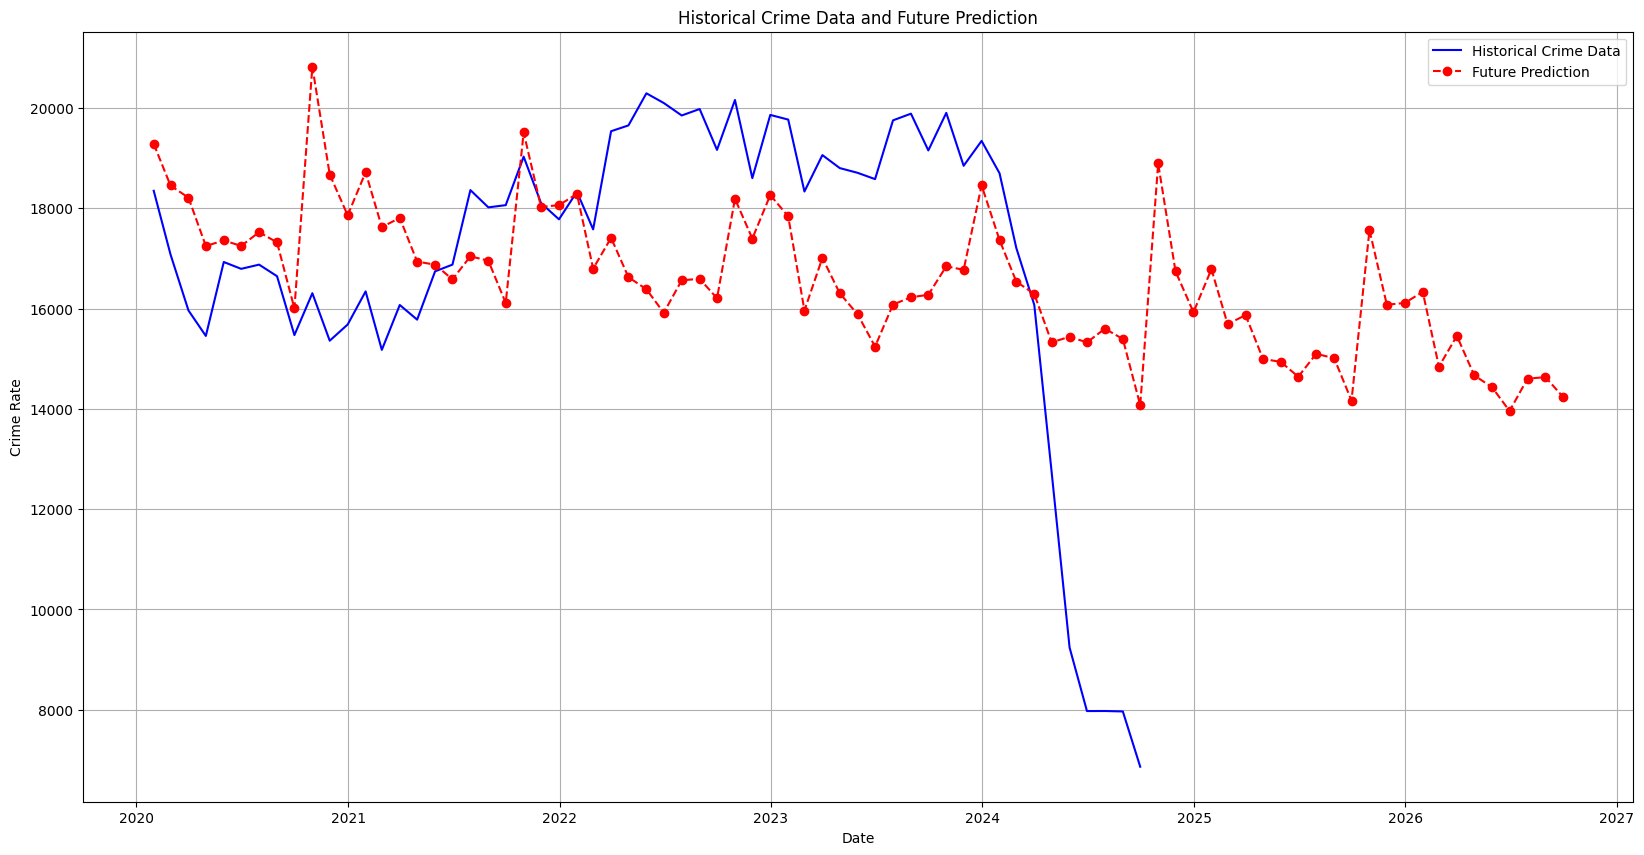

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_time['ds'],df_time['y'],label='Historical Crime Data',color='blue')
plt.plot(forecastnew['ds'],forecastnew['yhat'],label="Future Prediction",color= "red",linestyle='dashed', marker='o')
plt.title('Historical Crime Data and Future Prediction')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.legend()
plt.grid(True)
plt.show()


Interpolation so as not to get a Historical Data plotting better no fcked up

In [ ]:
df_time['y'] = df_time['y'].replace([9241,7974,7975,7966,6864],np.NaN)
df_time['y'] = df_time['y'].interpolate(method='linear')


In [ ]:
df_time

,ds,y
0,2020-01-31,18348.0
1,2020-02-29,17079.0
2,2020-03-31,15962.0
3,2020-04-30,15454.0
4,2020-05-31,16928.0
5,2020-06-30,16792.0
6,2020-07-31,16876.0
7,2020-08-31,16645.0
8,2020-09-30,15471.0
9,2020-10-31,16306.0


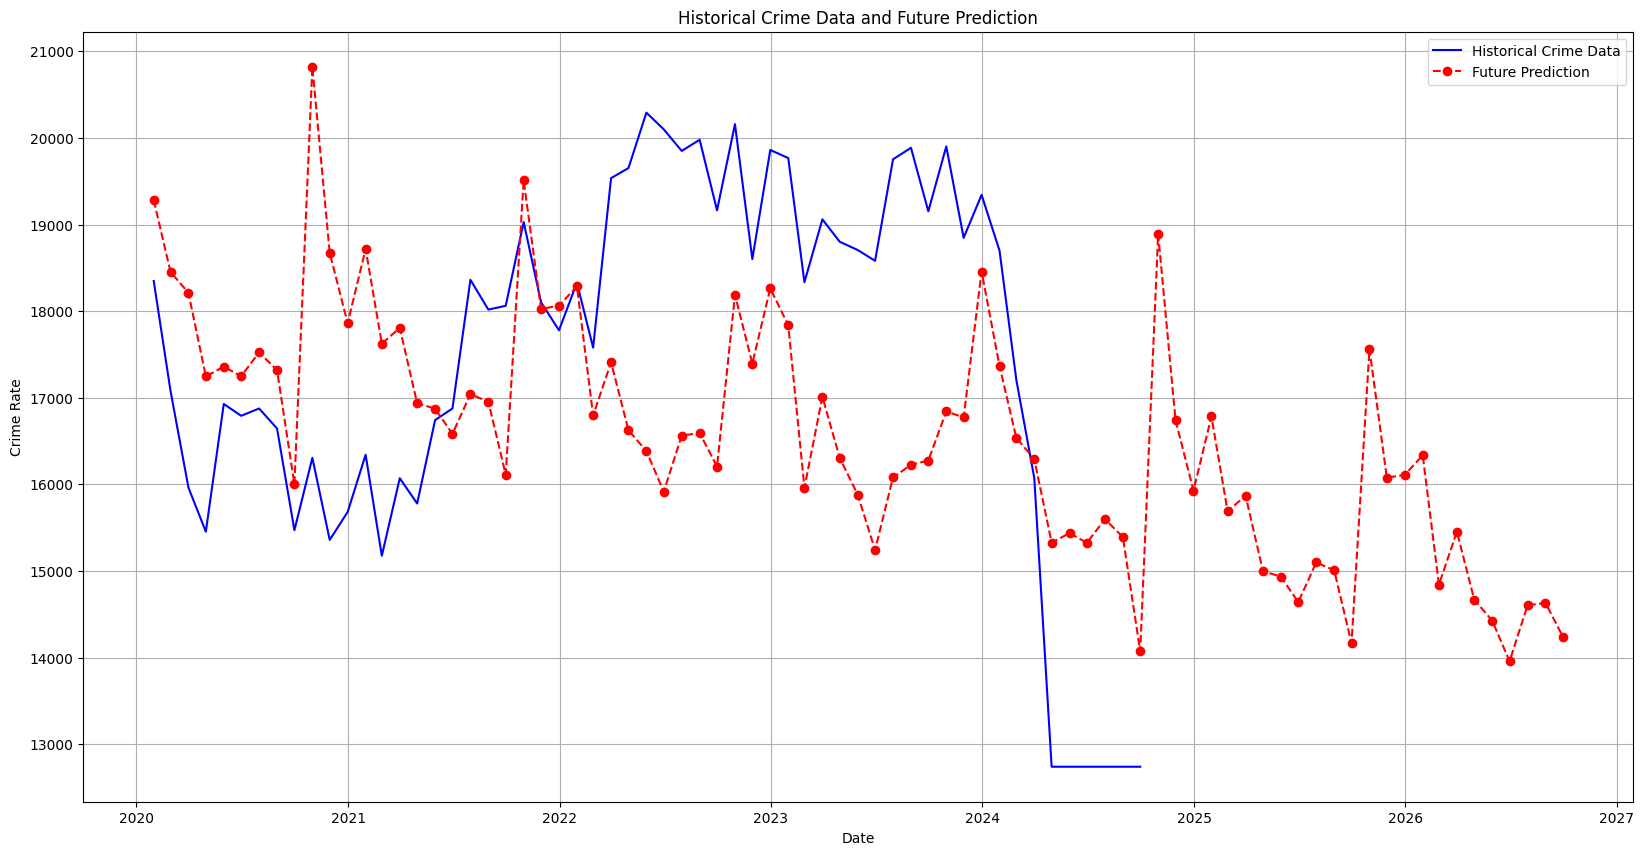

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_time['ds'],df_time['y'],label='Historical Crime Data',color='blue')
plt.plot(forecastnew['ds'],forecastnew['yhat'],label="Future Prediction",color= "red",linestyle='dashed', marker='o')
plt.title('Historical Crime Data and Future Prediction')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.legend()
plt.grid(True)
plt.show()

Smoothing data with the use of a rolling average

In [ ]:
df_time['y_smoothed'] = df_time['y'].rolling(window=3).mean()
df_time['y_smoothed'] = df_time['y_smoothed'].interpolate(method='linear')

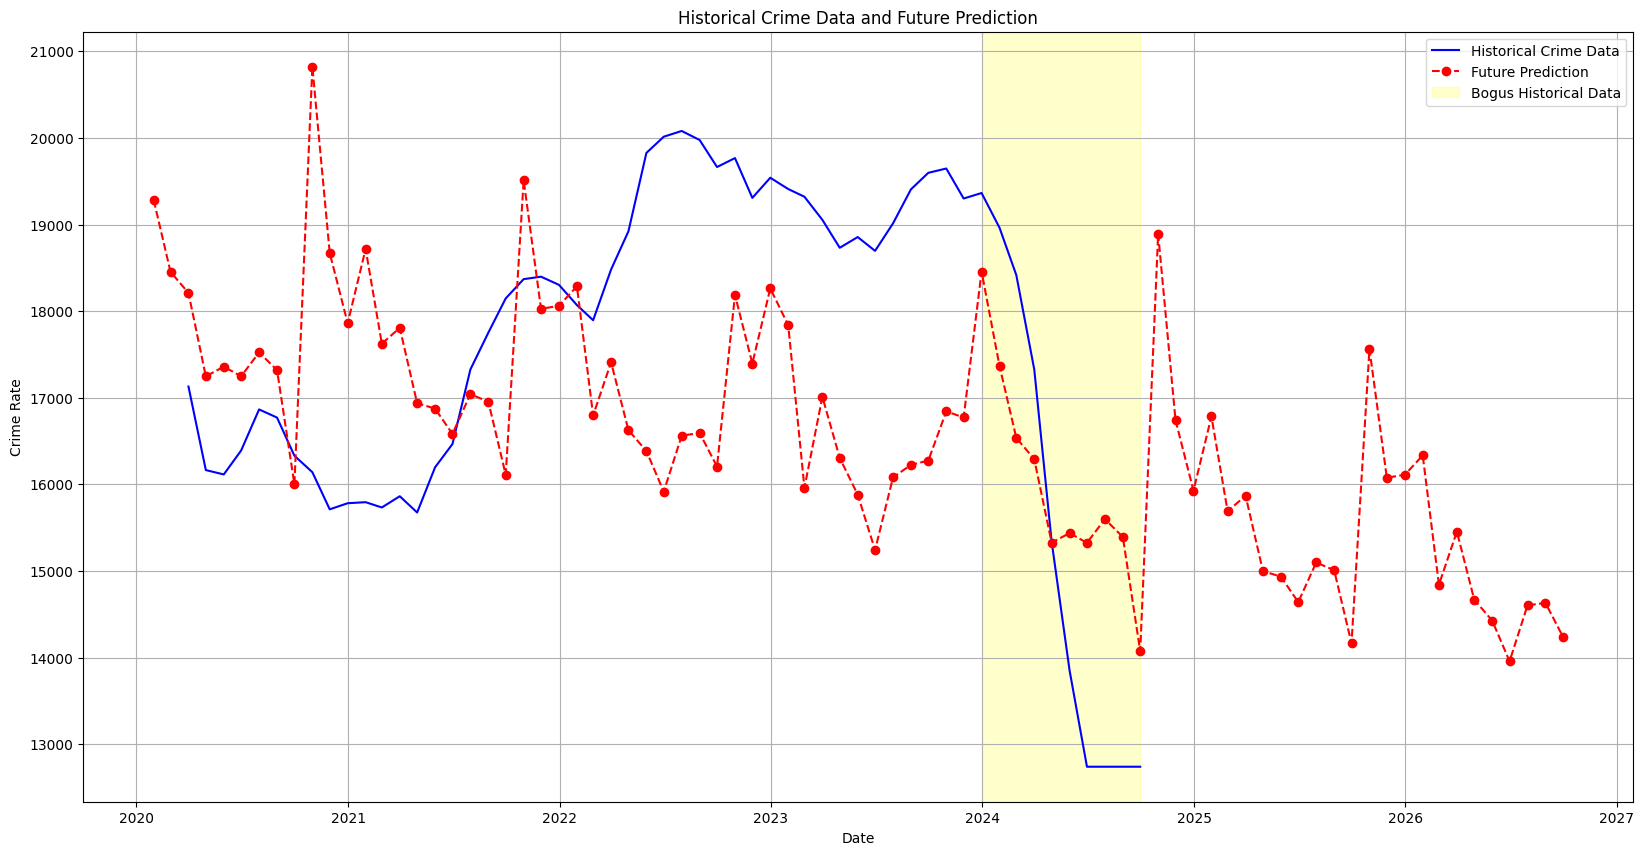

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_time['ds'],df_time['y_smoothed'],label='Historical Crime Data',color='blue')
plt.plot(forecastnew['ds'],forecastnew['yhat'],label="Future Prediction",color= "red",linestyle='dashed', marker='o')
plt.axvspan('2024-01-01','2024-09-30',color='yellow',alpha=0.2,label='Bogus Historical Data')
plt.title('Historical Crime Data and Future Prediction')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_time.head(2)

,ds,y,y_smoothed
0,2020-01-31,18348.0,NaN
1,2020-02-29,17079.0,NaN


In [ ]:
df_time

,ds,y,y_smoothed
0,2020-01-31,18348.0,NaN
1,2020-02-29,17079.0,NaN
2,2020-03-31,15962.0,17129.666667
3,2020-04-30,15454.0,16165.000000
4,2020-05-31,16928.0,16114.666667
5,2020-06-30,16792.0,16391.333333
6,2020-07-31,16876.0,16865.333333
7,2020-08-31,16645.0,16771.000000
8,2020-09-30,15471.0,16330.666667
9,2020-10-31,16306.0,16140.666667


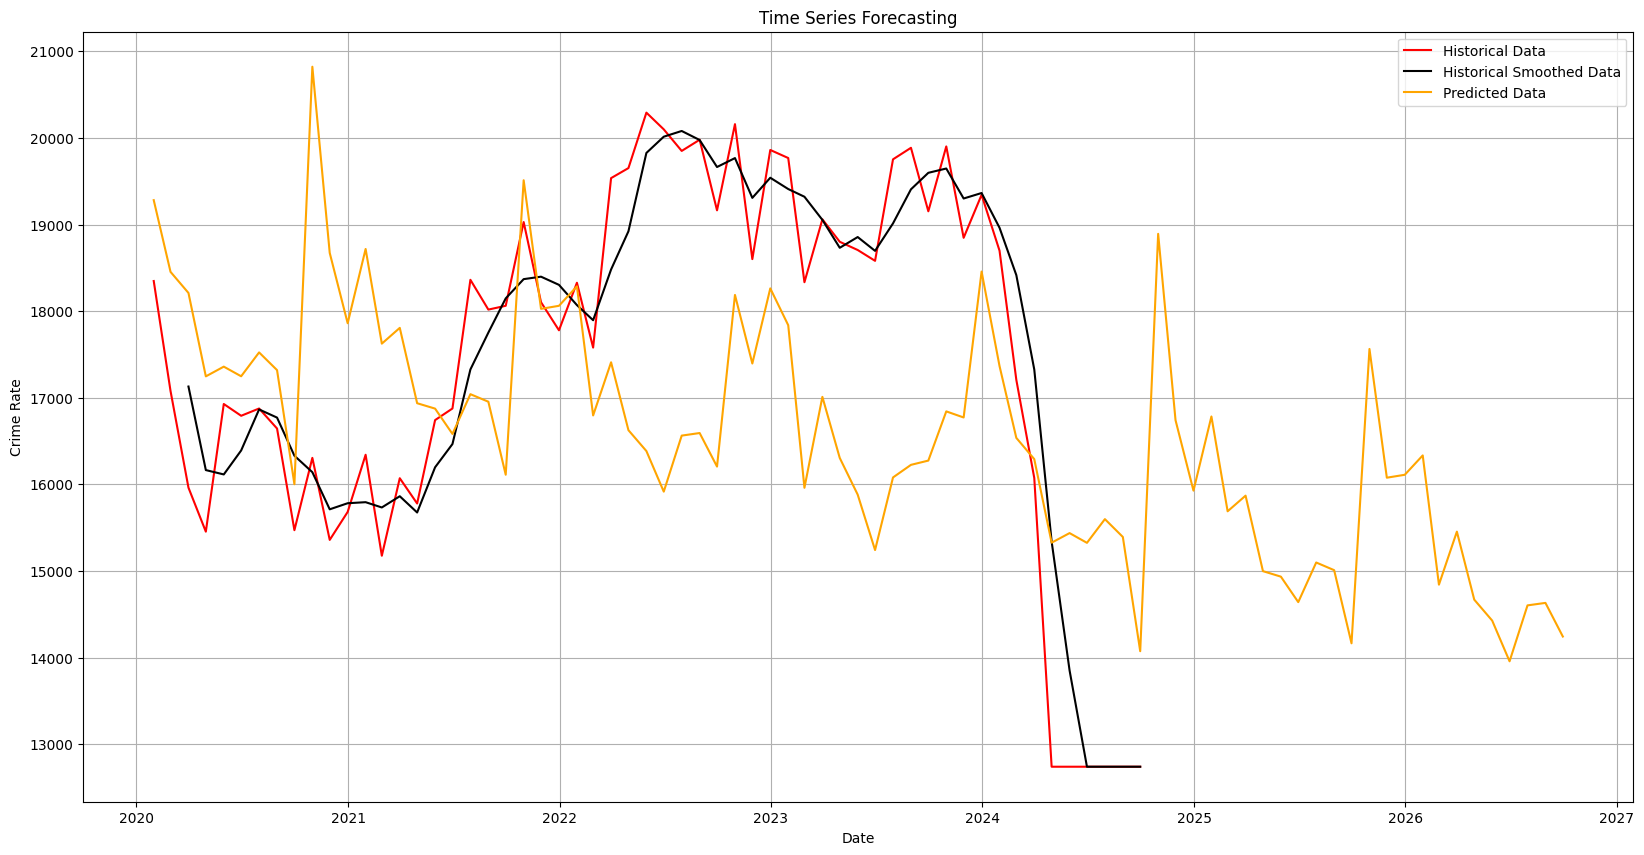

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_time['ds'],df_time['y'],label='Historical Data',color = 'red')
plt.plot(df_time['ds'],df_time['y_smoothed'],label = "Historical Smoothed Data",color="black")
plt.plot(forecastnew['ds'],forecastnew['yhat'],label="Predicted Data",color="orange")
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.legend()
plt.grid(True)
plt.show()

LETS see using a 6 month rolling average window

In [ ]:
df_time['y_newsmooth'] = df_time['y'].rolling(window=6).mean()
df_time['y_newsmooth'] = df_time['y_newsmooth'].interpolate(method='linear')

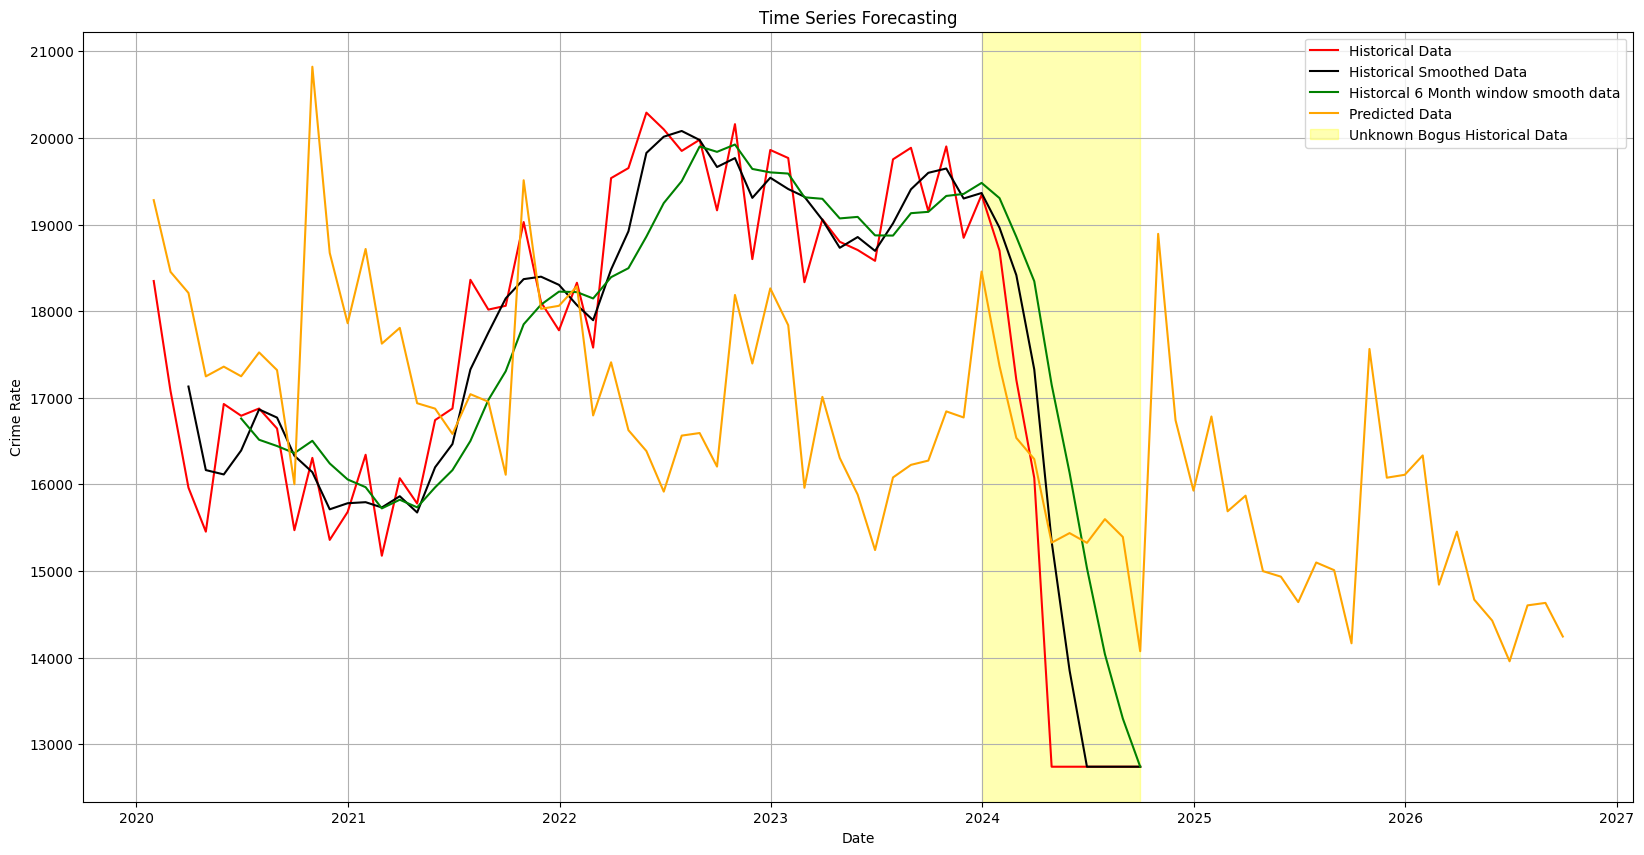

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_time['ds'],df_time['y'],label='Historical Data',color = 'red')
plt.plot(df_time['ds'],df_time['y_smoothed'],label = "Historical Smoothed Data",color="black")
plt.plot(df_time['ds'],df_time['y_newsmooth'],label="Historcal 6 Month window smooth data",color="green")
plt.plot(forecastnew['ds'],forecastnew['yhat'],label="Predicted Data",color="orange")
plt.axvspan('2024-01-01','2024-09-30',color="yellow",alpha=0.3,label="Unknown Bogus Historical Data")
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.legend()
plt.grid(True)
plt.show()

I have used rolling averages of window 3,6 need to use xgbregressor,dt maybe use LSTM

WORK DONE ON MONDAY-17FEB

Feature Engineering Done on df_time to extract better features for xgb rf models

In [ ]:
type(df_time)

pandas.core.frame.DataFrame

In [ ]:
df_time.columns

Index(['ds', 'y', 'y_smoothed', 'y_newsmooth'], dtype='object')

In [ ]:
df_time.dtypes

ds             datetime64[ns]
y                     float64
y_smoothed            float64
y_newsmooth           float64
dtype: object

In [ ]:
df_time['Month'] = df_time['ds'].dt.month
df_time['Day'] = df_time['ds'].dt.day
df_time['Year'] = df_time['ds'].dt.year
df_time['Is Weekend'] = df_time['ds'].dt.weekday.isin([5,6]).astype(int)


In [ ]:
df_time = df_time.rename(columns={'y_smoothed':'3M Average','y_newsmooth':'6M Average'})


In [ ]:
df_time

,ds,y,3M Average,6M Average,Month,Day,Year,Is Weekend
0,2020-01-31,18348.0,NaN,NaN,1,31,2020,0
1,2020-02-29,17079.0,NaN,NaN,2,29,2020,1
2,2020-03-31,15962.0,17129.666667,NaN,3,31,2020,0
3,2020-04-30,15454.0,16165.000000,NaN,4,30,2020,0
4,2020-05-31,16928.0,16114.666667,NaN,5,31,2020,1
5,2020-06-30,16792.0,16391.333333,16760.500000,6,30,2020,0
6,2020-07-31,16876.0,16865.333333,16515.166667,7,31,2020,0
7,2020-08-31,16645.0,16771.000000,16442.833333,8,31,2020,0
8,2020-09-30,15471.0,16330.666667,16361.000000,9,30,2020,0
9,2020-10-31,16306.0,16140.666667,16503.000000,10,31,2020,1


In [ ]:
df_time['12M Average'] = df_time['y'].rolling(window=12).mean()
df_time['12M Average'] = df_time['12M Average'].interpolate(method='linear')


In [ ]:
df_time.head(5)

,ds,y,3M Average,6M Average,Month,Day,Year,Is Weekend,12M Average
0,2020-01-31,18348.0,NaN,NaN,1,31,2020,0,NaN
1,2020-02-29,17079.0,NaN,NaN,2,29,2020,1,NaN
2,2020-03-31,15962.0,17129.666667,NaN,3,31,2020,0,NaN
3,2020-04-30,15454.0,16165.000000,NaN,4,30,2020,0,NaN
4,2020-05-31,16928.0,16114.666667,NaN,5,31,2020,1,NaN


In [ ]:
df1.iloc[0]

DR_NO                     190326475.0
Date Rptd         2020-03-01 00:00:00
DATE OCC          2020-03-01 00:00:00
TIME OCC                       2130.0
AREA                              7.0
                         ...         
Status_JA                       False
Status_JO                       False
Status_Unknown                  False
Year                             2020
Month                               3
Name: 0, Length: 192, dtype: object

In [ ]:
df_time['Quarter'] = df_time['ds'].dt.quarter
df_time['WeekOfYear'] = df_time['ds'].dt.isocalendar().week
df_time['Is Holiday'] = df_time['ds'].isin(['2020-01-01', '2020-07-04']).astype(int)

/var/folders/89/hlf99zq566v5gtf30kyt2gp40000gn/T/ipykernel_10533/3215717137.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_time['Is Holiday'] = df_time['ds'].isin(['2020-01-01', '2020-07-04']).astype(int)


In [ ]:
df_time['LAG1'] = df_time['y'].shift(1)
df_time['LAG2'] = df_time['y'].shift(2)
df_time['LAG3'] = df_time['y'].shift(3)

In [ ]:
df_time['Crime_Change'] = df_time['y'].diff()

In [ ]:
df_time['7D_MA'] = df_time['y'].rolling(window=7, min_periods=1).mean()
df_time['Rolling_Min'] = df_time['y'].rolling(window=7, min_periods=1).min()
df_time['Rolling_Max'] = df_time['y'].rolling(window=7, min_periods=1).max()

In [ ]:
df_time['sin_month'] = np.sin(2 * np.pi * df_time['Month'] / 12)
df_time['cos_month'] = np.cos(2 * np.pi * df_time['Month'] / 12)

In [ ]:
dfcelebration = df_time.copy()
dfcelebration.shape

(57, 21)

In [ ]:
df_time.dropna(inplace=True)

In [ ]:
df_time.shape

(46, 21)

In [ ]:
X = df_time.drop(columns=['ds','y'])
y = df_time['y']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Random Forest regressor is a go!!

In [ ]:
rfmodel = RandomForestRegressor(n_estimators=50,random_state=42)
rfmodel.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
ypredrf = rfmodel.predict(X_test)

In [ ]:
print("Random Forest Results:")
# print("RMSE:", root_mean_squared_error(y_test, ypredrf, squared=False))
print("MAE:", mean_absolute_error(y_test, ypredrf))
print("R² Score:", r2_score(y_test, ypredrf))

Random Forest Results:
MAE: 580.1780000000005
R² Score: 0.8786132363543806


Lets try the Xgboost

In [ ]:
xgb1 = XGBRegressor(objective='reg:squarederror',n_estimators=100,random_state=42)
xgb1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_predxgb = xgb1.predict(X_test)

In [ ]:
print("XGBoost Results: ")
print("Accuracy: ", xgb1.score(X_test, y_test))
print("RMSE: ",mean_squared_error(y_test,y_predxgb,squared=False))
print("MAE:", mean_absolute_error(y_test, y_predxgb))
print("R² Score:", r2_score(y_test, y_predxgb))


XGBoost Results: 
Accuracy:  0.7920300736396739
RMSE:  1045.1141095863663
MAE: 580.09921875
R² Score: 0.7920300736396739


Hyperparameter Tuning

In [ ]:
def plot_importances(model,model_name):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.xticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx], rotation=90)
    print(np.array(X_train.columns)[sorted_idx])
    plt.title(f"Feature Importance ({model_name})")
    plt.show()

    

In [ ]:
tree_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_search = RandomizedSearchCV(rfmodel, tree_params, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
tree_search.fit(X_train, y_train)
best_rf = tree_search.best_estimator_

In [ ]:
print(best_rf)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)


In [ ]:
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_search = RandomizedSearchCV(xgb1, xgb_params, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

In [ ]:
print(best_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


ReTrain the models

In [ ]:
rffinal = RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42,n_jobs=-1)
rf_final = rffinal.fit(X_train, y_train)

In [ ]:
y_predrffinal = rf_final.predict(X_test)

In [ ]:
print("Random Forest Results:")
print("RMSE:", mean_squared_error(y_test, y_predrffinal, squared=False))
print("MAE:", mean_absolute_error(y_test, y_predrffinal))
print("R² Score:", r2_score(y_test, y_predrffinal))

Random Forest Results:
RMSE: 870.902515008387
MAE: 717.6371279456638
R² Score: 0.8555850329444408


In [ ]:
xgbfinal = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42)

xgbfinal1 = xgbfinal.fit(X_train,y_train)

In [ ]:
y_xgbfinal = xgbfinal1.predict(X_test)

In [ ]:
print("XGB Hyperparameter Tuned:")
print("RMSE:", mean_squared_error(y_test, y_xgbfinal, squared=False))
print("MAE:", mean_absolute_error(y_test, y_xgbfinal))
print("R² Score:", r2_score(y_test, y_xgbfinal))

XGB Hyperparameter Tuned:
RMSE: 808.4645919066505
MAE: 464.54736328125
R² Score: 0.8755499360671912


['LAG1' '3M Average' '6M Average' 'Year' 'Day' 'Rolling_Min'
 'Crime_Change' 'Is Weekend' 'Quarter' 'LAG2' 'Month' 'sin_month'
 'WeekOfYear' '12M Average' '7D_MA' 'cos_month' 'LAG3' 'Rolling_Max'
 'Is Holiday']


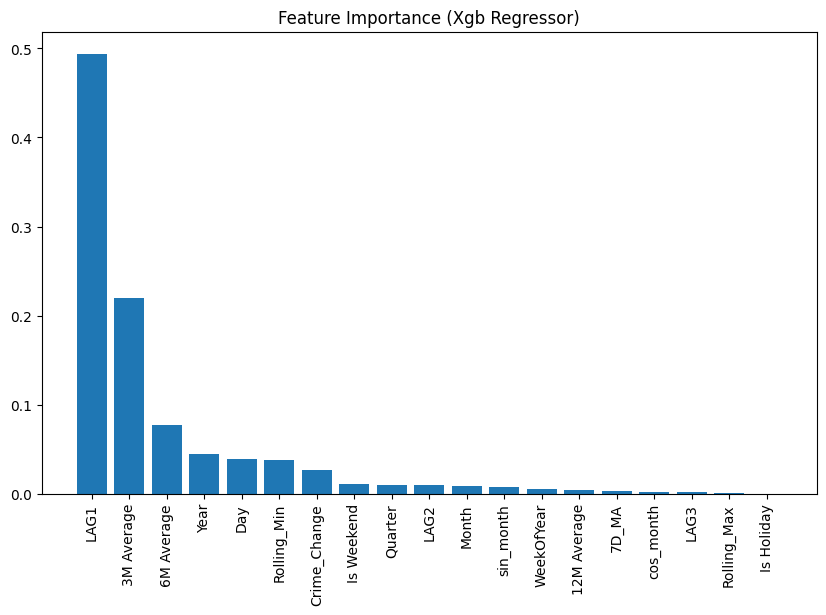

In [ ]:
plot_importances(xgbfinal1,"Xgb Regressor")

['3M Average' 'LAG1' 'Rolling_Min' '6M Average' 'LAG2' '7D_MA' 'LAG3'
 'Crime_Change' 'Rolling_Max' 'Year' '12M Average' 'WeekOfYear'
 'cos_month' 'Day' 'sin_month' 'Month' 'Quarter' 'Is Weekend' 'Is Holiday']


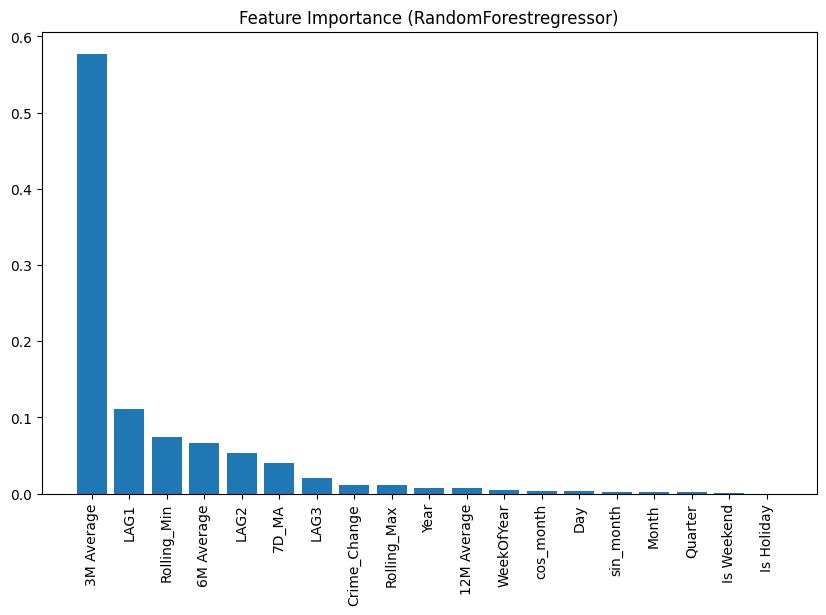

In [ ]:
plot_importances(rf_final,"RandomForestregressor")

In [ ]:
top_features = ['LAG1', '3M Average', '6M Average', 'Rolling_Min', 'LAG2', 'Year', 'Crime_Change']

In [ ]:
X_selected = X[top_features]

Using Top Features only to train

In [ ]:
rftp = RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42, n_jobs=-1)

rftp1 = rftp.fit(X_selected,y)

In [ ]:
xgtb = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42)
xgtb1 = xgtb.fit(X_selected,y)

In [ ]:
def evaluate_model(model,X_test,y_test):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    r2 = r2_score(y_test, preds)
    return rmse, mae, r2

In [ ]:
rftpresults = evaluate_model(rftp1,X_test[top_features],y_test)
xgtbresults = evaluate_model(xgtb1,X_test[top_features],y_test)

In [ ]:
print("Random Forest (Top Features) - RMSE:", rftpresults[0], "MAE:", 
      rftpresults[1], "R² Score:", rftpresults[2])

Random Forest (Top Features) - RMSE: 303.0026862374677 MAE: 212.64757176226468 R² Score: 0.982519008022633


In [ ]:
print("XGB Regressor (Top Features) - RMSE:", xgtbresults[0], 
"MAE:", xgtbresults[1], "R² Score:", xgtbresults[2])

XGB Regressor (Top Features) - RMSE: 26.91922667191807 MAE: 22.03994140625 R² Score: 0.9998620256759926


Special mention to XGBRegressor

FEATURE ENGINEERING REFINEMENT

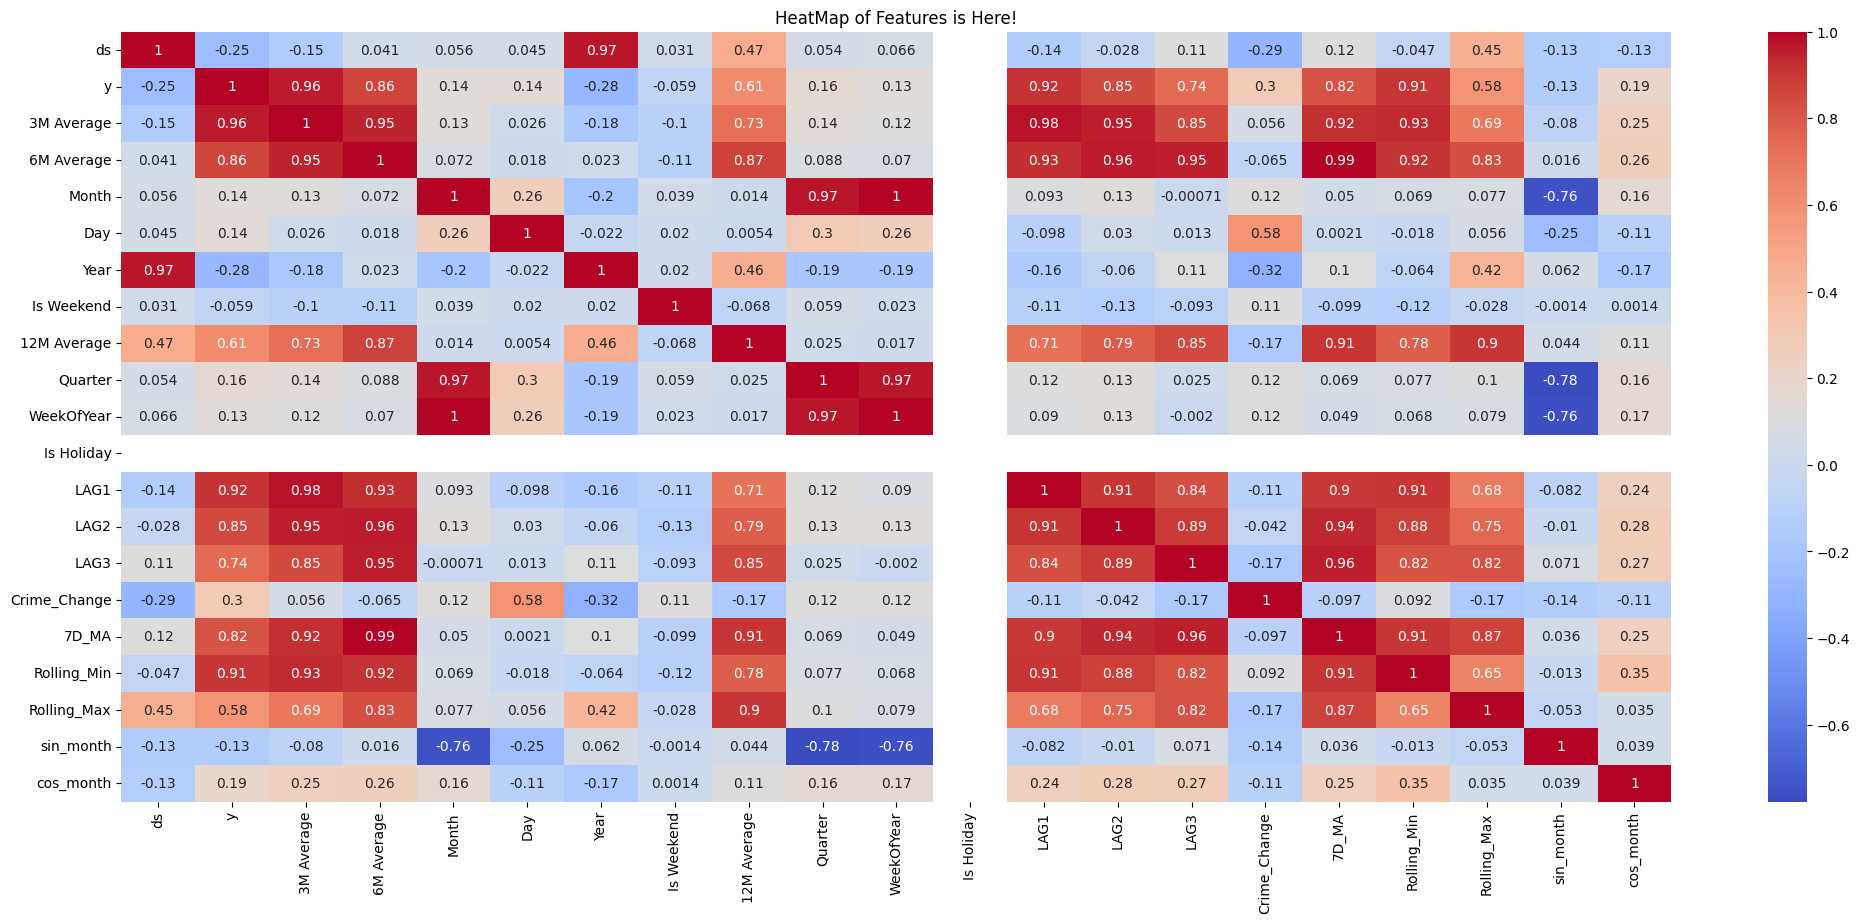

In [ ]:
corrmatrix = df_time.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corrmatrix,annot=True,cmap='coolwarm')
plt.title('HeatMap of Features is Here!')
plt.show()

Features with correlation above 0.85 will be refined as per requirements

In [ ]:
type(corrmatrix)

pandas.core.frame.DataFrame

In [ ]:
corrmatrix

,ds,y,3M Average,6M Average,Month,Day,Year,Is Weekend,12M Average,Quarter,...,Is Holiday,LAG1,LAG2,LAG3,Crime_Change,7D_MA,Rolling_Min,Rolling_Max,sin_month,cos_month
ds,1.000000,-0.250456,-0.147305,0.041374,0.055736,0.044692,0.967486,0.030997,0.470204,0.054284,...,NaN,-0.136907,-0.027965,0.111556,-0.294834,0.118708,-0.047286,0.451602,-0.132660,-0.131251
y,-0.250456,1.000000,0.960599,0.863213,0.138617,0.139590,-0.280699,-0.058886,0.613614,0.163424,...,NaN,0.916043,0.853629,0.738645,0.297988,0.824428,0.907258,0.582673,-0.133360,0.190228
3M Average,-0.147305,0.960599,1.000000,0.950541,0.125740,0.026368,-0.176100,-0.101954,0.729113,0.142561,...,NaN,0.976802,0.952535,0.852951,0.055740,0.921078,0.931117,0.693546,-0.079970,0.246682
6M Average,0.041374,0.863213,0.950541,1.000000,0.071504,0.017769,0.022823,-0.110350,0.868592,0.088222,...,NaN,0.926068,0.962781,0.952845,-0.064852,0.994576,0.916381,0.834618,0.015713,0.261064
Month,0.055736,0.138617,0.125740,0.071504,1.000000,0.257944,-0.198603,0.038973,0.013945,0.970831,...,NaN,0.093060,0.131587,-0.000711,0.122033,0.049806,0.069083,0.077041,-0.756180,0.162979
Day,0.044692,0.139590,0.026368,0.017769,0.257944,1.000000,-0.022364,0.020357,0.005401,0.295717,...,NaN,-0.097749,0.029899,0.013203,0.578572,0.002061,-0.017770,0.056171,-0.250597,-0.107060
Year,0.967486,-0.280699,-0.176100,0.022823,-0.198603,-0.022364,1.000000,0.020487,0.458403,-0.192734,...,NaN,-0.157553,-0.060448,0.109906,-0.320644,0.104235,-0.063618,0.424080,0.061617,-0.170822
Is Weekend,0.030997,-0.058886,-0.101954,-0.110350,0.038973,0.020357,0.020487,1.000000,-0.068364,0.059348,...,NaN,-0.108686,-0.130423,-0.093123,0.112744,-0.098762,-0.116099,-0.028330,-0.001369,0.001369
12M Average,0.470204,0.613614,0.729113,0.868592,0.013945,0.005401,0.458403,-0.068364,1.000000,0.025410,...,NaN,0.711487,0.790599,0.852098,-0.172699,0.907969,0.778254,0.904767,0.044216,0.112363
Quarter,0.054284,0.163424,0.142561,0.088222,0.970831,0.295717,-0.192734,0.059348,0.025410,1.000000,...,NaN,0.119068,0.127999,0.025003,0.121610,0.069090,0.077286,0.103020,-0.777868,0.164504


In [ ]:
corrmatrix['y'].iloc[0]

-0.2504560491742708

In [ ]:
columns = [col for col in corrmatrix.columns]
print(columns)

['ds', 'y', '3M Average', '6M Average', 'Month', 'Day', 'Year', 'Is Weekend', '12M Average', 'Quarter', 'WeekOfYear', 'Is Holiday', 'LAG1', 'LAG2', 'LAG3', 'Crime_Change', '7D_MA', 'Rolling_Min', 'Rolling_Max', 'sin_month', 'cos_month']


In [ ]:
for col in columns:
    (corrmatrix[col] >= 0.75).any()
    print(col)

ds
y
3M Average
6M Average
Month
Day
Year
Is Weekend
12M Average
Quarter
WeekOfYear
Is Holiday
LAG1
LAG2
LAG3
Crime_Change
7D_MA
Rolling_Min
Rolling_Max
sin_month
cos_month


Lets Test?

In [ ]:
import pickle


model_filename = "xgboost_model.pkl"

# Save the model
with open(model_filename, "wb") as file:
    pickle.dump(xgbfinal1, file)

print(f"Model saved as {model_filename}")


Model saved as xgboost_model.pkl


In [ ]:
with open("xgboost_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

Check this out man

In [ ]:
df_time.isna().sum()

ds              0
y               0
3M Average      0
6M Average      0
Month           0
Day             0
Year            0
Is Weekend      0
12M Average     0
Quarter         0
WeekOfYear      0
Is Holiday      0
LAG1            0
LAG2            0
LAG3            0
Crime_Change    0
7D_MA           0
Rolling_Min     0
Rolling_Max     0
sin_month       0
cos_month       0
dtype: int64

In [ ]:
print("hello")

hello


In [ ]:
app = Flask(__name__)
model = joblib.load("xgboost_model.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        input_data = pd.DataFrame([data])
        feature_top = ['LAG1', '3M Average', '6M Average', 'Year', 'Day',
                       'Rolling_Min', 'Crime_Change', 'Is Weekend', 'Quarter',
                       'LAG2', 'Month', 'sin_month', 'WeekOfYear', '12M Average',
                       '7D_MA', 'cos_month', 'LAG3', 'Rolling_Max', 'Is Holiday']

        input_data = input_data[feature_top]

    
        prediction = model.predict(input_data)
        return jsonify({'crime_rate_predictions': prediction.tolist()})

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == "__main__":
    from waitress import serve
    serve(app, host="0.0.0.0", port=5000)

Implementing a enepmoyment dataset along with a df_time to better understand crime trends

In [ ]:
dfgg = pd.read_csv('New 2020-2024.csv')
dfgg.head(2)

,observation_date,CALOSA7URN
0,2021-01-01,11.0
1,2021-02-01,10.5


In [ ]:
dfgg['observation_date'] = pd.to_datetime(dfgg['observation_date'],errors='coerce')

In [ ]:
dfgg.dtypes

observation_date    datetime64[ns]
CALOSA7URN                 float64
dtype: object

In [ ]:
dfgg = dfgg.rename(columns={'observation_date': 'ds'})


In [ ]:
dfgg.columns

Index(['ds', 'CALOSA7URN'], dtype='object')

In [ ]:
df_time = df_time.merge(dfgg,on='ds',how='left')

In [ ]:
dfgg1 = dfgg.copy()

In [ ]:
dfgg['ds'] = dfgg['ds'] - pd.DateOffset(months=1)

In [ ]:
df_time['ds'].head(2)

0   2020-12-31
1   2021-01-31
Name: ds, dtype: datetime64[ns]

In [ ]:
dfgg['ds'] = dfgg['ds'] + pd.offsets.MonthEnd(0)

In [ ]:
dfgg['ds'].head(2)

0   2020-12-31
1   2021-01-31
Name: ds, dtype: datetime64[ns]

In [ ]:
df_time.columns

Index(['ds', 'y', '3M Average', '6M Average', 'Month', 'Day', 'Year',
       'Is Weekend', '12M Average', 'Quarter', 'WeekOfYear', 'Is Holiday',
       'LAG1', 'LAG2', 'LAG3', 'Crime_Change', '7D_MA', 'Rolling_Min',
       'Rolling_Max', 'sin_month', 'cos_month', 'CALOSA7URN_x',
       'CALOSA7URN_y'],
      dtype='object')

In [ ]:
df_time.drop(columns = ['CALOSA7URN_x','CALOSA7URN_y'],inplace=True)

In [ ]:
df_time.head(2)

,ds,y,3M Average,6M Average,Month,Day,Year,Is Weekend,12M Average,Quarter,...,Is Holiday,LAG1,LAG2,LAG3,Crime_Change,7D_MA,Rolling_Min,Rolling_Max,sin_month,cos_month
0,2020-12-31,15682.0,15782.333333,16056.5,12,31,2020,0,16408.500000,4,...,0,15359.0,16306.0,15471.0,323.0,16161.571429,15359.0,16876.0,-2.449294e-16,1.000000
1,2021-01-31,16342.0,15794.333333,15967.5,1,31,2021,1,16241.333333,1,...,0,15682.0,15359.0,16306.0,660.0,16097.285714,15359.0,16876.0,5.000000e-01,0.866025


In [ ]:
df_time = df_time.merge(dfgg,on='ds',how='left')

In [ ]:
df_time.head(2)

,ds,y,3M Average,6M Average,Month,Day,Year,Is Weekend,12M Average,Quarter,...,LAG1,LAG2,LAG3,Crime_Change,7D_MA,Rolling_Min,Rolling_Max,sin_month,cos_month,CALOSA7URN
0,2020-12-31,15682.0,15782.333333,16056.5,12,31,2020,0,16408.500000,4,...,15359.0,16306.0,15471.0,323.0,16161.571429,15359.0,16876.0,-2.449294e-16,1.000000,11.0
1,2021-01-31,16342.0,15794.333333,15967.5,1,31,2021,1,16241.333333,1,...,15682.0,15359.0,16306.0,660.0,16097.285714,15359.0,16876.0,5.000000e-01,0.866025,10.5


In [ ]:
df_time.columns

Index(['ds', 'y', '3M Average', '6M Average', 'Month', 'Day', 'Year',
       'Is Weekend', '12M Average', 'Quarter', 'WeekOfYear', 'Is Holiday',
       'LAG1', 'LAG2', 'LAG3', 'Crime_Change', '7D_MA', 'Rolling_Min',
       'Rolling_Max', 'sin_month', 'cos_month', 'CALOSA7URN'],
      dtype='object')

In [ ]:
df_time = df_time.rename(columns={'CALOSA7URN':'Unemployment Rate'})

WE have succesufully merged the unemployment dataset with this lets do something with it


In [ ]:
df_time['Unemployment Rate'] = df_time['Unemployment Rate'].ffill()
df_time['Unemployment Rate'] = df_time['Unemployment Rate'].bfill()
df_time.isna().sum()

ds                   0
y                    0
3M Average           0
6M Average           0
Month                0
Day                  0
Year                 0
Is Weekend           0
12M Average          0
Quarter              0
WeekOfYear           0
Is Holiday           0
LAG1                 0
LAG2                 0
LAG3                 0
Crime_Change         0
7D_MA                0
Rolling_Min          0
Rolling_Max          0
sin_month            0
cos_month            0
Unemployment Rate    0
dtype: int64

Fit Train and test

In [ ]:
X1 = df_time.drop(columns=['ds','y'])
y1 = df_time['y']

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [ ]:
model1 = RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                               n_estimators=200, random_state=42,n_jobs=-1)
model1final = model1.fit(X1_train,y1_train)

In [ ]:
model1final = model1.predict(X1_test)

In [ ]:
print("Random Forest Results:")
print("RMSE:", mean_squared_error(y1_test,model1final, squared=False))
print("MAE:", mean_absolute_error(y1_test,model1final))
print("R² Score:", r2_score(y1_test,model1final))

Random Forest Results:
RMSE: 867.2500148830621
MAE: 709.4611185841923
R² Score: 0.8567938240074523


In [ ]:
tree_params1 = {
    'n_estimators' : [50,100,200,300],
    'max_depth' : [5,10,15,20],
    'min_samples_split' : [2,5,10,15],
    'min_samples_leaf' : [1,2,3,4]
}

treehelp = RandomizedSearchCV(model1,tree_params1,n_iter=10,cv=3,scoring='r2',n_jobs=-1,random_state=42)
treehelp.fit(X1_train,y1_train)
besthelptree = treehelp.best_estimator_

In [ ]:
print(besthelptree)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)


In [ ]:
model2 = RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,n_estimators=300, n_jobs=-1, random_state=42)
model2.fit(X1_train,y1_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
model2final = model2.predict(X1_test)

In [ ]:
print("Random Forest Results after Tuning:")
print("RMSE:", mean_squared_error(y1_test,model2final, squared=False))
print("MAE:", mean_absolute_error(y1_test,model2final))
print("R² Score:", r2_score(y1_test,model2final))

Random Forest Results after Tuning:
RMSE: 1012.8931101449635
MAE: 856.3676929052435
R² Score: 0.8046558768920199


Random Forest Regressor, Now XGB Regressors turn

In [ ]:
model3 = XGBRegressor()
model3.fit(X1_train, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model3final = model3.predict(X1_test)

In [ ]:
print("Xgb Regressor results without tuning:")
print("RMSE:", mean_squared_error(y1_test,model3final, squared=False))
print("MAE:", mean_absolute_error(y1_test,model3final))
print("R² Score:", r2_score(y1_test,model3final))

Xgb Regressor results without tuning:
RMSE: 1045.7782666095268
MAE: 582.3318359375
R² Score: 0.791765665046982


In [ ]:
xgb_params1 = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgbhelp = RandomizedSearchCV(model3,xgb_params1,n_iter=10,cv=5,scoring='r2',random_state=42,n_jobs=-1)
xgbhelp.fit(X1_train, y1_train)
xgb_best1 = xgbhelp.best_estimator_

In [ ]:
print(xgb_best1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
model4 = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None)
model4.fit(X1_train, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model4final = model4.predict(X1_test)

In [ ]:
print("Xgb Regressor results after tuning:")
print("RMSE:", mean_squared_error(y1_test,model4final, squared=False))
print("MAE:", mean_absolute_error(y1_test,model4final))
print("R² Score:", r2_score(y1_test,model4final))

Xgb Regressor results after tuning:
RMSE: 1060.8422753983562
MAE: 592.28203125
R² Score: 0.7857233969487125


Lets check correlation between the features and compare unemployment rate with y

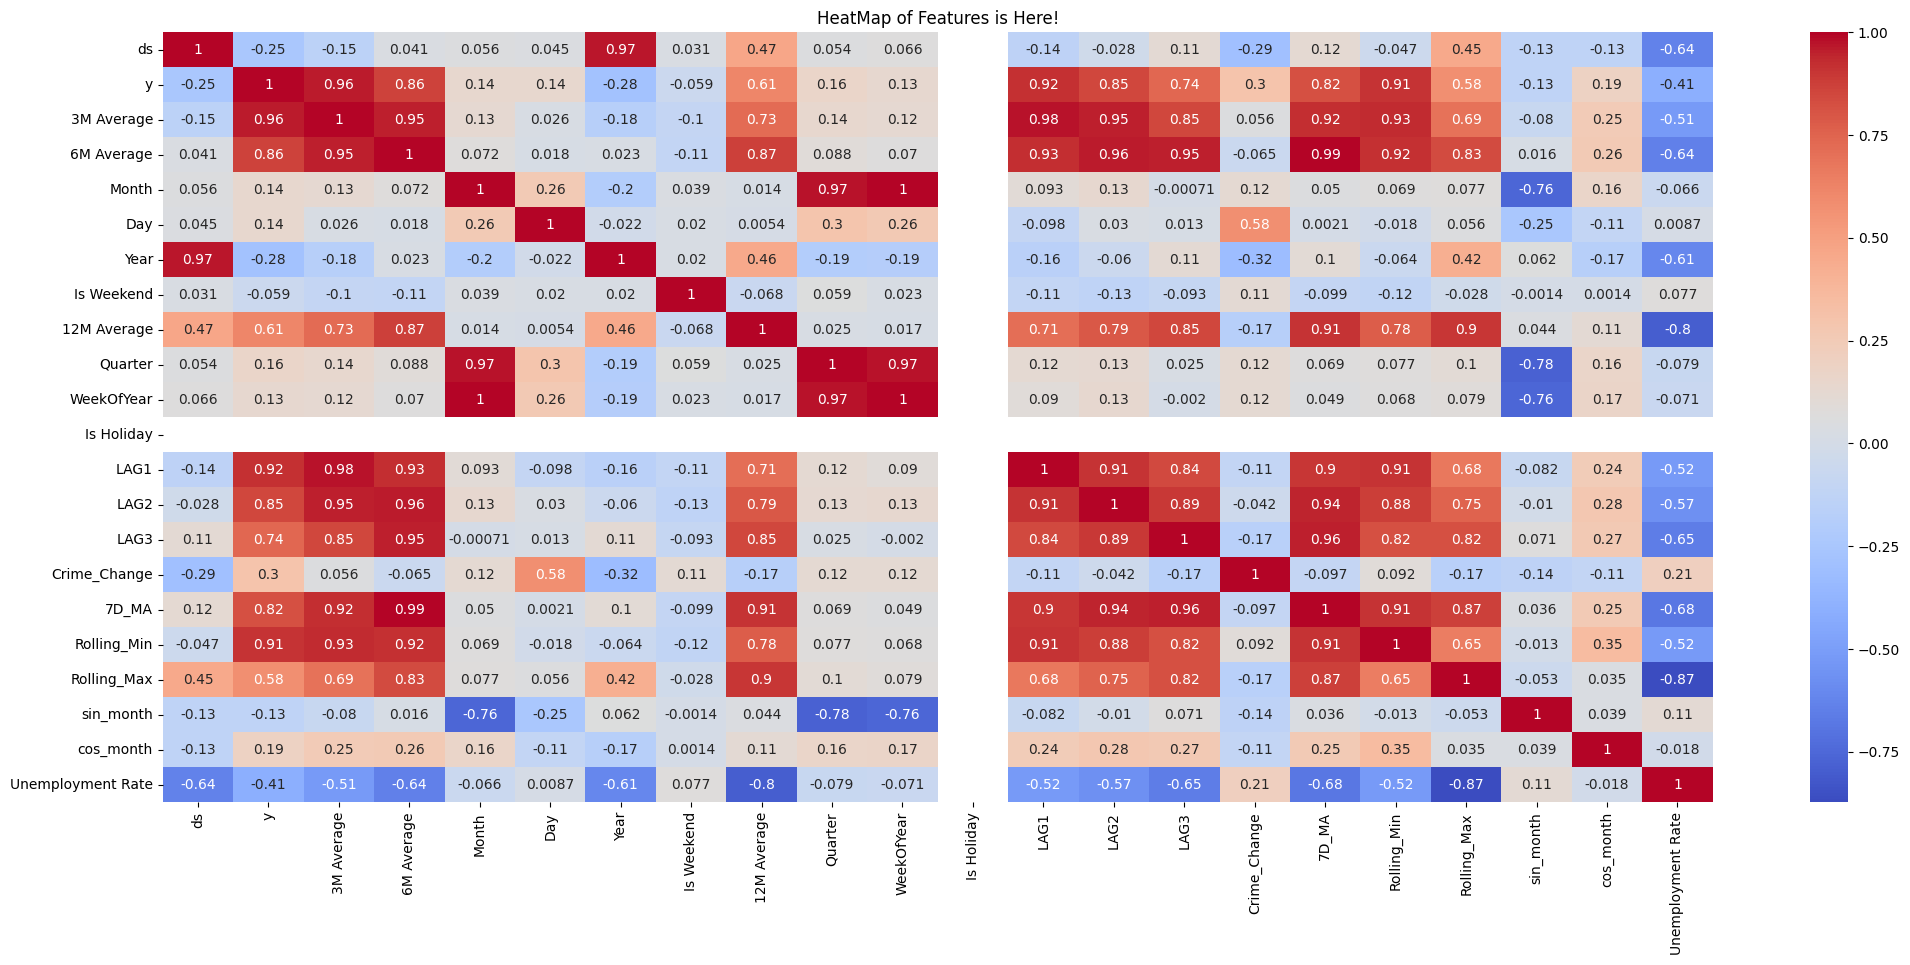

In [ ]:
corrmatrixnew = df_time.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corrmatrixnew,annot=True,cmap='coolwarm')
plt.title('HeatMap of Features is Here!')
plt.show()


The Unemployment rate parameter doesnt help the model accuracy so we picot to removing the lags for the unemploymnet rate

In [ ]:
df_time.columns

Index(['ds', 'y', '3M Average', '6M Average', 'Month', 'Day', 'Year',
       'Is Weekend', '12M Average', 'Quarter', 'WeekOfYear', 'Is Holiday',
       'LAG1', 'LAG2', 'LAG3', 'Crime_Change', '7D_MA', 'Rolling_Min',
       'Rolling_Max', 'sin_month', 'cos_month', 'Unemployment Rate'],
      dtype='object')

In [ ]:
def plot_importances11(model,model_name):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.xticks(range(len(sorted_idx)), np.array(X1_train.columns)[sorted_idx], rotation=90)
    print(np.array(X1_train.columns)[sorted_idx])
    plt.title(f"Feature Importance ({model_name})")
    plt.show()

['3M Average' 'Month' 'Day' 'Crime_Change' '12M Average' 'LAG3'
 'Is Weekend' 'Year' 'cos_month' 'WeekOfYear' 'LAG2' '6M Average'
 'Rolling_Min' 'Rolling_Max' 'LAG1' 'Unemployment Rate' 'sin_month'
 '7D_MA' 'Quarter' 'Is Holiday']


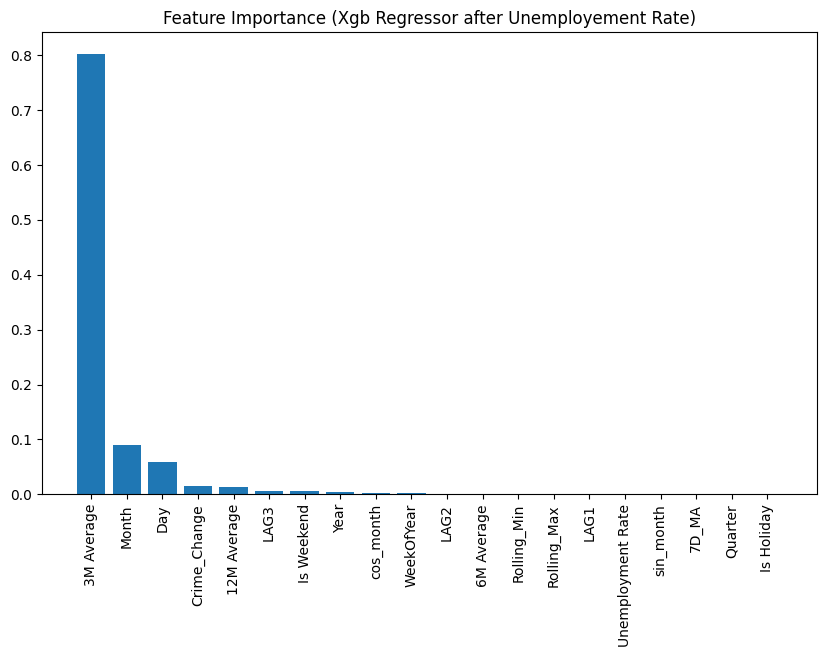

In [ ]:
plot_importances11(model4,"Xgb Regressor after Unemployement Rate")

['3M Average' 'LAG1' '6M Average' 'Rolling_Min' 'LAG2' '7D_MA'
 'Crime_Change' '12M Average' 'LAG3' 'Unemployment Rate' 'Rolling_Max'
 'Year' 'WeekOfYear' 'cos_month' 'Day' 'Quarter' 'Month' 'sin_month'
 'Is Weekend' 'Is Holiday']


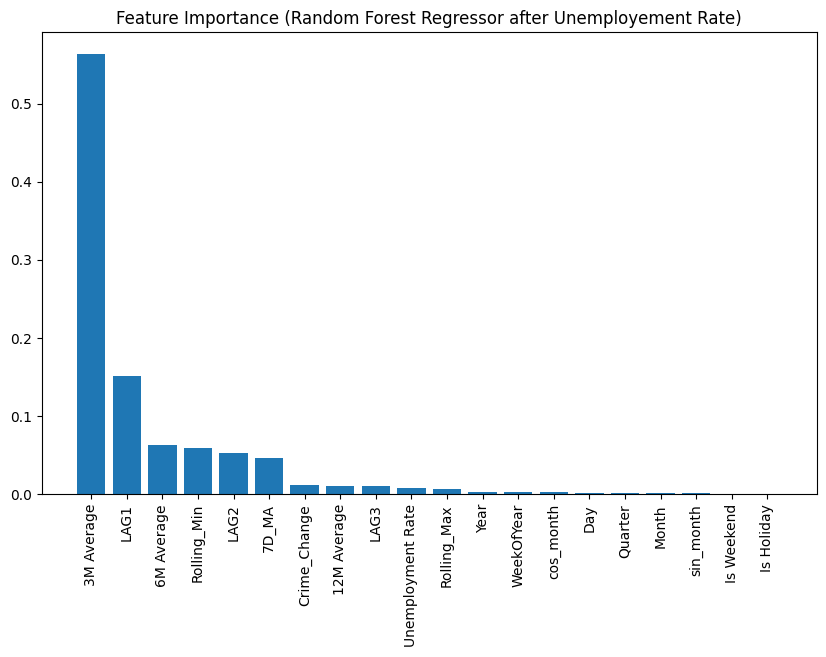

In [ ]:
plot_importances11(model2,"Random Forest Regressor after Unemployement Rate")

From the plot feature importances graph we conclude that the "Unemployment Rate" is not a very important features as other features are more dominating

Using VIF to check for multicollinearity

In [ ]:
print(X1_train.dtypes)

3M Average           float64
6M Average           float64
Month                  int32
Day                    int32
Year                   int32
Is Weekend             int64
12M Average          float64
Quarter                int32
WeekOfYear            UInt32
Is Holiday             int64
LAG1                 float64
LAG2                 float64
LAG3                 float64
Crime_Change         float64
7D_MA                float64
Rolling_Min          float64
Rolling_Max          float64
sin_month            float64
cos_month            float64
Unemployment Rate    float64
dtype: object


In [ ]:
X1_train['WeekOfYear'] = X1_train['WeekOfYear'].astype('int64')

In [ ]:
print(X1_train.dtypes)

3M Average           float64
6M Average           float64
Month                  int32
Day                    int32
Year                   int32
Is Weekend             int64
12M Average          float64
Quarter                int32
WeekOfYear             int64
Is Holiday             int64
LAG1                 float64
LAG2                 float64
LAG3                 float64
Crime_Change         float64
7D_MA                float64
Rolling_Min          float64
Rolling_Max          float64
sin_month            float64
cos_month            float64
Unemployment Rate    float64
dtype: object


In [ ]:
X1_train_const = add_constant(X1_train)
vifdata = pd.DataFrame()
vifdata['Feature'] = X1_train_const.columns
vifdata['VIF'] = [variance_inflation_factor(X1_train_const.values,i) for i in range(X1_train_const.shape[1])]
print(vifdata)

              Feature           VIF
0               const  4.028048e+07
1          3M Average           inf
2          6M Average  8.271063e+02
3               Month  8.297844e+03
4                 Day  3.447990e+00
5                Year  1.144322e+01
6          Is Weekend  5.188557e+00
7         12M Average  5.919315e+01
8             Quarter  3.306746e+01
9          WeekOfYear  8.620331e+03
10         Is Holiday           NaN
11               LAG1           inf
12               LAG2           inf
13               LAG3  2.889146e+01
14       Crime_Change           inf
15              7D_MA  9.322802e+02
16        Rolling_Min  5.146905e+01
17        Rolling_Max  4.223549e+01
18          sin_month  4.525268e+00
19          cos_month  3.896318e+00
20  Unemployment Rate  1.069863e+01


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Need to handle columns with inf values for VIF

In [ ]:
X1_train_reduced = X1_train.drop(columns=['3M Average','Is Holiday','LAG1','LAG2','Crime_Change'])

In [ ]:
X1_train_reduced_const = add_constant(X1_train_reduced)
vifdata_reduced = pd.DataFrame()
vifdata_reduced['Feature'] = X1_train_reduced_const.columns
vifdata_reduced['VIF'] = [variance_inflation_factor(X1_train_reduced_const.values,i) for i in range(X1_train_reduced_const.shape[1])]
print(vifdata_reduced)


              Feature           VIF
0               const  3.965920e+07
1          6M Average  4.134213e+02
2               Month  8.214644e+03
3                 Day  1.868477e+00
4                Year  1.125970e+01
5          Is Weekend  4.890185e+00
6         12M Average  5.528957e+01
7             Quarter  2.798366e+01
8          WeekOfYear  8.495499e+03
9                LAG3  2.250189e+01
10              7D_MA  7.835402e+02
11        Rolling_Min  2.129753e+01
12        Rolling_Max  3.389725e+01
13          sin_month  4.235441e+00
14          cos_month  2.878101e+00
15  Unemployment Rate  9.098465e+00


After Dropping columns now we run algos on reduced data

In [ ]:
X1_train_reduced.columns

Index(['6M Average', 'Month', 'Day', 'Year', 'Is Weekend', '12M Average',
       'Quarter', 'WeekOfYear', 'LAG3', '7D_MA', 'Rolling_Min', 'Rolling_Max',
       'sin_month', 'cos_month', 'Unemployment Rate'],
      dtype='object')

In [ ]:
X1_test.columns

Index(['3M Average', '6M Average', 'Month', 'Day', 'Year', 'Is Weekend',
       '12M Average', 'Quarter', 'WeekOfYear', 'Is Holiday', 'LAG1', 'LAG2',
       'LAG3', 'Crime_Change', '7D_MA', 'Rolling_Min', 'Rolling_Max',
       'sin_month', 'cos_month', 'Unemployment Rate'],
      dtype='object')

In [ ]:
X1_test_reduced = X1_test.drop(columns=['3M Average','Is Holiday','LAG1','LAG2','Crime_Change'])

In [ ]:
print(X1_test_reduced.columns == X1_train_reduced.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


Train the models again for lets see

In [ ]:
model5 = RandomForestRegressor()
model5.fit(X1_train_reduced,y1_train)

RandomForestRegressor()

In [ ]:
model5final = model5.predict(X1_test_reduced)

In [ ]:
print("RF after VIF Reduction:")
print("RMSE:", mean_squared_error(y1_test,model5final, squared=False))
print("MAE:", mean_absolute_error(y1_test,model5final))
print("R² Score:", r2_score(y1_test,model5final))

RF after VIF Reduction:
RMSE: 972.6572764802618
MAE: 744.9410000000001
R² Score: 0.8198672014450346


In [ ]:
rfhelp = RandomizedSearchCV(model5,tree_params1,n_iter=10,cv=3,scoring='r2',n_jobs=-1,random_state=42)
rfhelp.fit(X1_train_reduced,y1_train)
bestrfhelp = rfhelp.best_estimator_

In [ ]:
print(bestrfhelp)

RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=200)


In [ ]:
model6 = RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=100)
model6.fit(X1_train_reduced,y1_train)


RandomForestRegressor(max_depth=5, min_samples_split=5)

In [ ]:
model6final = model6.predict(X1_test_reduced)

In [ ]:
print("RF after VIF Reduction:")
print("RMSE:", mean_squared_error(y1_test,model6final, squared=False))
print("MAE:", mean_absolute_error(y1_test,model6final))
print("R² Score:", r2_score(y1_test,model6final))

RF after VIF Reduction:
RMSE: 1040.1775551187818
MAE: 775.8236706099457
R² Score: 0.7939901087749931


Lets check XGB

In [ ]:
model7 = XGBRegressor()
model7.fit(X1_train_reduced,y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model7final = model7.predict(X1_test_reduced)

In [ ]:
print("XGB after VIF Reduction and Hyparameter Tuning:")
print("RMSE:", mean_squared_error(y1_test,model7final, squared=False))
print("MAE:", mean_absolute_error(y1_test,model7final))
print("R² Score:", r2_score(y1_test,model7final))

XGB after VIF Reduction and Hyparameter Tuning:
RMSE: 1195.6332297253373
MAE: 854.46376953125
R² Score: 0.7278119404614849


In [ ]:
xgbhelp2 = RandomizedSearchCV(model7,xgb_params1,n_iter=10,cv=5,scoring='r2',random_state=42,n_jobs=-1)
xgbhelp2.fit(X1_train_reduced, y1_train)
xgb_best2 = xgbhelp2.best_estimator_

In [ ]:
print(xgb_best2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
model8 = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None)
model8.fit(X1_train_reduced,y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model8final = model8.predict(X1_test_reduced)

In [ ]:
print("XGB after VIF Reduction and Hyparameter Tuning:")
print("RMSE:", mean_squared_error(y1_test,model8final, squared=False))
print("MAE:", mean_absolute_error(y1_test,model8final))
print("R² Score:", r2_score(y1_test,model8final))

XGB after VIF Reduction and Hyparameter Tuning:
RMSE: 1186.1504896001807
MAE: 811.32744140625
R² Score: 0.7321123447596761


In [ ]:
X1_train_reduced.columns

Index(['6M Average', 'Month', 'Day', 'Year', 'Is Weekend', '12M Average',
       'Quarter', 'WeekOfYear', 'LAG3', '7D_MA', 'Rolling_Min', 'Rolling_Max',
       'sin_month', 'cos_month', 'Unemployment Rate'],
      dtype='object')

['LAG1' '3M Average' 'Day' '6M Average' 'Is Holiday' 'Month' 'Is Weekend'
 '7D_MA' 'Quarter' '12M Average' 'Year' 'LAG3' 'LAG2' 'WeekOfYear'
 'Crime_Change']


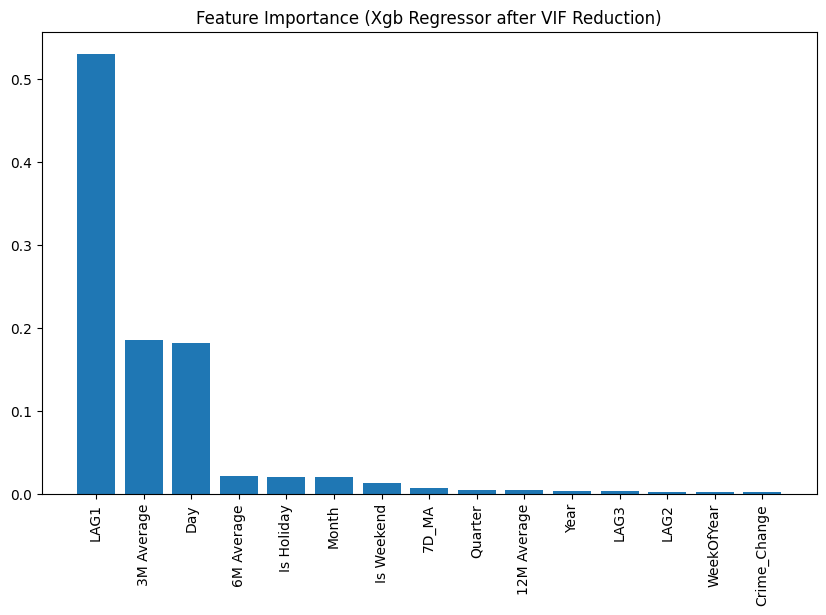

In [ ]:
plot_importances11(model8,"Xgb Regressor after VIF Reduction")

In [ ]:
selectedxgb = ['LAG1','3M Average','Day','6M Average','Is Holiday','Month','Is Weekend','7D_MA']

In [ ]:
X1_train_reduced

,6M Average,Month,Day,Year,Is Weekend,12M Average,Quarter,WeekOfYear,LAG3,7D_MA,Rolling_Min,Rolling_Max,sin_month,cos_month,Unemployment Rate
6,16164.333333,6,30,2021,0,16110.416667,2,26,16071.0,16095.428571,15176.0,16876.0,1.224647e-16,-1.000000e+00,9.5
24,19602.333333,12,31,2022,1,19425.000000,4,52,19164.0,19673.285714,18601.0,20159.0,-2.449294e-16,1.000000e+00,5.0
32,19131.166667,8,31,2023,0,19222.833333,3,35,18706.0,19017.285714,18334.0,19886.0,-8.660254e-01,-5.000000e-01,5.3
19,19501.333333,7,31,2022,1,18860.583333,3,30,19652.0,19333.714286,17579.0,20292.0,-5.000000e-01,-8.660254e-01,4.8
17,18861.000000,5,31,2022,0,18468.000000,2,22,17579.0,18752.714286,17579.0,20292.0,5.000000e-01,-8.660254e-01,4.9
13,18219.833333,1,31,2022,0,17360.416667,1,5,19029.0,18240.142857,17779.0,19029.0,5.000000e-01,8.660254e-01,5.8
43,14040.166667,7,31,2024,0,16672.500000,3,31,12740.0,14705.571429,12740.0,18698.0,-5.000000e-01,-8.660254e-01,6.7
15,18392.333333,3,31,2022,0,17849.416667,1,13,17779.0,18345.142857,17579.0,19536.0,1.000000e+00,6.123234e-17,4.8
9,17306.500000,9,30,2021,0,16564.583333,3,39,16876.0,17130.000000,15779.0,18362.0,-1.000000e+00,-1.836970e-16,7.2
16,18496.166667,4,30,2022,1,18172.166667,2,17,18328.0,18572.285714,17579.0,19652.0,8.660254e-01,-5.000000e-01,4.6


In [ ]:
model9 = XGBRegressor()

['LAG1' '3M Average' 'Is Holiday' '7D_MA' 'Day' 'WeekOfYear' 'Is Weekend'
 'Month' 'LAG2' 'Quarter' 'LAG3' 'Crime_Change' '6M Average' '12M Average'
 'Year']


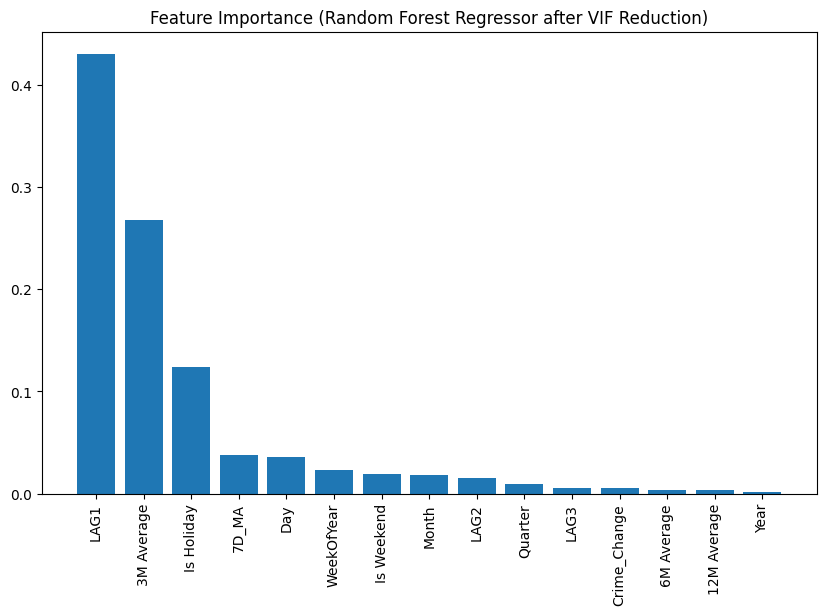

In [ ]:
plot_importances11(model6,"Random Forest Regressor after VIF Reduction")

In [ ]:
selectedrf = ['LAG1','3M Average','Is Holiday','7D_MA','Day','WeekOfYear','Is Weekend','Month','LAG2','Quarter']

Plot importances function is giving problem (regarding LAG1 LAG2 features not present in X1_train_reduced )

In [ ]:
print("Columns in X1_train_reduced:", X1_train_reduced.columns)

Columns in X1_train_reduced: Index(['6M Average', 'Month', 'Day', 'Year', 'Is Weekend', '12M Average',
       'Quarter', 'WeekOfYear', 'LAG3', '7D_MA', 'Rolling_Min', 'Rolling_Max',
       'sin_month', 'cos_month', 'Unemployment Rate'],
      dtype='object')


In [ ]:
print("Features used by the model:", model8.feature_names_in_)


Features used by the model: ['6M Average' 'Month' 'Day' 'Year' 'Is Weekend' '12M Average' 'Quarter'
 'WeekOfYear' 'LAG3' '7D_MA' 'Rolling_Min' 'Rolling_Max' 'sin_month'
 'cos_month' 'Unemployment Rate']


In [ ]:
def plot_importances101(model,model_name):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.xticks(range(len(sorted_idx)), np.array(X1_train_reduced.columns)[sorted_idx], rotation=90)
    print(np.array(X1_train_reduced.columns)[sorted_idx])
    plt.title(f"Feature Importance ({model_name})")
    plt.show()

['Rolling_Min' '6M Average' 'Year' 'Month' '7D_MA' 'Day' '12M Average'
 'Unemployment Rate' 'WeekOfYear' 'Quarter' 'Is Weekend' 'sin_month'
 'Rolling_Max' 'LAG3' 'cos_month']


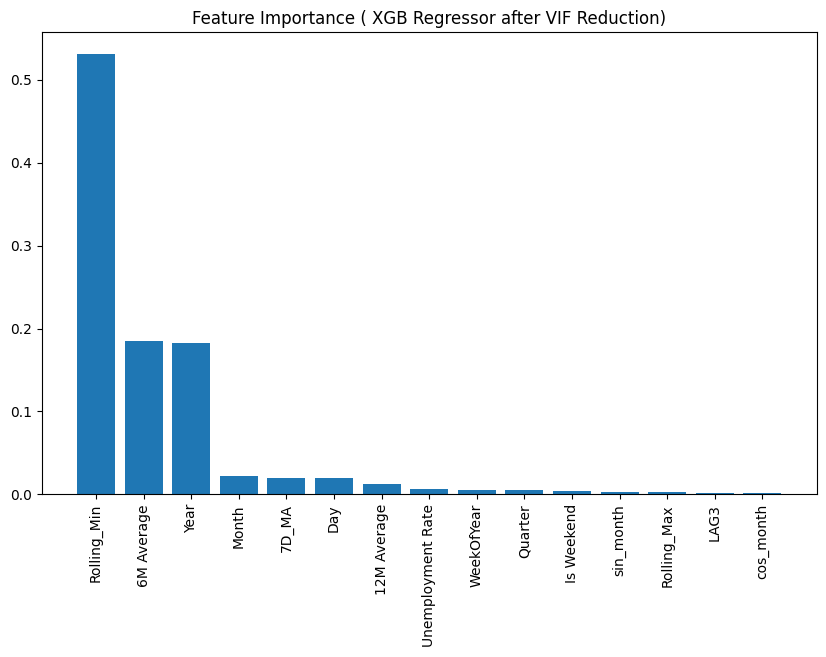

In [ ]:
plot_importances101(model8," XGB Regressor after VIF Reduction")

['Rolling_Min' '6M Average' '7D_MA' 'Unemployment Rate' 'Year' 'LAG3'
 '12M Average' 'Day' 'Rolling_Max' 'WeekOfYear' 'sin_month' 'cos_month'
 'Month' 'Quarter' 'Is Weekend']


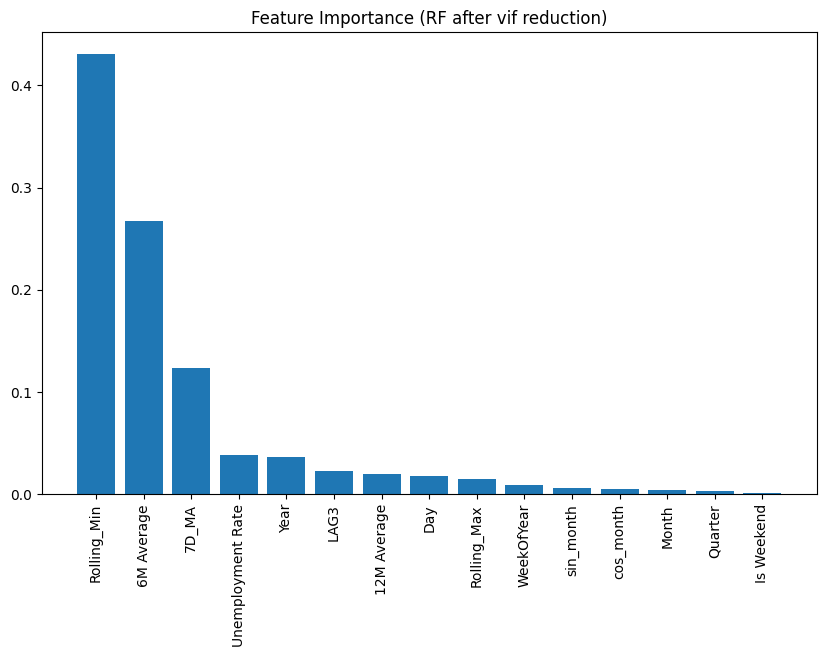

In [ ]:
plot_importances101(model6,"RF after vif reduction")

The above problem that we had in feature importances has been solved train them agaiin on selected special best importances columns and hypepparameter tune the model to get better results

Trying to shift unemploymnet values in order to increase R2

In [ ]:
dfupper = df_time.copy()

In [ ]:
df_time['ULAG1'] = df_time['Unemployment Rate'].shift(1)
df_time['ULAG3'] = df_time['Unemployment Rate'].shift(3)
df_time['ULAG6'] = df_time['Unemployment Rate'].shift(6)

In [ ]:
df_time.drop(columns=['Unemployment Rate'])

,ds,y,3M Average,6M Average,Month,Day,Year,Is Weekend,12M Average,Quarter,...,LAG3,Crime_Change,7D_MA,Rolling_Min,Rolling_Max,sin_month,cos_month,ULAG1,ULAG3,ULAG6
0,2020-12-31,15682.0,15782.333333,16056.500000,12,31,2020,0,16408.500000,4,...,15471.0,323.0,16161.571429,15359.0,16876.0,-2.449294e-16,1.000000e+00,NaN,NaN,NaN
1,2021-01-31,16342.0,15794.333333,15967.500000,1,31,2021,1,16241.333333,1,...,16306.0,660.0,16097.285714,15359.0,16876.0,5.000000e-01,8.660254e-01,11.0,NaN,NaN
2,2021-02-28,15176.0,15733.333333,15722.666667,2,28,2021,1,16082.750000,1,...,15359.0,-1166.0,15854.428571,15176.0,16645.0,8.660254e-01,5.000000e-01,10.5,NaN,NaN
3,2021-03-31,16071.0,15863.000000,15822.666667,3,31,2021,0,16091.833333,1,...,15682.0,895.0,15772.428571,15176.0,16342.0,1.000000e+00,6.123234e-17,10.4,11.0,NaN
4,2021-04-30,15779.0,15675.333333,15734.833333,4,30,2021,0,16118.916667,2,...,16342.0,-292.0,15816.428571,15176.0,16342.0,8.660254e-01,-5.000000e-01,10.3,10.5,NaN
5,2021-05-31,16742.0,16197.333333,15965.333333,5,31,2021,0,16103.416667,2,...,15176.0,963.0,15878.714286,15176.0,16742.0,5.000000e-01,-8.660254e-01,9.5,10.4,NaN
6,2021-06-30,16876.0,16465.666667,16164.333333,6,30,2021,0,16110.416667,2,...,16071.0,134.0,16095.428571,15176.0,16876.0,1.224647e-16,-1.000000e+00,10.0,10.3,11.0
7,2021-07-31,18362.0,17326.666667,16501.000000,7,31,2021,1,16234.250000,3,...,15779.0,1486.0,16478.285714,15176.0,18362.0,-5.000000e-01,-8.660254e-01,9.5,9.5,10.5
8,2021-08-31,18018.0,17752.000000,16974.666667,8,31,2021,0,16348.666667,3,...,16742.0,-344.0,16717.714286,15176.0,18362.0,-8.660254e-01,-5.000000e-01,9.0,10.0,10.4
9,2021-09-30,18062.0,18147.333333,17306.500000,9,30,2021,0,16564.583333,3,...,16876.0,44.0,17130.000000,15779.0,18362.0,-1.000000e+00,-1.836970e-16,7.8,9.5,10.3


Now trying to train with the xgb regressor

Split the data

In [ ]:
X2 = df_time.drop(columns=['ds','y'])
y2 = df_time['y']

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [ ]:
y2_test.shape

(10,)

In [ ]:
model10 = XGBRegressor()
model10.fit(X2_train,y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model10final = model10.predict(X2_test)

In [ ]:
print("XGB Results with Unemployment Rate and Lag Values added as well:")
print("Xgb Regressor results without tuning:")
print("RMSE:", mean_squared_error(y2_test,model10final,squared=False))
print("MAE:", mean_absolute_error(y2_test,model10final))
print("R² Score:", r2_score(y2_test,model10final))

XGB Results with Unemployment Rate and Lag Values added as well:
Xgb Regressor results without tuning:
RMSE: 929.7621296089613
MAE: 536.58125
R² Score: 0.835404930452367


In [ ]:
new_param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 9],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0],  
    'gamma': [0, 0.1, 0.2, 0.3],  
    'lambda': [0, 0.5, 1, 2],  
    'alpha': [0, 0.5, 1, 2]
}

xgbhelp3 = RandomizedSearchCV(model10,new_param_grid,n_iter=10,cv=5,scoring='r2',random_state=42,n_jobs=-1)
xgbhelp3.fit(X2_train,y2_train)
xgb_best3 = xgbhelp3.best_estimator_


In [ ]:
print(xgb_best3)

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=1, learning_rate=0.01,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None, ...)


In [ ]:
model11 = XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None,learning_rate=0.01,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=700)

model11.fit(X2_train,y2_train)

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
model11final = model11.predict(X2_test)

In [ ]:
print("XGB Results with Unemployment Rate and Lag Values added as well with Hyperaparmeter tuning as well:")
print("Xgb Regressor results without tuning:")
print("RMSE:", mean_squared_error(y2_test,model11final,squared=False))
print("MAE:", mean_absolute_error(y2_test,model11final))
print("R² Score:", r2_score(y2_test,model11final))

XGB Results with Unemployment Rate and Lag Values added as well with Hyperaparmeter tuning as well:
Xgb Regressor results without tuning:
RMSE: 975.8148783540997
MAE: 575.18154296875
R² Score: 0.8186957489250098


Inference: hypeparameter tuning does not work well with this model as the r2 score decreases from 83 to 81

Now lets try with RF

In [ ]:
X2_train.isna().sum()

3M Average           0
6M Average           0
Month                0
Day                  0
Year                 0
Is Weekend           0
12M Average          0
Quarter              0
WeekOfYear           0
Is Holiday           0
LAG1                 0
LAG2                 0
LAG3                 0
Crime_Change         0
7D_MA                0
Rolling_Min          0
Rolling_Max          0
sin_month            0
cos_month            0
Unemployment Rate    0
ULAG1                1
ULAG3                3
ULAG6                4
dtype: int64

In [ ]:
X2_train['ULAG1'] = X2_train['ULAG1'].ffill()
X2_train['ULAG1'] = X2_train['ULAG1'].bfill()
X2_train['ULAG3'] = X2_train['ULAG3'].ffill()
X2_train['ULAG3'] = X2_train['ULAG3'].bfill()
X2_train['ULAG6'] = X2_train['ULAG6'].ffill()
X2_train['ULAG6'] = X2_train['ULAG6'].bfill()

In [ ]:
X2_train.isna().sum()

3M Average           0
6M Average           0
Month                0
Day                  0
Year                 0
Is Weekend           0
12M Average          0
Quarter              0
WeekOfYear           0
Is Holiday           0
LAG1                 0
LAG2                 0
LAG3                 0
Crime_Change         0
7D_MA                0
Rolling_Min          0
Rolling_Max          0
sin_month            0
cos_month            0
Unemployment Rate    0
ULAG1                0
ULAG3                0
ULAG6                0
dtype: int64

In [ ]:
model12 = RandomForestRegressor()
model12.fit(X2_train,y2_train)

RandomForestRegressor()

In [ ]:
X2_test.isna().sum()

3M Average            0
6M Average            0
Month                 0
Day                   0
Year                  0
Is Weekend            0
12M Average           0
Quarter               0
WeekOfYear            0
Is Holiday            0
LAG1                  0
LAG2                  0
LAG3                  0
Crime_Change          0
7D_MA                 0
Rolling_Min           0
Rolling_Max           0
sin_month             0
cos_month             0
Unemployment Rate     0
ULAG1                 0
ULAG3                10
ULAG6                 2
dtype: int64

In [ ]:
X2_test['ULAG3'] = X2_test['ULAG3'].ffill()
X2_test['ULAG3'] = X2_test['ULAG3'].bfill()
X2_test['ULAG6'] = X2_test['ULAG6'].ffill()
X2_test['ULAG6'] = X2_test['ULAG6'].bfill()

In [ ]:
X2_test['ULAG3'] = X2_test['ULAG3'].interpolate(method='linear')

In [ ]:
X2_test['ULAG3'].isna().sum()

10

In [ ]:
X2_test['ULAG3'] = X2_test['ULAG3'].ffill()
X2_test['ULAG3'] = X2_test['ULAG3'].bfill()

ULAG3 feature is not filling up the missing values .There is a problem

In [ ]:
X2_test['ULAG3'] = X2_test['ULAG3'].ffill().bfill()


In [ ]:
X2_test.isna().sum()

3M Average            0
6M Average            0
Month                 0
Day                   0
Year                  0
Is Weekend            0
12M Average           0
Quarter               0
WeekOfYear            0
Is Holiday            0
LAG1                  0
LAG2                  0
LAG3                  0
Crime_Change          0
7D_MA                 0
Rolling_Min           0
Rolling_Max           0
sin_month             0
cos_month             0
Unemployment Rate     0
ULAG1                 0
ULAG3                10
ULAG6                 0
dtype: int64

In [ ]:
X2_test['ULAG3'].fillna(X2_test['ULAG3'].rolling(window=3, min_periods=1).mean())


39   NaN
25   NaN
26   NaN
44   NaN
35   NaN
41   NaN
4    NaN
12   NaN
8    NaN
3    NaN
Name: ULAG3, dtype: float64

In [ ]:
X2_test[X2_test['ULAG3'].isna()]

,3M Average,6M Average,Month,Day,Year,Is Weekend,12M Average,Quarter,WeekOfYear,Is Holiday,...,Crime_Change,7D_MA,Rolling_Min,Rolling_Max,sin_month,cos_month,Unemployment Rate,ULAG1,ULAG3,ULAG6
39,17326.333333,18345.166667,3,31,2024,1,18745.916667,1,13,0,...,-1133.0,18460.571429,16074.0,19902.0,1.000000e+00,6.123234e-17,4.5,5.2,NaN,5.1
25,19410.000000,19588.666667,1,31,2023,0,19545.000000,1,5,0,...,-93.0,19626.000000,18601.0,20159.0,5.000000e-01,8.660254e-01,5.1,5.0,NaN,4.8
26,19321.000000,19314.500000,2,28,2023,0,19607.916667,1,9,0,...,-1434.0,19409.428571,18334.0,20159.0,8.660254e-01,5.000000e-01,4.8,5.1,NaN,4.4
44,12740.000000,13295.666667,8,31,2024,1,16077.000000,3,35,0,...,0.0,13854.428571,12740.0,17207.0,-8.660254e-01,-5.000000e-01,6.0,6.7,NaN,5.2
35,19300.666667,19353.666667,11,30,2023,0,19221.000000,4,48,0,...,-1055.0,19261.142857,18581.0,19902.0,-5.000000e-01,8.660254e-01,5.0,4.9,NaN,5.1
41,13851.333333,16133.666667,5,31,2024,0,17743.666667,2,22,0,...,0.0,16521.285714,12740.0,19343.0,5.000000e-01,-8.660254e-01,5.9,5.1,NaN,5.0
4,15675.333333,15734.833333,4,30,2021,0,16118.916667,2,17,0,...,-292.0,15816.428571,15176.0,16342.0,8.660254e-01,-5.000000e-01,9.5,10.3,NaN,5.0
12,18303.666667,18225.500000,12,31,2021,0,17194.916667,4,52,0,...,-324.0,18032.714286,16876.0,19029.0,-2.449294e-16,1.000000e+00,6.5,6.0,NaN,9.5
8,17752.000000,16974.666667,8,31,2021,0,16348.666667,3,35,0,...,-344.0,16717.714286,15176.0,18362.0,-8.660254e-01,-5.000000e-01,7.8,9.0,NaN,10.4
3,15863.000000,15822.666667,3,31,2021,0,16091.833333,1,13,0,...,895.0,15772.428571,15176.0,16342.0,1.000000e+00,6.123234e-17,10.3,10.4,NaN,10.4


In [ ]:
X2_test.isna().sum()

3M Average            0
6M Average            0
Month                 0
Day                   0
Year                  0
Is Weekend            0
12M Average           0
Quarter               0
WeekOfYear            0
Is Holiday            0
LAG1                  0
LAG2                  0
LAG3                  0
Crime_Change          0
7D_MA                 0
Rolling_Min           0
Rolling_Max           0
sin_month             0
cos_month             0
Unemployment Rate     0
ULAG1                 0
ULAG3                10
ULAG6                 0
dtype: int64

Still Missing Values

In [ ]:
X2_test['ULAG3'] = X2_test['ULAG3'].fillna(X2_test['ULAG3'].rolling(window=3, min_periods=1).mean())

In [ ]:
X2_test.isna().sum()

3M Average            0
6M Average            0
Month                 0
Day                   0
Year                  0
Is Weekend            0
12M Average           0
Quarter               0
WeekOfYear            0
Is Holiday            0
LAG1                  0
LAG2                  0
LAG3                  0
Crime_Change          0
7D_MA                 0
Rolling_Min           0
Rolling_Max           0
sin_month             0
cos_month             0
Unemployment Rate     0
ULAG1                 0
ULAG3                10
ULAG6                 0
dtype: int64

In [ ]:
X2_test['ULAG3'].dtype

dtype('float64')

In [ ]:
X2_test['ULAG3']

39   NaN
25   NaN
26   NaN
44   NaN
35   NaN
41   NaN
4    NaN
12   NaN
8    NaN
3    NaN
Name: ULAG3, dtype: float64

In [ ]:
X2_test['ULAG3'] = X2_test['ULAG3'].fillna(0)

In [ ]:
X2_test.isna().sum()

3M Average           0
6M Average           0
Month                0
Day                  0
Year                 0
Is Weekend           0
12M Average          0
Quarter              0
WeekOfYear           0
Is Holiday           0
LAG1                 0
LAG2                 0
LAG3                 0
Crime_Change         0
7D_MA                0
Rolling_Min          0
Rolling_Max          0
sin_month            0
cos_month            0
Unemployment Rate    0
ULAG1                0
ULAG3                0
ULAG6                0
dtype: int64

In [ ]:
model12 = RandomForestRegressor()
model12.fit(X2_train,y2_train)

RandomForestRegressor()

In [ ]:
model12final = model12.predict(X2_test)

In [ ]:
print("RF after Lagging Unemployemnent withou tuning the model:")
print("RMSE:", mean_squared_error(y2_test,model12final, squared=False))
print("MAE:", mean_absolute_error(y2_test,model12final))
print("R² Score:", r2_score(y2_test,model12final))

RF after Lagging Unemployemnent withou tuning the model:
RMSE: 749.2928289660857
MAE: 582.5600000000002
R² Score: 0.8931003536235216


In [ ]:
treehelpnow = RandomizedSearchCV(model12,tree_params,n_iter=10,cv=5,scoring='r2',random_state=42,n_jobs=-1)
treehelpnow.fit(X2_train,y2_train)
bestrfhelpnow = treehelpnow.best_estimator_

In [ ]:
print(bestrfhelpnow)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=50)


Apply The Tuned Features

In [ ]:
model13 =RandomForestRegressor(max_depth=5,min_samples_leaf=2,n_estimators=50)
model13.fit(X2_train,y2_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=50)

In [ ]:
model13final = model13.predict(X2_test)

In [ ]:
print("RF after Lagging Unemployemnent after tuning the model with unemployemnet lags:")
print("RMSE:", mean_squared_error(y2_test,model13final, squared=False))
print("MAE:", mean_absolute_error(y2_test,model13final))
print("R² Score:", r2_score(y2_test,model13final))

RF after Lagging Unemployemnent after tuning the model with unemployemnet lags:
RMSE: 915.7558963871423
MAE: 747.2293512265512
R² Score: 0.8403266035177398


Fetaure importances for X2

In [ ]:
def importancesnew(model,model_name):
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature importances: {model_name}")
    plt.bar(range(len(sorted_idx)),importances[sorted_idx],align='center')
    plt.xticks(range(len(sorted_idx)),np.array(X2_train.columns)[sorted_idx],rotation=90)
    print(np.array(X2_train.columns)[sorted_idx])
    plt.show()

['3M Average' 'LAG1' '6M Average' 'LAG2' '7D_MA' 'Rolling_Min'
 'Crime_Change' 'Day' 'ULAG1' 'Year' 'ULAG6' '12M Average' 'Quarter'
 'cos_month' 'Unemployment Rate' 'ULAG3' 'sin_month' 'WeekOfYear' 'Month'
 'LAG3' 'Rolling_Max' 'Is Weekend' 'Is Holiday']


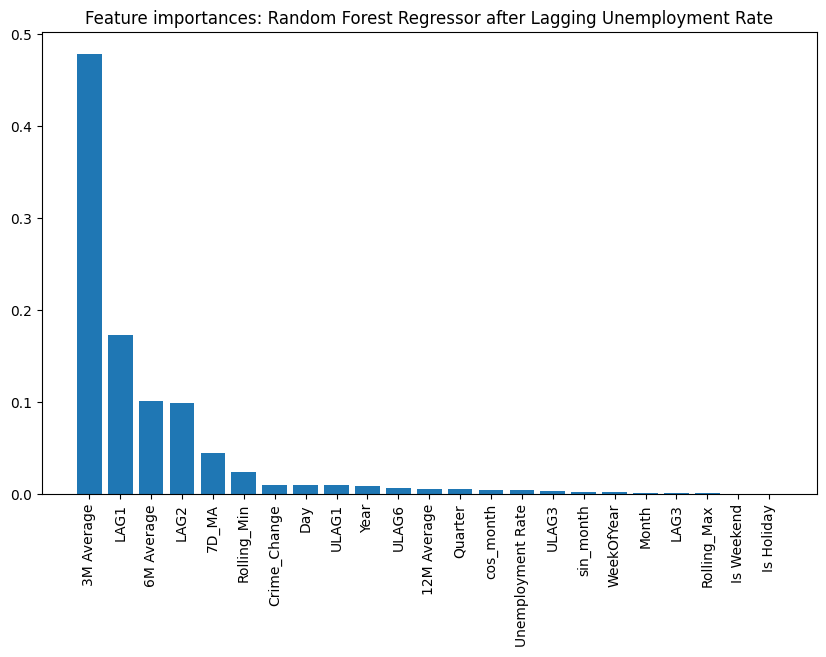

In [ ]:
importancesnew(model13,"Random Forest Regressor after Lagging Unemployment Rate")

['3M Average' 'ULAG1' 'Month' 'Day' 'ULAG3' 'Crime_Change' '12M Average'
 'Rolling_Min' 'ULAG6' 'LAG3' '6M Average' 'LAG2' 'Is Weekend' 'Year'
 'cos_month' 'LAG1' 'Unemployment Rate' 'WeekOfYear' '7D_MA' 'Rolling_Max'
 'sin_month' 'Is Holiday' 'Quarter']


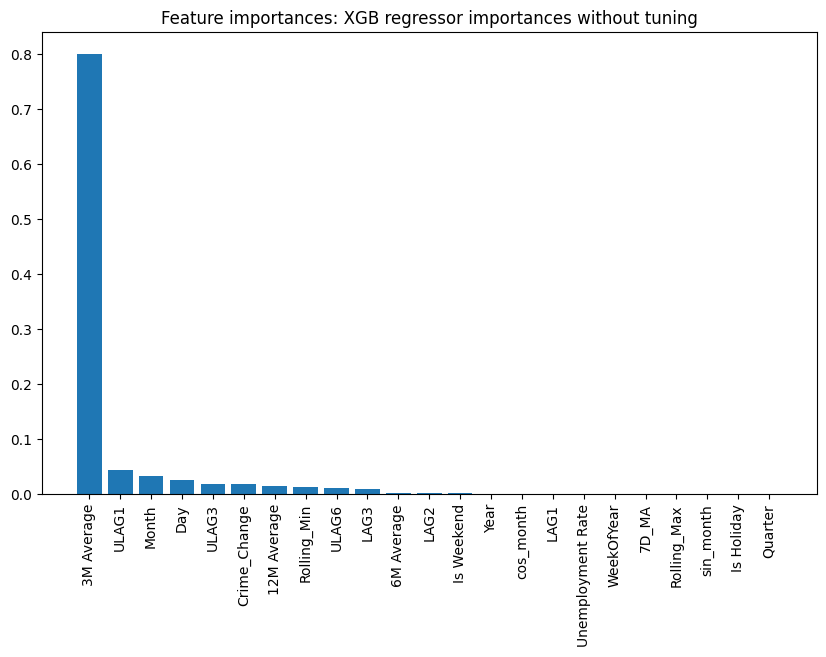

In [ ]:
importancesnew(model10,"XGB regressor importances without tuning")

update: we have added lag features in to the unemployment data and performed train and the highest R2 Score we got was 89 with a RF model without tuning

Using SHAP TO view how the model is performing

As per my understanding the values 0 in ULAG3 are causing a problem with SHAP fix the feature first

In [ ]:
X2_train.dtypes

3M Average           float64
6M Average           float64
Month                  int32
Day                    int32
Year                   int32
Is Weekend             int64
12M Average          float64
Quarter                int32
WeekOfYear            UInt32
Is Holiday             int64
LAG1                 float64
LAG2                 float64
LAG3                 float64
Crime_Change         float64
7D_MA                float64
Rolling_Min          float64
Rolling_Max          float64
sin_month            float64
cos_month            float64
Unemployment Rate    float64
ULAG1                float64
ULAG3                float64
ULAG6                float64
dtype: object

In [ ]:
X2_train['WeekOfYear'] = X2_train['WeekOfYear'].astype('int64')


In [ ]:
X2_train.dtypes

3M Average           float64
6M Average           float64
Month                  int32
Day                    int32
Year                   int32
Is Weekend             int64
12M Average          float64
Quarter                int32
WeekOfYear             int64
Is Holiday             int64
LAG1                 float64
LAG2                 float64
LAG3                 float64
Crime_Change         float64
7D_MA                float64
Rolling_Min          float64
Rolling_Max          float64
sin_month            float64
cos_month            float64
Unemployment Rate    float64
ULAG1                float64
ULAG3                float64
ULAG6                float64
dtype: object

In [ ]:
explainer = shap.Explainer(model13,X2_train)
shap_values = explainer(X2_train)

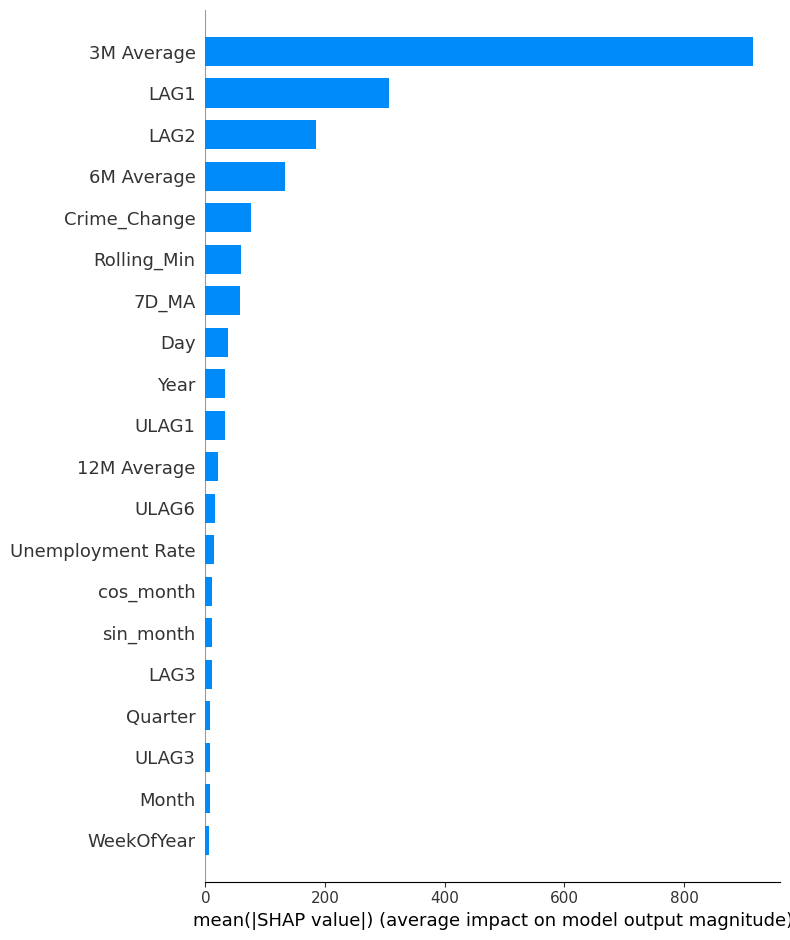

In [ ]:
shap.summary_plot(shap_values,X2_train,plot_type='bar')

In [ ]:
X2_test['WeekOfYear'] = X2_test['WeekOfYear'].astype('int64')

In [ ]:
X2_test.dtypes

3M Average           float64
6M Average           float64
Month                  int32
Day                    int32
Year                   int32
Is Weekend             int64
12M Average          float64
Quarter                int32
WeekOfYear             int64
Is Holiday             int64
LAG1                 float64
LAG2                 float64
LAG3                 float64
Crime_Change         float64
7D_MA                float64
Rolling_Min          float64
Rolling_Max          float64
sin_month            float64
cos_month            float64
Unemployment Rate    float64
ULAG1                float64
ULAG3                float64
ULAG6                float64
dtype: object

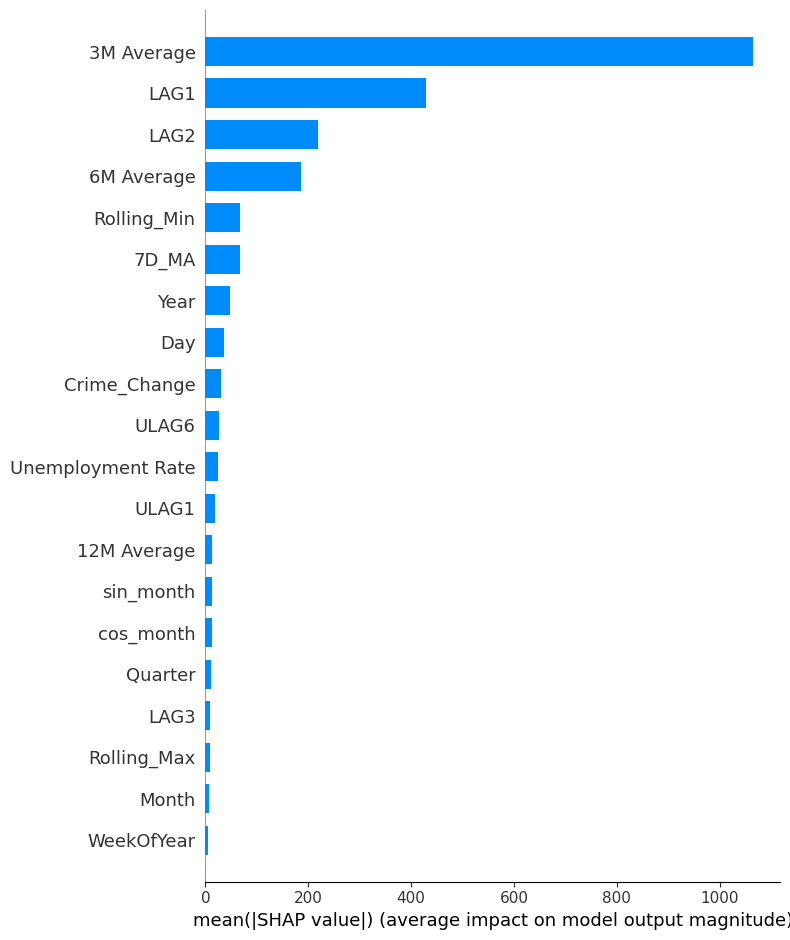

In [ ]:
explainertest = shap.Explainer(model13,X2_test)
shap_values_test = explainertest(X2_test)
shap.summary_plot(shap_values_test, X2_test, plot_type="bar")

In [ ]:
featuresselect = ['3M Average','LAG1','LAG2','6M Average','Rolling_Min','7D_MA','Year','Day','Crime_Change','ULAG6','Unemployment Rate','ULAG1']

In [ ]:
model14 = RandomForestRegressor()
model14.fit(X2_train[featuresselect],y2_train)


RandomForestRegressor()

In [ ]:
model14final =  model14.predict(X2_test[featuresselect])

SHAP To Showcase model explananbility

In [ ]:
print("RF after Lagging Unemployemnent after tuning the model with unemployemnet lags along with SHAP interpretation:")
print("RMSE:", mean_squared_error(y2_test,model14final, squared=False))
print("MAE:", mean_absolute_error(y2_test,model14final))
print("R² Score:", r2_score(y2_test,model14final))

RF after Lagging Unemployemnent after tuning the model with unemployemnet lags along with SHAP interpretation:
RMSE: 801.5388166645452
MAE: 577.1439999999996
R² Score: 0.8776730255801086


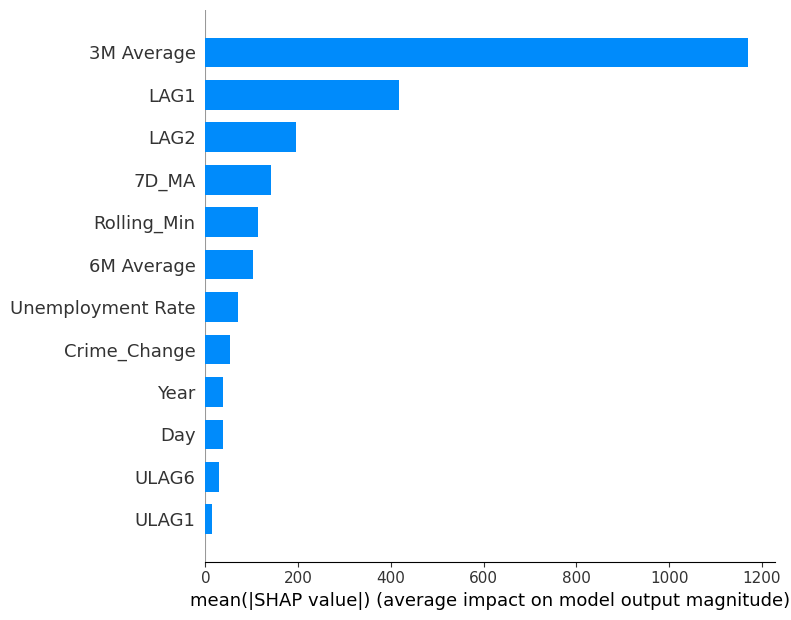

In [ ]:
explainerrf = shap.Explainer(model14,X2_test[featuresselect])
shap_values_rf = explainerrf(X2_test[featuresselect])
# Plot the SHAP values
shap.summary_plot(shap_values_rf, X2_test[featuresselect], plot_type="bar")

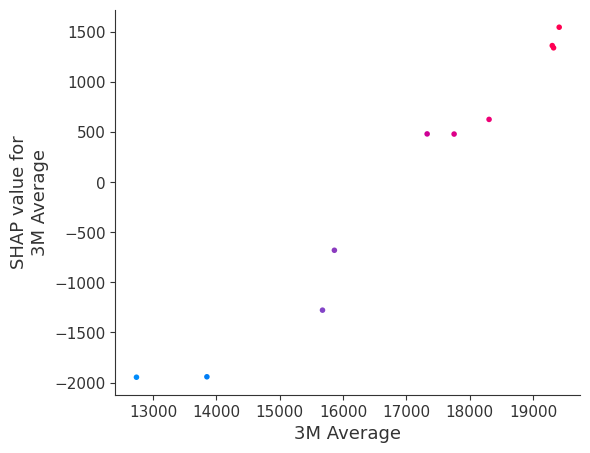

In [ ]:
shap.dependence_plot("3M Average", shap_values_rf.values, X2_test[featuresselect])


Scenario Features Test: Checking and playing 3M Average Feature

In [ ]:
X2_test['3M Average']

39    17326.333333
25    19410.000000
26    19321.000000
44    12740.000000
35    19300.666667
41    13851.333333
4     15675.333333
12    18303.666667
8     17752.000000
3     15863.000000
Name: 3M Average, dtype: float64

In [ ]:
scenario_data = X2_test.copy()
scenario_data['3M Average'] += 1000
scenario_predictions = model14.predict(scenario_data[featuresselect])
print("Original Crime Prediction Mean:", np.mean(model14.predict(X2_test[featuresselect])))
print("Scenario Crime Prediction Mean:", np.mean(scenario_predictions)) 


Original Crime Prediction Mean: 16867.824
Scenario Crime Prediction Mean: 17334.834


Dominant Features are features that were exctracted from shap values best features

In [ ]:
X2_test['LAG1'].head(2)

39    17207.0
25    19861.0
Name: LAG1, dtype: float64

In [ ]:
scenario_data1 = X2_test.copy()
scenario_data1['LAG1'] += 1000
scenario_pred1 = model14.predict(scenario_data1[featuresselect])
print("Original Crime Prediction Mean:", np.mean(model14.predict(X2_test[featuresselect])))
print("Scenario Crime Prediction Mean:", np.mean(scenario_pred1))

Original Crime Prediction Mean: 16867.824
Scenario Crime Prediction Mean: 16942.534


In [ ]:
X2_test['Unemployment Rate']

39     4.5
25     5.1
26     4.8
44     6.0
35     5.0
41     5.9
4      9.5
12     6.5
8      7.8
3     10.3
Name: Unemployment Rate, dtype: float64

In [ ]:
scenario_data2 = X2_test.copy()
scenario_data2['Unemployment Rate'] += 2
scneario_pred2 = model14.predict(scenario_data2[featuresselect])
print("Original Crime Prediction Mean:", np.mean(model14.predict(X2_test[featuresselect])))
print("Scenario Crime Prediction Mean:", np.mean(scneario_pred2))

Original Crime Prediction Mean: 16867.824
Scenario Crime Prediction Mean: 16856.947999999997


In [ ]:
dominanatfeatures = ['3M Average','LAG1','Rolling_Min','6M Average','Year','7D_MA','LAG2']

In [ ]:
model15 = RandomForestRegressor()
model15.fit(X2_train[dominanatfeatures],y2_train)

RandomForestRegressor()

In [ ]:
model15final = model15.predict(X2_test[dominanatfeatures])

In [ ]:
print("RF after Lagging Unemployemnent and adding SHAP Dominant features: ")
print("RMSE:", mean_squared_error(y2_test,model15final, squared=False))
print("MAE:", mean_absolute_error(y2_test,model15final))
print("R² Score:", r2_score(y2_test,model15final))

RF after Lagging Unemployemnent and adding SHAP Dominant features: 
RMSE: 771.265327743961
MAE: 536.798
R² Score: 0.8867389112072595


USED SHAP FOR BETTER FEATURES SLECTION ON THE RF MODEL INCREASSED OUR R2 SCORE TO 90%

USING THE DOMINANAT FEATURES ON XGBREGRESSOR 

In [ ]:
model16 = XGBRegressor()
model16.fit(X2_train[featuresselect],y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model16final = model16.predict(X2_test[featuresselect])

In [ ]:
print("XGB after Lagging Unemployemnent and adding SHAP Dominant features: ")
print("RMSE:", mean_squared_error(y2_test,model16final, squared=False))
print("MAE:", mean_absolute_error(y2_test,model16final))
print("R² Score:", r2_score(y2_test,model16final))

XGB after Lagging Unemployemnent and adding SHAP Dominant features: 
RMSE: 907.7683200809767
MAE: 498.27705078125
R² Score: 0.8430999215231184


In [ ]:
model17 = XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None,learning_rate=0.01,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=700)
model17.fit(X2_train[featuresselect], y2_train)

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
model17final = model17.predict(X2_test[featuresselect])

In [ ]:
print("XGB after Lagging Unemployemnent and adding SHAP Dominant features: ")
print("RMSE:", mean_squared_error(y2_test,model17final, squared=False))
print("MAE:", mean_absolute_error(y2_test,model17final))
print("R² Score:", r2_score(y2_test,model17final))

XGB after Lagging Unemployemnent and adding SHAP Dominant features: 


NameError: name 'mean_squared_error' is not defined

In [ ]:
print(magerita)

NameError: name 'magerita' is not defined

Export the Model to check once

In [ ]:
joblib.dump(model14,"crimehelper.pkl")
print("Model Saved in Directory")

NameError: name 'joblib' is not defined

In [ ]:
from fastapi import FastAPI
model = joblib.load("crimehelper.pkl")
app = FastAPI()


@app.post("/predict")
def predict(data : dict):
    try:
        input_data = pd.DataFrame([data])
        feature_order = featuresselect
        input_data = input_data[feature_order]
        prediction = model.predict(input_data)
        return {"crime_rate_predictions": prediction.tolist()}
    except Exception as e:
        return {"error": str(e)}
    

if __name__ == "__main__":
    import uvicorn
    import nest_asyncio
    nest_asyncio.apply()
    uvicorn.run(app, host="0.0.0.0",port=5000)


NameError: name 'joblib' is not defined

In [ ]:
!jupyter nbconvert --to script janpy6.ipynb

[NbConvertApp] Converting notebook janpy6.ipynb to script
[NbConvertApp] Writing 57125 bytes to janpy6.py


I think so the project code need to be transferred in order to pe properly deploy it


We will have to create a proper project enviroment as well for this 